## Install dependencies and importing them

In [3]:
!pip install pytest

In [1]:
# This is needed only for the purpose of the notebook
!pip install ipytest

  Obtaining dependency information for ipytest from https://files.pythonhosted.org/packages/2b/f3/d86f2aaf3c5187a323be202c71b3856d9cc9587a6f44d432159ae1b25988/ipytest-0.14.2-py3-none-any.whl.metadata


In [1]:
# Importing usual libraries
import os
import sys
import joblib
from ucimlrepo import fetch_ucirepo
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

import yaml

import warnings

# Importing required libraries
import pandas as pd
import numpy as np
import pytest
import ipytest

warnings.filterwarnings("ignore")
ipytest.autoconfig()

### A few sanity checks

In [3]:
filepath=r'C:/Users/balde/Desktop/MAESTRIA MNA/Contribs/MLOPSGrupo3/data/raw/online_news_popularity.csv'
df = pd.read_csv(filepath)

In [4]:
columns_clean = [i.strip() for i in df.columns.values.tolist()]
df.columns = columns_clean

In [5]:
df.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  min_positive_polarity  max_positive_polarity  \
0              4.680365  ...               0.100000                    0.7   
1              4.913725  ...               0.033333                    0.7   
2              4.393365  ...               0.100000                    1.0   
3              4.404896  ...               0.136364                    0.8   
4              4.682836  ...               0.033333                    1.0   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   
4              -0.220192                 -0.500              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 59 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  float64
 1   n_tokens_content               39644 non-null  float64
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  float64
 6   num_self_hrefs                 39644 non-null  float64
 7   num_imgs                       39644 non-null  float64
 8   num_videos                     39644 non-null  float64
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  float64
 11  data_channel_is_lifestyle      39644 non-null  float64
 12  data_channel_is_entertainment  39644 non-null 

In [7]:
df.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    39644.000000      39644.000000     39644.000000      39644.000000   
mean        10.398749        546.514731         0.548216          0.996469   
std          2.114037        471.107508         3.520708          5.231231   
min          2.000000          0.000000         0.000000          0.000000   
25%          9.000000        246.000000         0.470870          1.000000   
50%         10.000000        409.000000         0.539226          1.000000   
75%         12.000000        716.000000         0.608696          1.000000   
max         23.000000       8474.000000       701.000000       1042.000000   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              39644.000000  39644.000000    39644.000000  39644.000000   
mean                   0.689175     10.883690        3.293638      4.544143   
std                    3.264816     11.332017        3.855141      8.309434   
min                    0.000000      0.000000        0.000000      0.000000   
25%                    0.625739      4.000000        1.000000      1.000000   
50%                    0.690476      8.000000        3.000000      1.000000   
75%                    0.754630     14.000000        4.000000      4.000000   
max                  650.000000    304.000000      116.000000    128.000000   

         num_videos  average_token_length  ...  min_positive_polarity  \
count  39644.000000          39644.000000  ...           39644.000000   
mean       1.249874              4.548239  ...               0.095446   
std        4.107855              0.844406  ...               0.071315   
min        0.000000              0.000000  ...               0.000000   
25%        0.000000              4.478404  ...               0.050000   
50%        0.000000              4.664082  ...               0.100000   
75%        1.000000              4.854839  ...               0.100000   
max       91.000000              8.041534  ...               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           39644.000000           39644.000000           39644.000000   
mean                0.756728              -0.259524              -0.521944   
std                 0.247786               0.127726               0.290290   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.328383              -0.700000   
50%                 0.800000              -0.253333              -0.500000   
75%                 1.000000              -0.186905              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           39644.000000        39644.000000              39644.000000   
mean               -0.107500            0.282353                  0.071425   
std                 0.095373            0.324247                  0.265450   
min                -1.000000            0.000000                 -1.000000   
25%                -0.125000            0.000000                  0.000000   
50%                -0.100000            0.150000                  0.000000   
75%                -0.050000            0.500000                  0.150000   
max                 0.000000            1.000000                  1.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity         shares  
count            39644.000000                  39644.000000   39644.000000  
mean                 0.341843                      0.156064    3395.380184  
std                  0.188791                      0.226294   11626.950749  
min                  0.000000                      0.000000       1.000000  
25%                  0.166667                      0.000000     946.000000  
50%                  0.500000                      0.000000    140

### Classes

In [2]:
class DataExplorer:
    @staticmethod
    def explore_data(data):
        print(data.head().T)
        print(data.describe())
        print(data.info())
        
    @staticmethod
    def clear(data):
        #We can see there are a few records with namespacing between the column name, so we need to make a trim
        columns_clean = [i.strip() for i in data.columns.values.tolist()]
        data.columns = columns_clean
    
    @staticmethod
    def basic_vis(data):
        
        data['shares'].values
        data["n_tokens_content"].plot(kind = "box")
        plt.show()
        data.mean(axis=0)
        data['n_tokens_title'].plot(kind = "hist")
        plt.show()
        print("******************************************skew*************************************************")
        data.skew()
        print("****************************************kurtosis***********************************************")
        data.kurtosis()
    
    @staticmethod
    def plot_histograms(data):
        data.hist(bins=50, figsize=(25, 25))
        plt.show()

        insight1="A couple of comments: Different scales, some features do not have the necessary values to see generate a histogram"
        insight2="for example week_is_monday altough is a numeric value, is a binary feature , but others like num_keywords have few categories"
        insight3="so the histogram is not possible to see a well-generated curve For a first model, we'll take into account the following numerical features:"
        insight4="n_tokens_content num_hrefs average_token_length kw_avg_max global_subjectivity , global_sentiment_polarity , global_rate_positive_words , global_rate_negative_words"
        insight5="rate_positive_words , rate_negative_words avg_positive_polarity , avg_negative_polarity Binary features: data_channel_is_lifestyle, data_channel_is_entertainment,"
        insight6="data_channel_is_bus, data_channel_is_socmed data_channel_is_tech, data_channel_is_world , weekday_is_monday, weekday_is_tuesday, weekday_is_wednesday"
        insight7="weekday_is_thursday, weekday_is_friday, weekday_is_saturday, weekday_is_sunday"

        print(insight1)
        print(insight2)
        print(insight3)
        print(insight4)
        print(insight5)
        print(insight6)
        
    @staticmethod
    def columns_numeric():
        cols_names_numeric = "n_tokens_content,num_hrefs,average_token_length,kw_avg_max,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity".split(',')
        return cols_names_numeric

    @staticmethod
    def plot_correlation_matrix(data):
        cols_names_numeric=DataExplorer.columns_numeric()
        plt.figure(figsize=(10, 6))
        sbn.heatmap(data[cols_names_numeric].corr(), annot=True, fmt=".2f", cmap='coolwarm')
        plt.show()
        
    @staticmethod
    def otrosPlots(data):
        warnings.filterwarnings("ignore")
        sbn.set_style("whitegrid")
        sbn.set_palette("Spectral")

        # Define subplot grid
        #cols_names_numeric = "n_tokens_content,num_hrefs,average_token_length,kw_avg_max,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity".split(',')
        cols_names_numeric=DataExplorer.columns_numeric()
        #cols_names_numeric="num_hrefs,average_token_length,kw_avg_max,global_subjectivity".split(',')
        fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
        plt.subplots_adjust(hspace=0.5)
        # loop through columns and axes
        for variable, ax in zip(cols_names_numeric, axs.ravel()):
            # filter df for column and plot on specified axes
            sbn.histplot(data[variable], ax=ax,kde_kws={'bw': 0.1})
            # chart formatting
            ax.set_title(variable.upper())
            ax.set_xlabel("")

        fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
        plt.subplots_adjust(hspace=0.5)

        for variable, ax in zip(cols_names_numeric, axs.ravel()):
            sbn.boxplot(x=variable,data=data,ax=ax)
            ax.set_title(variable.upper())
            ax.set_xlabel("")
        plt.show()
    
    @staticmethod
    def plots_after_transform(data):
        #Checking target value to see the distribution
        plt.hist(np.log2(data['shares']),bins=100)
        plt.xlabel('Shares')
        plt.show()
        data['shares'] = np.log2(data['shares'])
    
    @staticmethod
    def transformaciones_1(data):
          print("*********************************************Transformaciones***************************************************")
          cols_names_numeric= DataExplorer.columns_numeric()
          variables_a_transformar = cols_names_numeric[:11]
          n = len(variables_a_transformar)
          misdatos = data

          sbn.set(rc={'figure.figsize':(17,12)})
          fig, axes = plt.subplots(5, n)

          for k in range(0,n):
            # Datos originales ---------------------------------------------------------
            plt.subplot(5,n,k+1+(n*0))

            Transf0 = misdatos[variables_a_transformar[k]]  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
            plt.hist(Transf0,bins=20)  #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).
            plt.xlabel(variables_a_transformar[k])
            if k==0:
              plt.ylabel('Originales')

            # Datos transformados con raíz cuadrada ------------------------------------
            plt.subplot(5,n,k+1+(n*1))

            Transf1 = np.sqrt(misdatos[variables_a_transformar[k]])          #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
            plt.hist(Transf1,bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
            plt.xlabel(variables_a_transformar[k])
            if k==0:
              plt.ylabel('Raíz Cuadrada')

            # Datos transformados con logaritmo natural --------------------------------
            plt.subplot(5,n,k+1+(n*2))

            Transf2 = np.log1p(misdatos[variables_a_transformar[k]])         #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.
            plt.hist(Transf2,bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).
            plt.xlabel(variables_a_transformar[k])
            if k==0:
              plt.ylabel('Logaritmo')

            # Datos transformados con la potencia de 2 ---------------------------------
            plt.subplot(5,n,k+1+(n*3))

            Transf3 = np.power(misdatos[variables_a_transformar[k]],2)          #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.
            plt.hist(Transf3,bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).
            plt.xlabel(variables_a_transformar[k])
            if k==0:
              plt.ylabel('Potencia 2')

            # Datos transformados con Box-Cox ------------------------------------------
            plt.subplot(5,n,k+1+(n*4))

            Transf4 = power_transform(misdatos[variables_a_transformar[k]].values.reshape(-1,1), method='yeo-johnson')       #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
            plt.hist(Transf4,bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).
            plt.xlabel(variables_a_transformar[k])
            if k==0:
              plt.ylabel('Yeo-Jhonson')

          plt.show()
    
    @staticmethod
    def transformaciones_2(data):
        print("As the last column named avg_negative_polarity has a lot of negative values, if we apply operations such as square root, or log2 ")
        print("We will get error, so the only option we have is to apply Yeo-Johnson, let's check if that can help")

        fig, axes = plt.subplots(1, 2)

        plt.subplot(1,2,1)
        trans = power_transform(data['avg_negative_polarity'].values.reshape(-1,1), method='yeo-johnson')
        plt.hist(trans,bins=20)
        plt.xlabel('avg_negative_polarity-Transformed')

        plt.subplot(1,2,2)
        plt.hist(data['avg_negative_polarity'],bins=20)
        plt.xlabel('avg_negative_polarity-Original')
        plt.show()


        insigh1="Puntos a destacar, podemos aplicar las siguientes transformaciones a las siguientes variables para corregir skew:"
        insigh2="Númericas - Standard Scaler para que todos los rangos esten entre 0 y 1"
        insigh3="num_hrefs - n_tokens_content -avg_positive_polarity - global_subjectivity - Logaritmo - np.log1p"
        insigh4="average_token_length - global_sentiment_polarity - Original "
        insigh5="kw_avg_max - global_rate_positive_words- Raiz Cuadrada"
        insigh6="global_rate_negative_words - rate_positive_words -rate_negative_words- Yeo Johnson "

        print(insigh1)
        print(insigh2)
        print(insigh3)
        print(insigh4)
        print(insigh5)
        print(insigh6)

In [3]:
class OnlineShares:
    def __init__(self, filepath):
        self.filepath = filepath
        self.model_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', RandomForestRegressor(n_estimators=160, max_depth=16, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, random_state=42))
        ])
        self.X_train, self.X_test, self.y_train, self.y_test = [None] * 4

    def load_data(self):
        self.data = pd.read_csv(self.filepath)
        print('Exploring dataset')
        DataExplorer.explore_data(self.data)
        print('Data wrangling taks')
        DataExplorer.clear(self.data)
        print('Data visualization tasks')
        DataExplorer.basic_vis(self.data)
        print('Plotting histograms')
        DataExplorer.plot_histograms(self.data)
        print('Plotting correlation matrix')
        DataExplorer.plot_correlation_matrix(self.data)
        print('Other proposed plots')
        DataExplorer.otrosPlots(self.data)
        print('Transforming shares variable')
        DataExplorer.plots_after_transform(self.data)
        print('Applying tranformation to numerical features')
        DataExplorer.transformaciones_1(self.data)
        print('Applying tranformation to the last feature')
        DataExplorer.transformaciones_2(self.data)
        return self

    def preprocess_data(self):
        data = self.data
        X = data.drop('shares', axis=1)
        y = data['shares']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Transformaciones a columnas en X_train
        X_train['n_tokens_content'] = np.log1p(X_train['n_tokens_content'])
        X_train['num_hrefs'] = np.log1p(X_train['num_hrefs'])
        X_train['kw_avg_max'] = np.sqrt(X_train['kw_avg_max'])
        X_train['global_subjectivity'] = np.log1p(X_train['global_subjectivity'])
        X_train['global_rate_positive_words'] = np.sqrt(X_train['global_rate_positive_words'])

        # Columnas con Yeo-Johnson en X_train
        pt = PowerTransformer(method='yeo-johnson')

        X_train[['global_rate_negative_words', 'rate_positive_words', 'rate_negative_words']] = pt.fit_transform(
        X_train[['global_rate_negative_words', 'rate_positive_words', 'rate_negative_words']]
        )
        X_train['avg_positive_polarity'] = np.log1p(X_train['avg_positive_polarity'])

        # Transformaciones en X_test
        X_test['n_tokens_content'] = np.log1p(X_test['n_tokens_content'])
        X_test['num_hrefs'] = np.log1p(X_test['num_hrefs'])
        X_test['kw_avg_max'] = np.sqrt(X_test['kw_avg_max'])
        X_test['global_subjectivity'] = np.log1p(X_test['global_subjectivity'])
        X_test['global_rate_positive_words'] = np.sqrt(X_test['global_rate_positive_words'])

        # Aplicar Yeo-Johnson en X_test
        X_test[['global_rate_negative_words', 'rate_positive_words', 'rate_negative_words']] = pt.transform(
        X_test[['global_rate_negative_words', 'rate_positive_words', 'rate_negative_words']]
        )
        X_test['avg_positive_polarity'] = np.log1p(X_test['avg_positive_polarity'])

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        self.X_train, self.X_test, self.y_train, self.y_test = X_train , X_test, y_train, y_test

        return X_train_scaled, X_test_scaled, y_train, y_test
    
    def train_model(self, X_train_scaled, y_train):
        model = RandomForestRegressor(n_estimators=160, max_depth=16, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, random_state=42)
        model.fit(X_train_scaled, y_train.values.ravel())
        return model
    
    def evaluate_model(self, model, X_test_scaled, y_test):
        predictions = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, predictions)
        print(f"Error Cuadrático Medio: {mse}")
    
    def cross_validate_model(self):
        scores = cross_val_score(self.model_pipeline, self.X_train, self.y_train, cv=5)
        print("Average Score with CV:", np.mean(scores))
        return self

Exploring dataset
                                        0           1            2  \
n_tokens_title                  12.000000    9.000000     9.000000   
n_tokens_content               219.000000  255.000000   211.000000   
n_unique_tokens                  0.663594    0.604743     0.575130   
n_non_stop_words                 1.000000    1.000000     1.000000   
n_non_stop_unique_tokens         0.815385    0.791946     0.663866   
num_hrefs                        4.000000    3.000000     3.000000   
num_self_hrefs                   2.000000    1.000000     1.000000   
num_imgs                         1.000000    1.000000     1.000000   
num_videos                       0.000000    0.000000     0.000000   
average_token_length             4.680365    4.913725     4.393365   
num_keywords                     5.000000    4.000000     6.000000   
data_channel_is_lifestyle        0.000000    0.000000     0.000000   
data_channel_is_entertainment    1.000000    0.000000     0.000000   
da

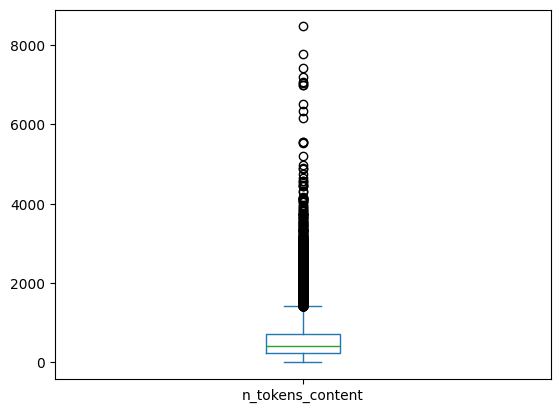

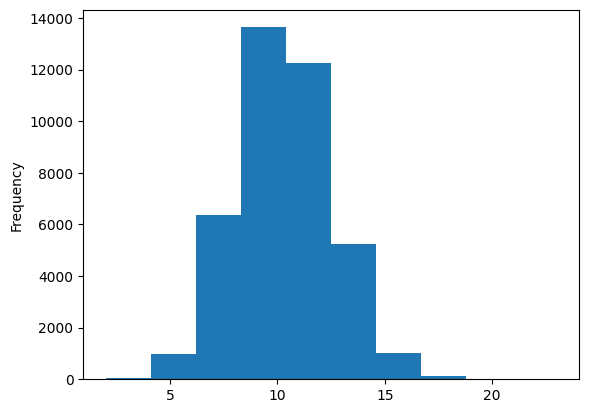

******************************************skew*************************************************
****************************************kurtosis***********************************************
Plotting histograms


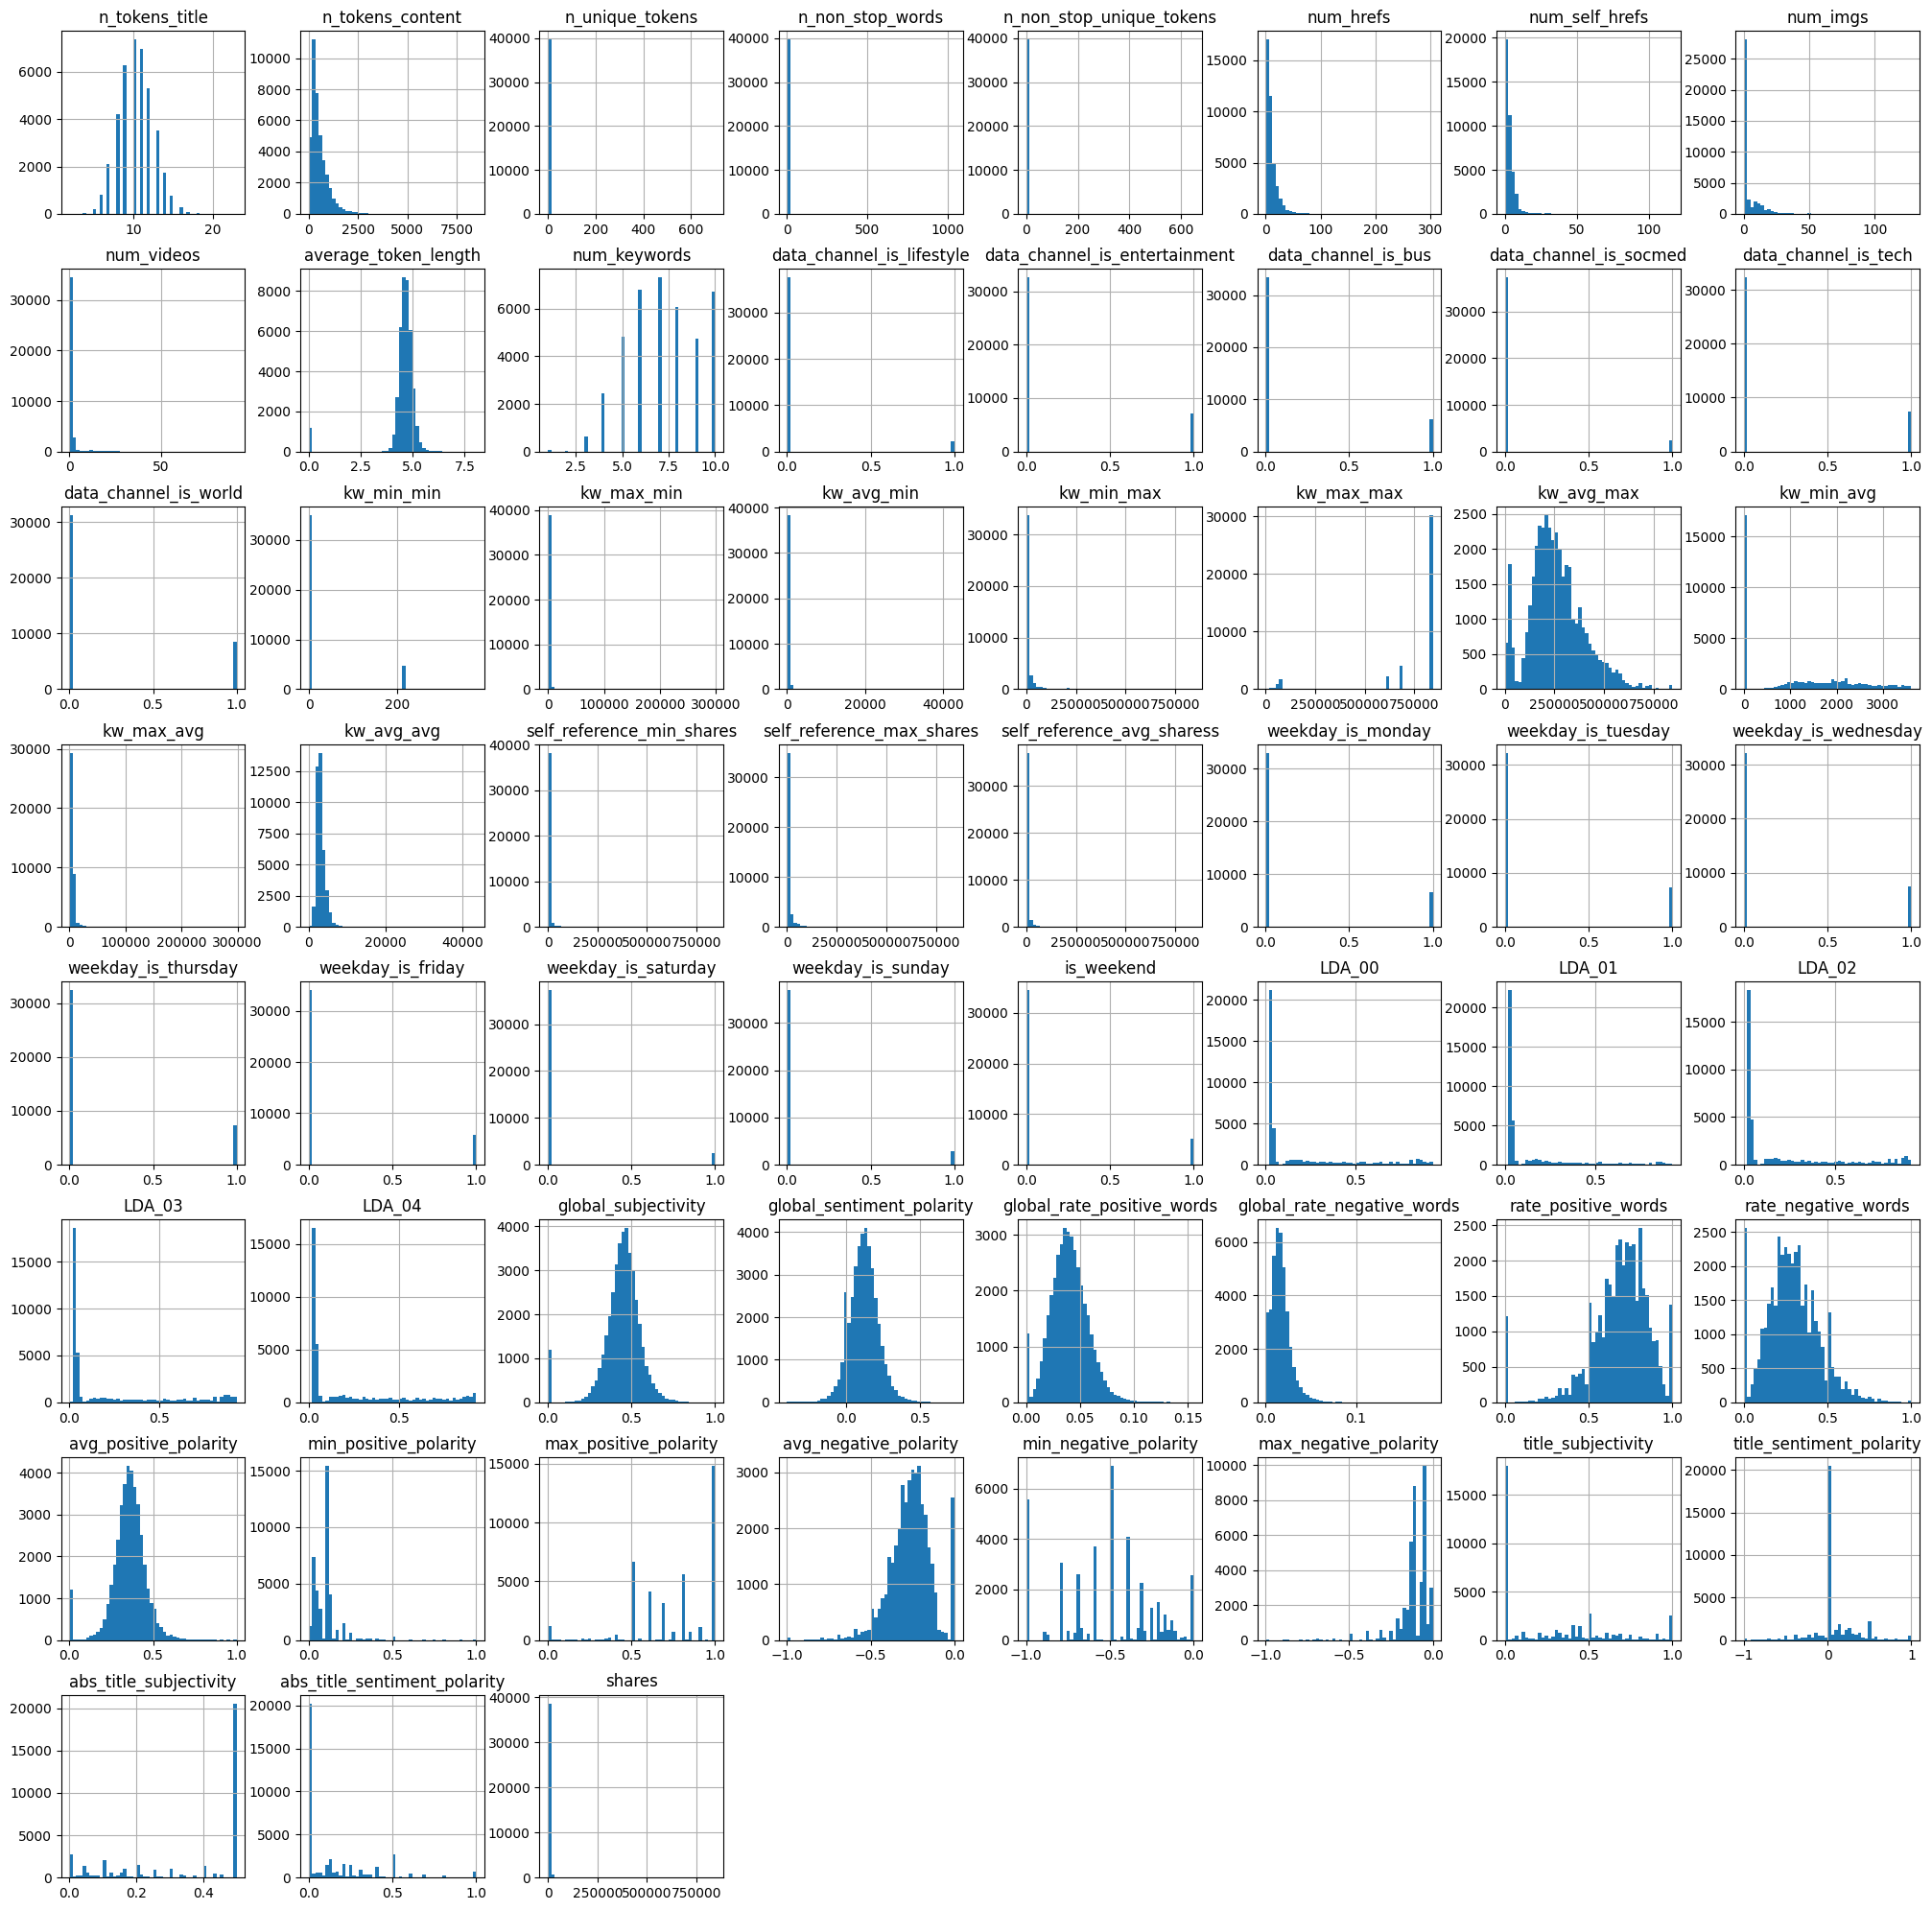

A couple of comments: Different scales, some features do not have the necessary values to see generate a histogram
for example week_is_monday altough is a numeric value, is a binary feature , but others like num_keywords have few categories
so the histogram is not possible to see a well-generated curve For a first model, we'll take into account the following numerical features:
n_tokens_content num_hrefs average_token_length kw_avg_max global_subjectivity , global_sentiment_polarity , global_rate_positive_words , global_rate_negative_words
rate_positive_words , rate_negative_words avg_positive_polarity , avg_negative_polarity Binary features: data_channel_is_lifestyle, data_channel_is_entertainment,
data_channel_is_bus, data_channel_is_socmed data_channel_is_tech, data_channel_is_world , weekday_is_monday, weekday_is_tuesday, weekday_is_wednesday
Plotting correlation matrix


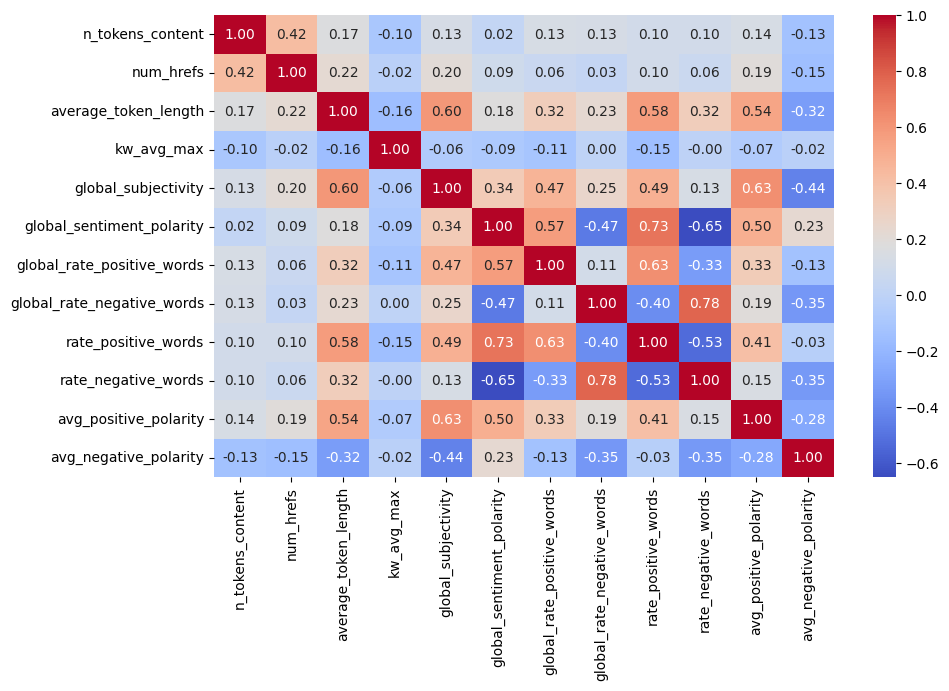

Other proposed plots


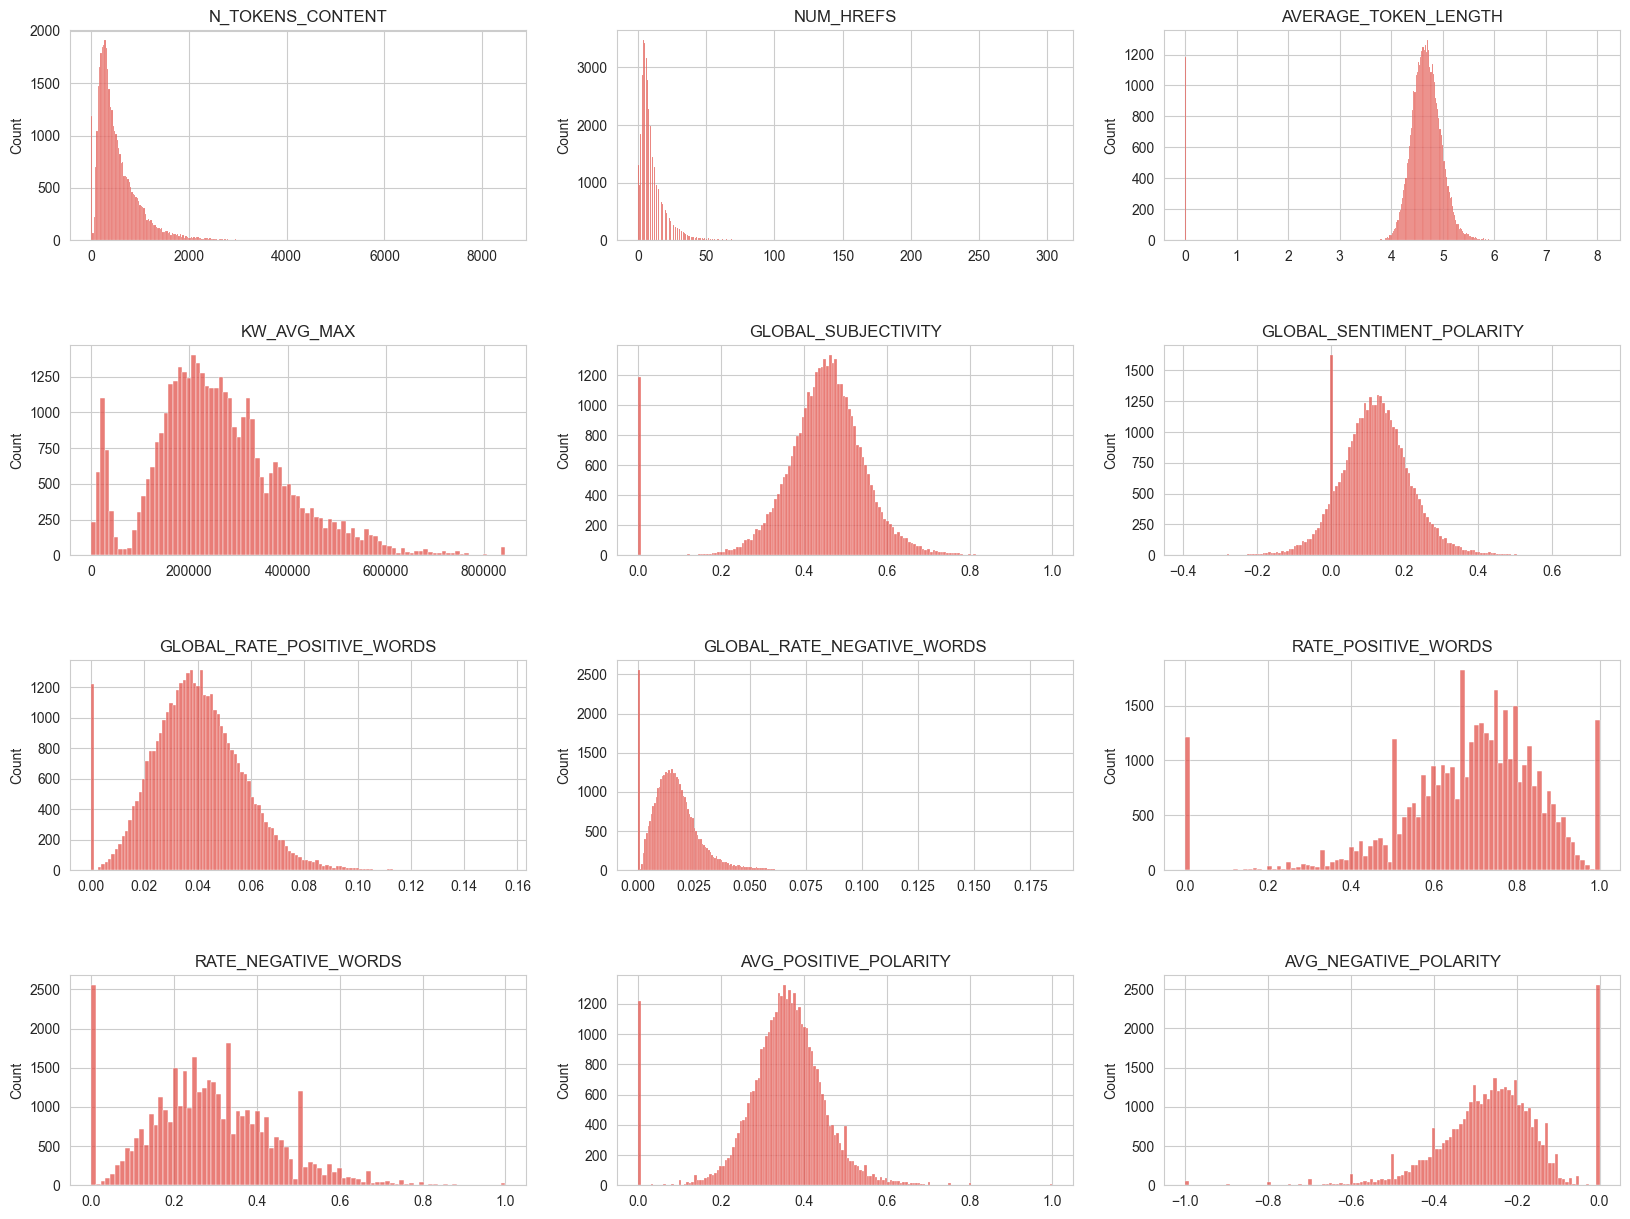

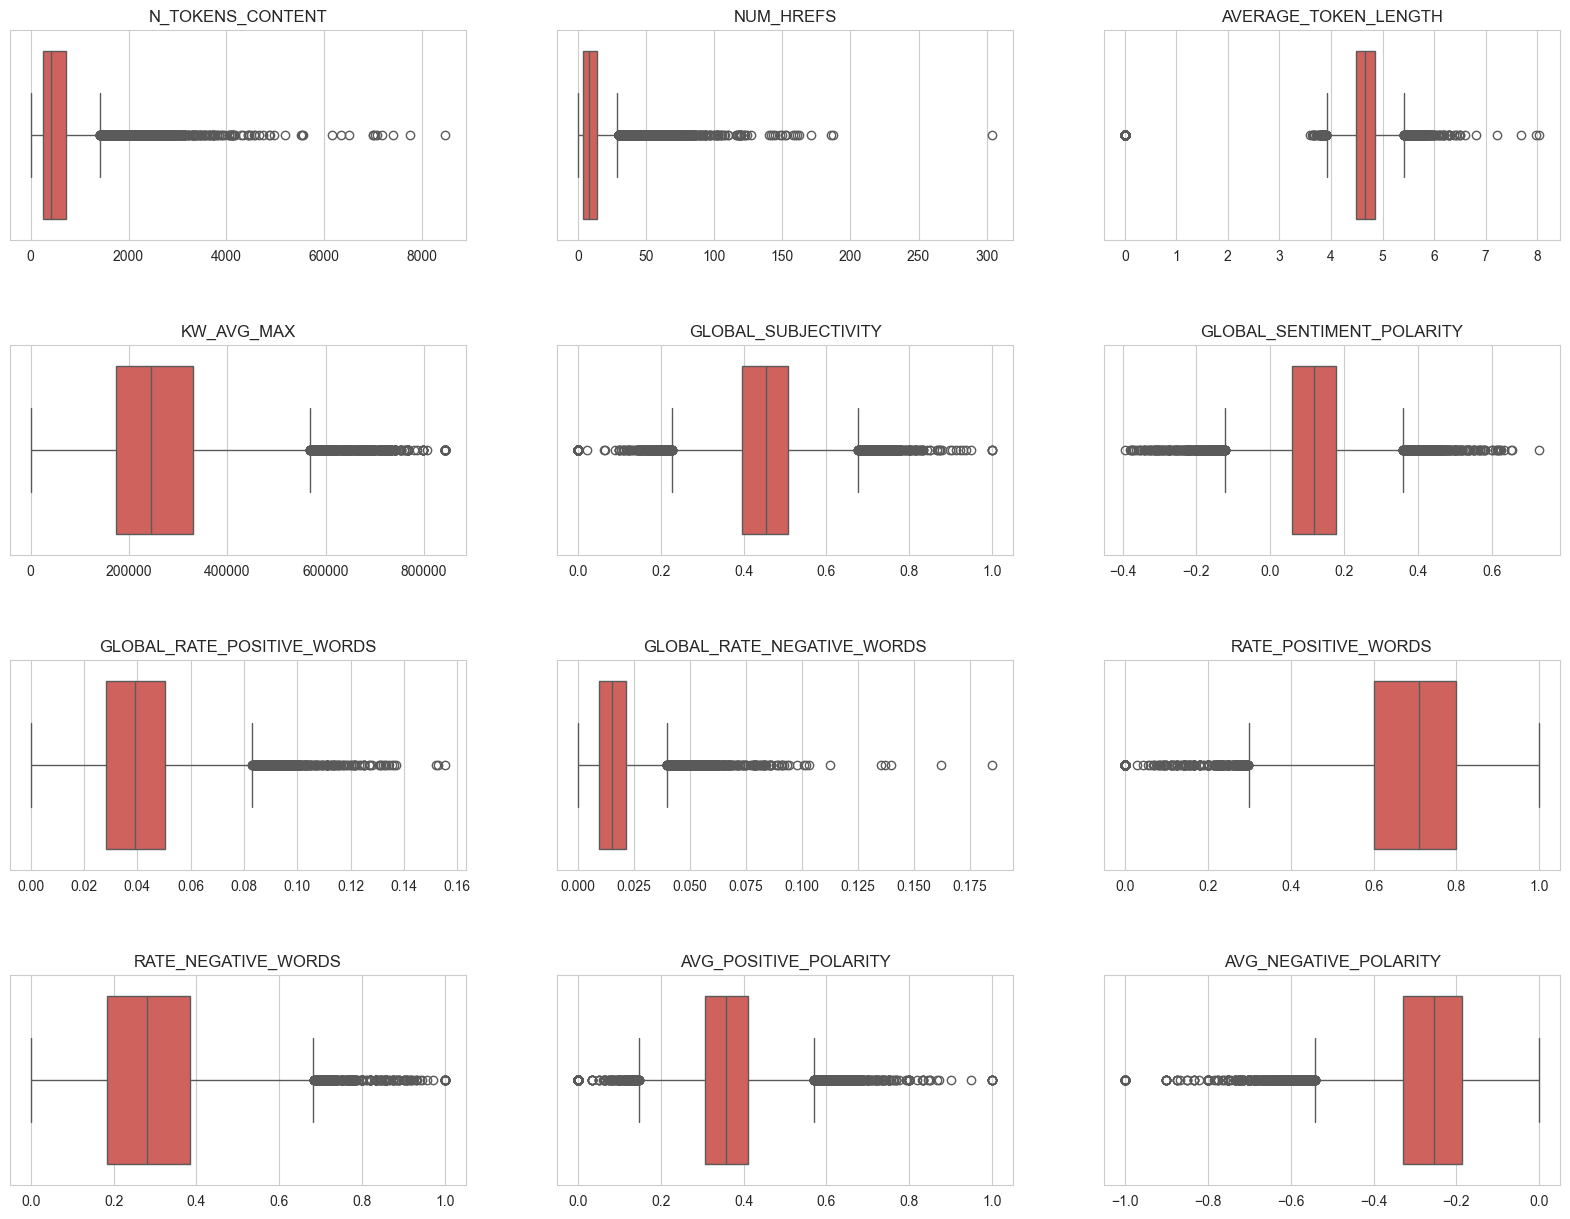

Transforming shares variable


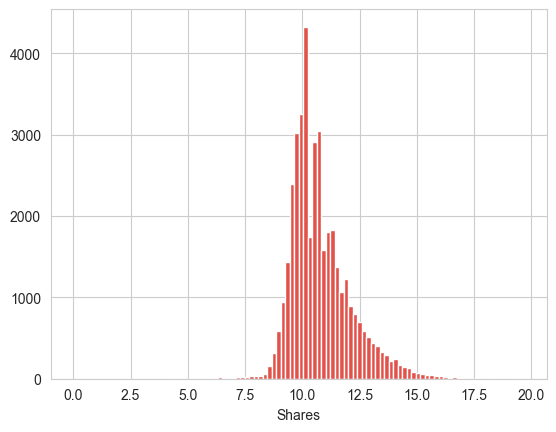

Applying tranformation to numerical features
*********************************************Transformaciones***************************************************


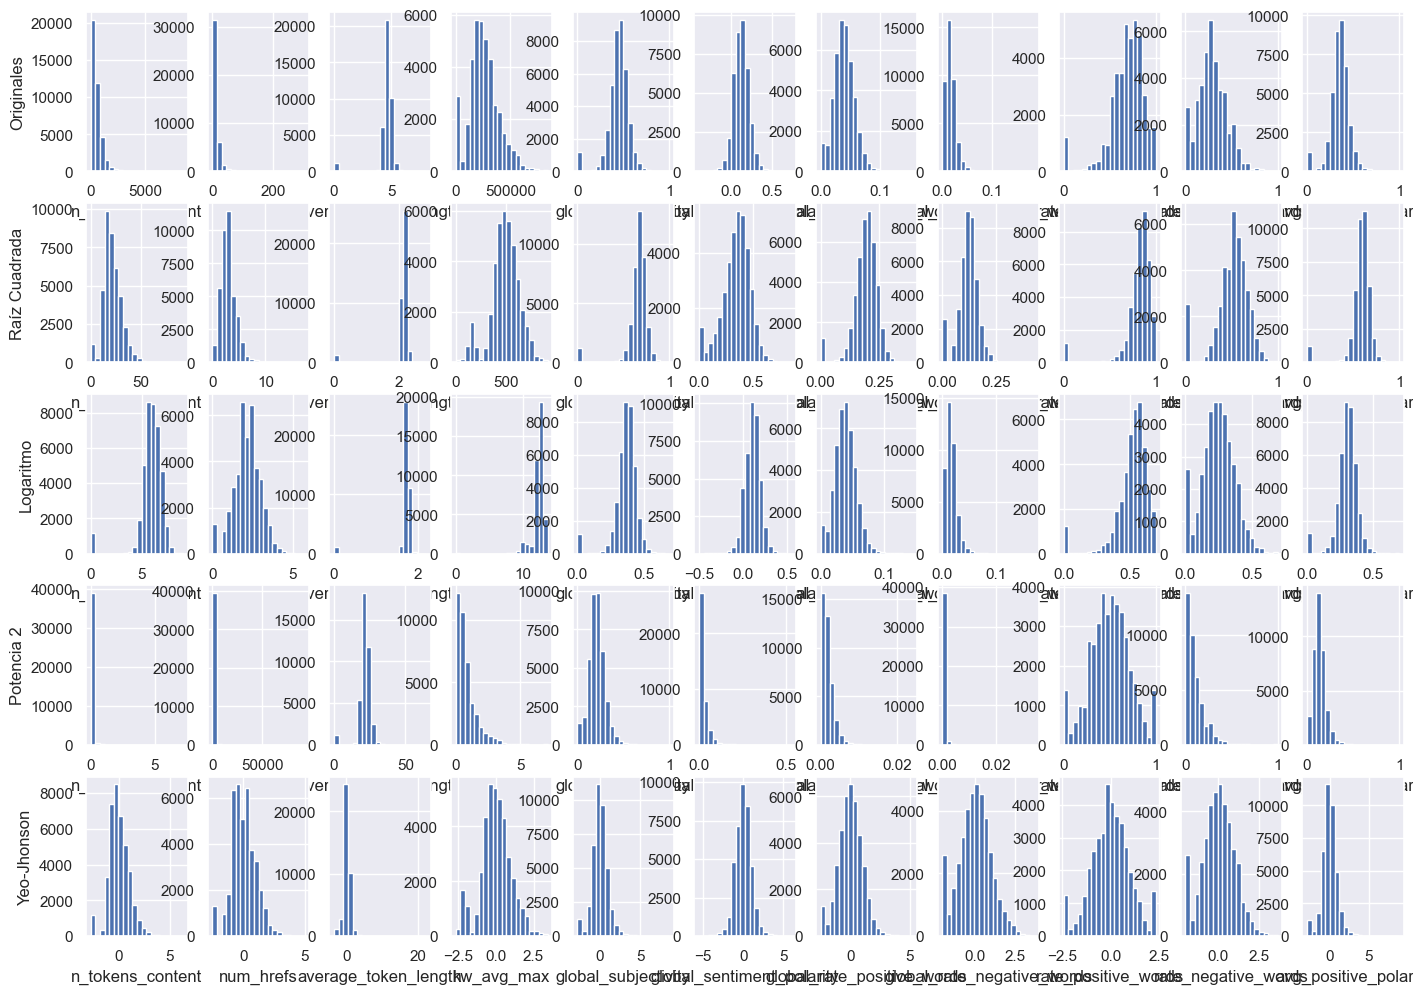

Applying tranformation to the last feature
As the last column named avg_negative_polarity has a lot of negative values, if we apply operations such as square root, or log2 
We will get error, so the only option we have is to apply Yeo-Johnson, let's check if that can help


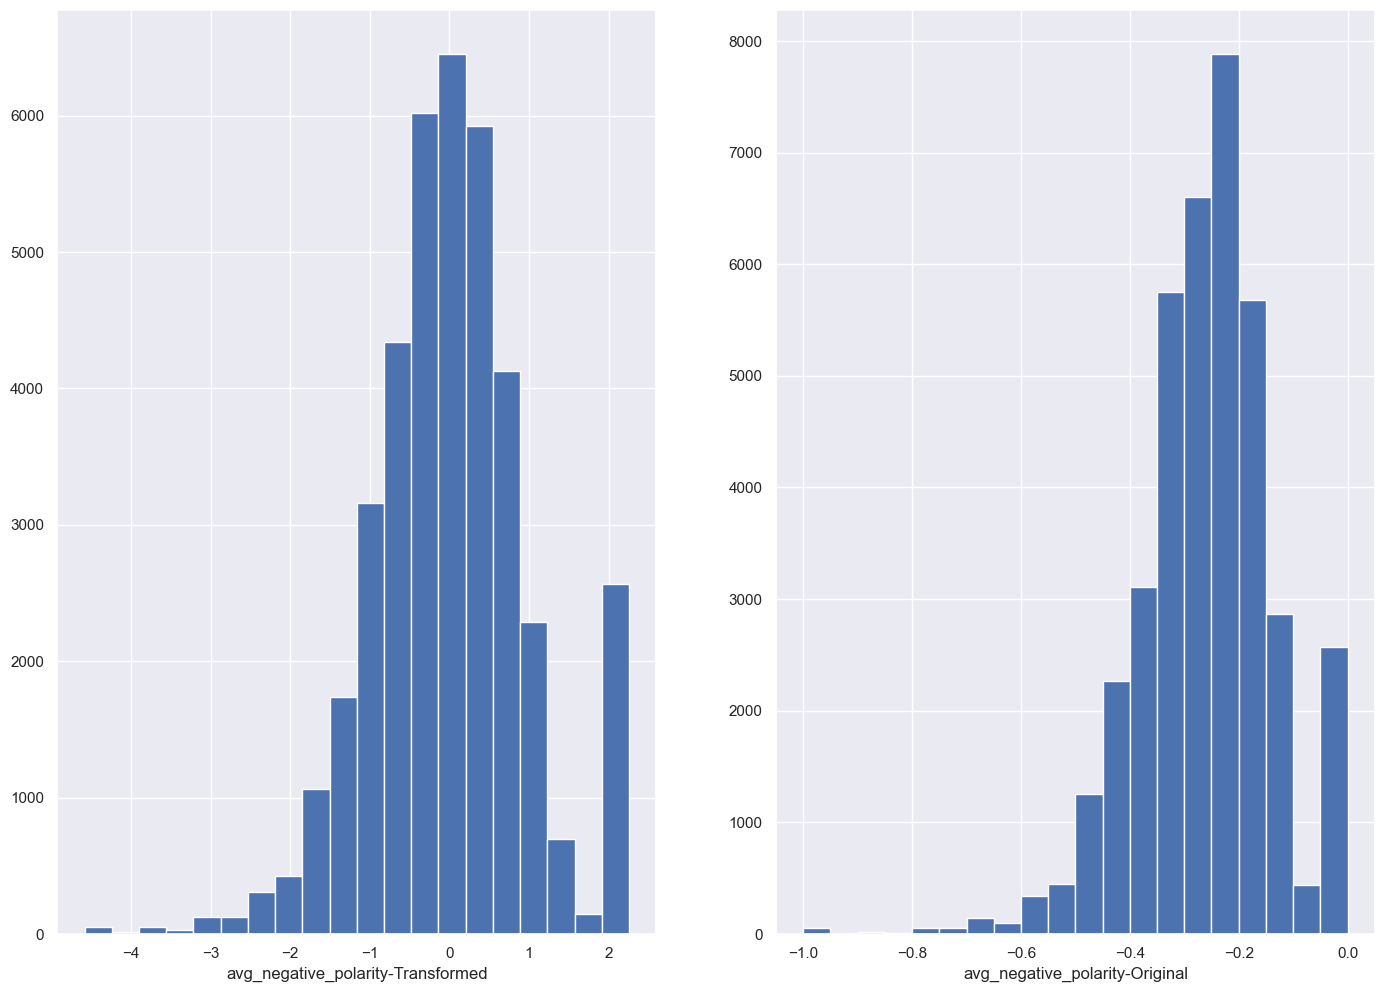

Puntos a destacar, podemos aplicar las siguientes transformaciones a las siguientes variables para corregir skew:
Númericas - Standard Scaler para que todos los rangos esten entre 0 y 1
num_hrefs - n_tokens_content -avg_positive_polarity - global_subjectivity - Logaritmo - np.log1p
average_token_length - global_sentiment_polarity - Original 
kw_avg_max - global_rate_positive_words- Raiz Cuadrada
global_rate_negative_words - rate_positive_words -rate_negative_words- Yeo Johnson 

Training------
RandomForestRegressor(max_depth=16, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=160, random_state=42)

Testing-------
Error Cuadrático Medio: 1.4825105532379537

Cross Validation -----
Average Score with CV: 0.15668938377768532


In [4]:
filepath=r'C:/Users/balde/Desktop/MAESTRIA MNA/Contribs/MLOPSGrupo3/data/raw/online_news_popularity.csv'

model = OnlineShares(filepath)
model.load_data()
X_train_scaled, X_test_scaled, y_train, y_test = model.preprocess_data()
print()
print('Training------')
model_reg = model.train_model(X_train_scaled, y_train)
print(model_reg)
print()
print('Testing-------')
model.evaluate_model(model_reg, X_test_scaled , y_test)
print()
print('Cross Validation -----')
model.cross_validate_model()

## Testing

In [5]:
model.X_train.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
19837            15.0          6.444131         0.509709               1.0   
904              11.0          6.016157         0.519608               1.0   
23876             7.0          5.846439         0.609329               1.0   
22966            11.0          5.384495         0.580189               1.0   
4705             13.0          4.820282         0.739837               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
19837                  0.645084   2.708050             1.0       1.0   
904                    0.657480   1.098612             0.0       1.0   
23876                  0.783920   1.791759             2.0       1.0   
22966                  0.775000   2.197225             2.0       3.0   
4705                   0.887324   1.386294             0.0       1.0   

       num_videos  average_token_length  ...  avg_positive_polarity  \
19837         0.0              5.090764  ...               0.243707   
904           0.0              4.958435  ...               0.258775   
23876         0.0              4.942029  ...               0.356775   
22966         0.0              4.520737  ...               0.281915   
4705          0.0              4.479675  ...               0.367780   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
19837               0.033333                    0.8              -0.259184   
904                 0.136364                    0.5              -0.133333   
23876               0.062500                    0.6              -0.282639   
22966               0.033333                    0.5              -0.098214   
4705                0.200000                    1.0              -0.550000   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
19837              -0.500000              -0.100000            0.458333   
904                -0.166667              -0.100000            0.000000   
23876              -0.800000              -0.050000            0.000000   
22966              -0.125000              -0.071429            0.550000   
4705               -1.000000              -0.100000            0.000000   

       title_sentiment_polarity  abs_title_subjectivity  \
19837                  0.333333                0.041667   
904                    0.000000                0.500000   
23876                  0.000000                0.500000   
22966                  0.200000                0.050000   
4705                   0.000000                0.500000   

       abs_title_sentiment_polarity  
19837                      0.333333  
904                        0.000000  
23876                      0.000000  
22966                      0.200000  
4705                       0.000000  

[5 rows x 58 columns]

In [6]:
model.X_train.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [41]:
dict_schema = {
    'n_tokens_title': {
        'range': {
            'min': 1.0,
            'max': 25.0
        },
        'dtype': float,
    },
    'n_tokens_content': {
        'range': {
            'min': 0.0,
            'max': 10.0
        },
        'dtype': float,
    },
    'n_unique_tokens': {
        'range': {
            'min': 0.0,
            'max': 710.0
        },
        'dtype': float,
    },
    'n_non_stop_words': {
        'range': {
            'min': 0.0,
            'max': 1100.0
        },
        'dtype': float,
    },
    'n_non_stop_unique_tokens': {
        'range': {
            'min': 0.0,
            'max': 700.0
        },
        'dtype': float,
    },
    'num_hrefs': {
        'range': {
            'min': 0.0,
            'max': 10.0
        },
        'dtype': float,
    },
    'num_self_hrefs': {
        'range': {
            'min': 0.0,
            'max': 120.0
        },
        'dtype': float,
    },
    'num_imgs': {
        'range': {
            'min': 0.0,
            'max': 130.0
        },
        'dtype': float,
    },
    'num_videos': {
        'range': {
            'min': 0.0,
            'max': 100.0
        },
        'dtype': float,
    },
    'average_token_length': {
        'range': {
            'min': 0.0,
            'max': 9.0
        },
        'dtype': float,
    },
    'num_keywords': {
        'range': {
            'min': 0.0,
            'max': 15.0
        },
        'dtype': float,
    },
    
    'data_channel_is_lifestyle': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'data_channel_is_entertainment': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'data_channel_is_bus': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'data_channel_is_socmed': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'data_channel_is_tech': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'data_channel_is_world': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    
    
    'kw_min_min': {
        'range': {
            'min': -2.0,
            'max': 400.0
        },
        'dtype': float,
    },
    'kw_max_min': {
        'range': {
            'min': -2.0,
            'max': 298500.0
        },
        'dtype': float,
    },
    'kw_avg_min': {
        'range': {
            'min': -2.0,
            'max': 42927
        },
        'dtype': float,
    },
    'kw_min_max': {
        'range': {
            'min': -2.0,
            'max': 843400.0
        },
        'dtype': float,
    },
    'kw_max_max': {
        'range': {
            'min': -2.0,
            'max': 843400.0
        },
        'dtype': float,
    },
    
    'kw_avg_max': {
        'range': {
            'min': -2.0,
            'max': 1000.0
        },
        'dtype': float,
    },
    'kw_min_avg': {
        'range': {
            'min': -2.0,
            'max': 3713.0
        },
        'dtype': float,
    },
    'kw_max_avg': {
        'range': {
            'min': -2.0,
            'max': 298500.0
        },
        'dtype': float,
    },
    'kw_avg_avg': {
        'range': {
            'min': -2.0,
            'max': 43667.0
        },
        'dtype': float,
    },
    'self_reference_min_shares': {
        'range': {
            'min': 0.0,
            'max': 690500.0
        },
        'dtype': float,
    },
    'self_reference_max_shares': {
        'range': {
            'min': 0.0,
            'max': 843400.0
        },
        'dtype': float,
    },
    
    'self_reference_avg_sharess': {
        'range': {
            'min': 0.0,
            'max': 690500.0
        },
        'dtype': float,
    },
    'weekday_is_monday': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'weekday_is_tuesday': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'weekday_is_wednesday': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'weekday_is_thursday': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'weekday_is_friday': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'weekday_is_saturday': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'weekday_is_sunday': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'is_weekend': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'LDA_00': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'LDA_01': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'LDA_02': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'LDA_03': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'LDA_04': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'global_subjectivity': {
        'range': {
            'min': 0.0,
            'max': 1.0
        },
        'dtype': float,
    },
    'global_sentiment_polarity': {
        'range': {
            'min': -5,
            'max': 1.0
        },
        'dtype': float,
    },
    'global_rate_positive_words': {
        'range': {
            'min': -5,
            'max': 1.0
        },
        'dtype': float,
    },
    
    'global_rate_negative_words': {
        'range': {
            'min': -5,
            'max': 5
        },
        'dtype': float,
    },
    'rate_positive_words': {
        'range': {
            'min': -5,
            'max': 4
        },
        'dtype': float,
    },
    'rate_negative_words': {
        'range': {
            'min': -5,
            'max': 5
        },
        'dtype': float,
    },
    
    
    'avg_positive_polarity': {
        'range': {
            'min': -5,
            'max': 1.0
        },
        'dtype': float,
    },
    'min_positive_polarity': {
        'range': {
            'min': -5,
            'max': 1.0
        },
        'dtype': float,
    },
    'max_positive_polarity': {
        'range': {
            'min': -5,
            'max': 1.0
        },
        'dtype': float,
    },
    'avg_negative_polarity': {
        'range': {
            'min': -5,
            'max': 1.0
        },
        'dtype': float,
    },
    'min_negative_polarity': {
        'range': {
            'min': -5,
            'max': 1.0
        },
        'dtype': float,
    },
    'max_negative_polarity': {
        'range': {
            'min': -5,
            'max': 1.0
        },
        'dtype': float,
    },
    'title_subjectivity': {
        'range': {
            'min': -5,
            'max': 1.0
        },
        'dtype': float,
    },
    'title_sentiment_polarity': {
        'range': {
            'min': -5,
            'max': 1.0
        },
        'dtype': float,
    },
    'abs_title_subjectivity': {
        'range': {
            'min': -5,
            'max': 1.0
        },
        'dtype': float,
    },
    'abs_title_sentiment_polarity': {
        'range': {
            'min': -5,
            'max': 1.0
        },
        'dtype': float,
    }
}


In [42]:
dict_schema

{'n_tokens_title': {'range': {'min': 1.0, 'max': 25.0}, 'dtype': float},
 'n_tokens_content': {'range': {'min': 0.0, 'max': 10.0}, 'dtype': float},
 'n_unique_tokens': {'range': {'min': 0.0, 'max': 710.0}, 'dtype': float},
 'n_non_stop_words': {'range': {'min': 0.0, 'max': 1100.0}, 'dtype': float},
 'n_non_stop_unique_tokens': {'range': {'min': 0.0, 'max': 700.0},
  'dtype': float},
 'num_hrefs': {'range': {'min': 0.0, 'max': 10.0}, 'dtype': float},
 'num_self_hrefs': {'range': {'min': 0.0, 'max': 120.0}, 'dtype': float},
 'num_imgs': {'range': {'min': 0.0, 'max': 130.0}, 'dtype': float},
 'num_videos': {'range': {'min': 0.0, 'max': 100.0}, 'dtype': float},
 'average_token_length': {'range': {'min': 0.0, 'max': 9.0}, 'dtype': float},
 'num_keywords': {'range': {'min': 0.0, 'max': 15.0}, 'dtype': float},
 'data_channel_is_lifestyle': {'range': {'min': 0.0, 'max': 1.0},
  'dtype': float},
 'data_channel_is_entertainment': {'range': {'min': 0.0, 'max': 1.0},
  'dtype': float},
 'data_chan

### Testing Input Data

In [43]:
@pytest.fixture
def pipeline():
    filepath=r'C:/Users/balde/Desktop/MAESTRIA MNA/Contribs/MLOPSGrupo3/data/raw/online_news_popularity.csv'
    model = OnlineShares(filepath)
    model.load_data()
    X_train_scaled, X_test_scaled, y_train, y_test = model.preprocess_data()
    return model

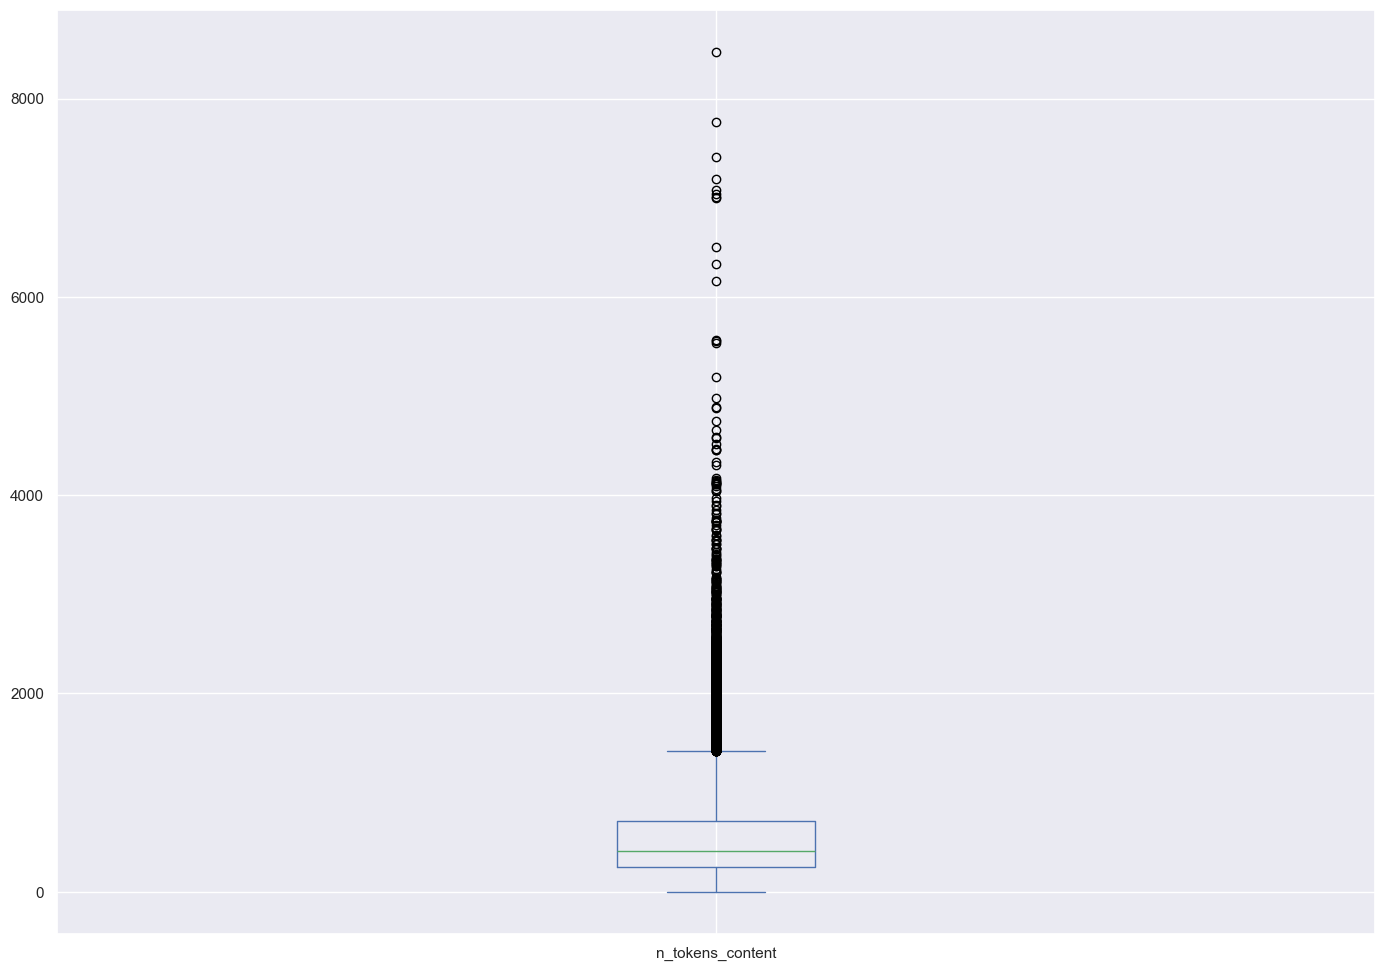

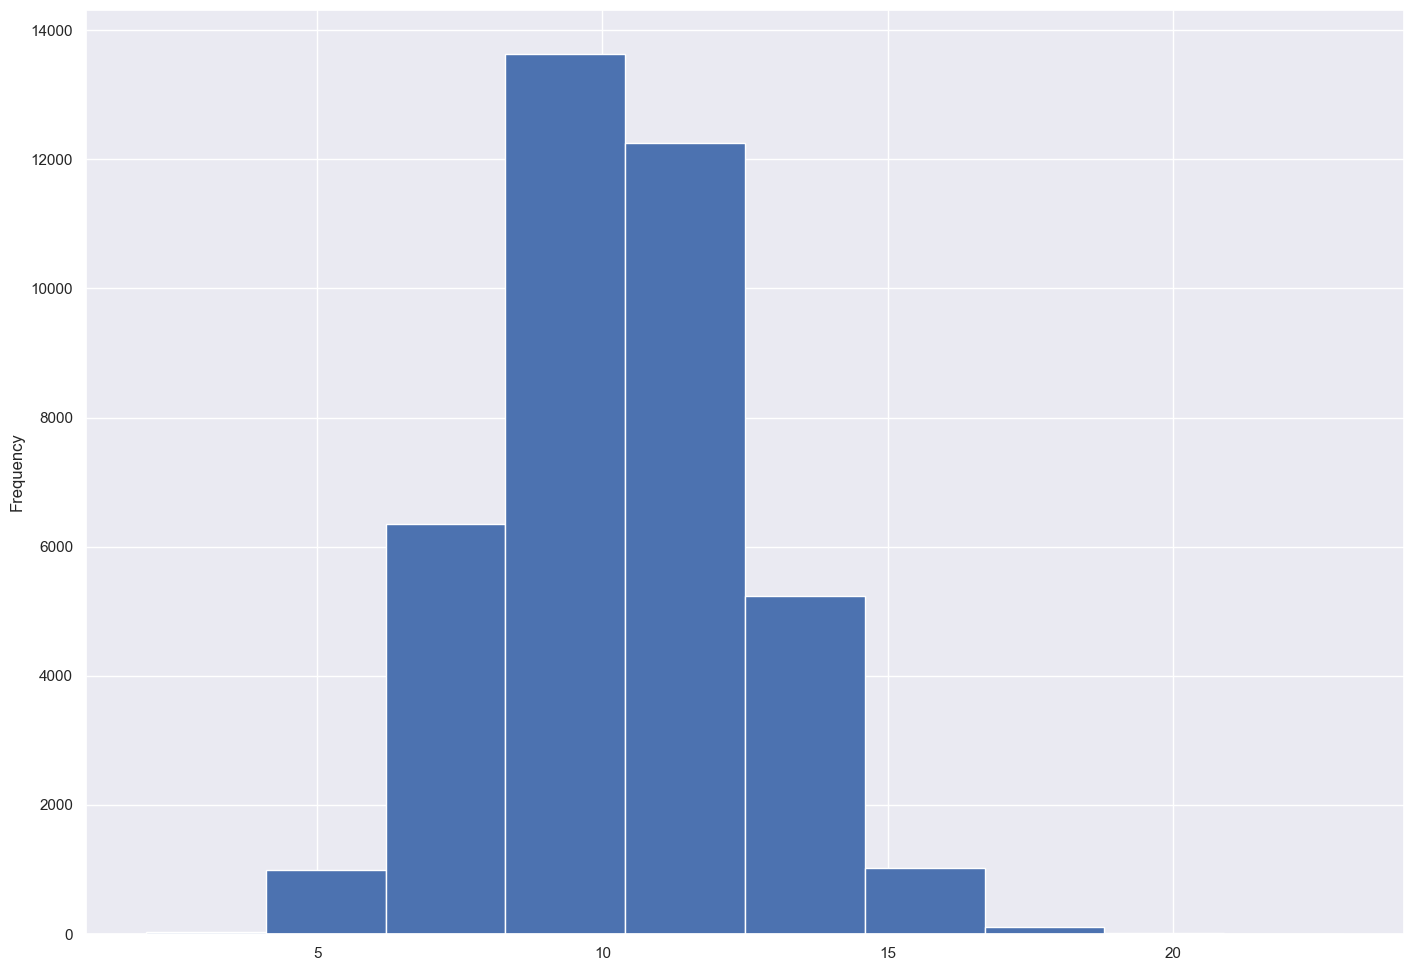

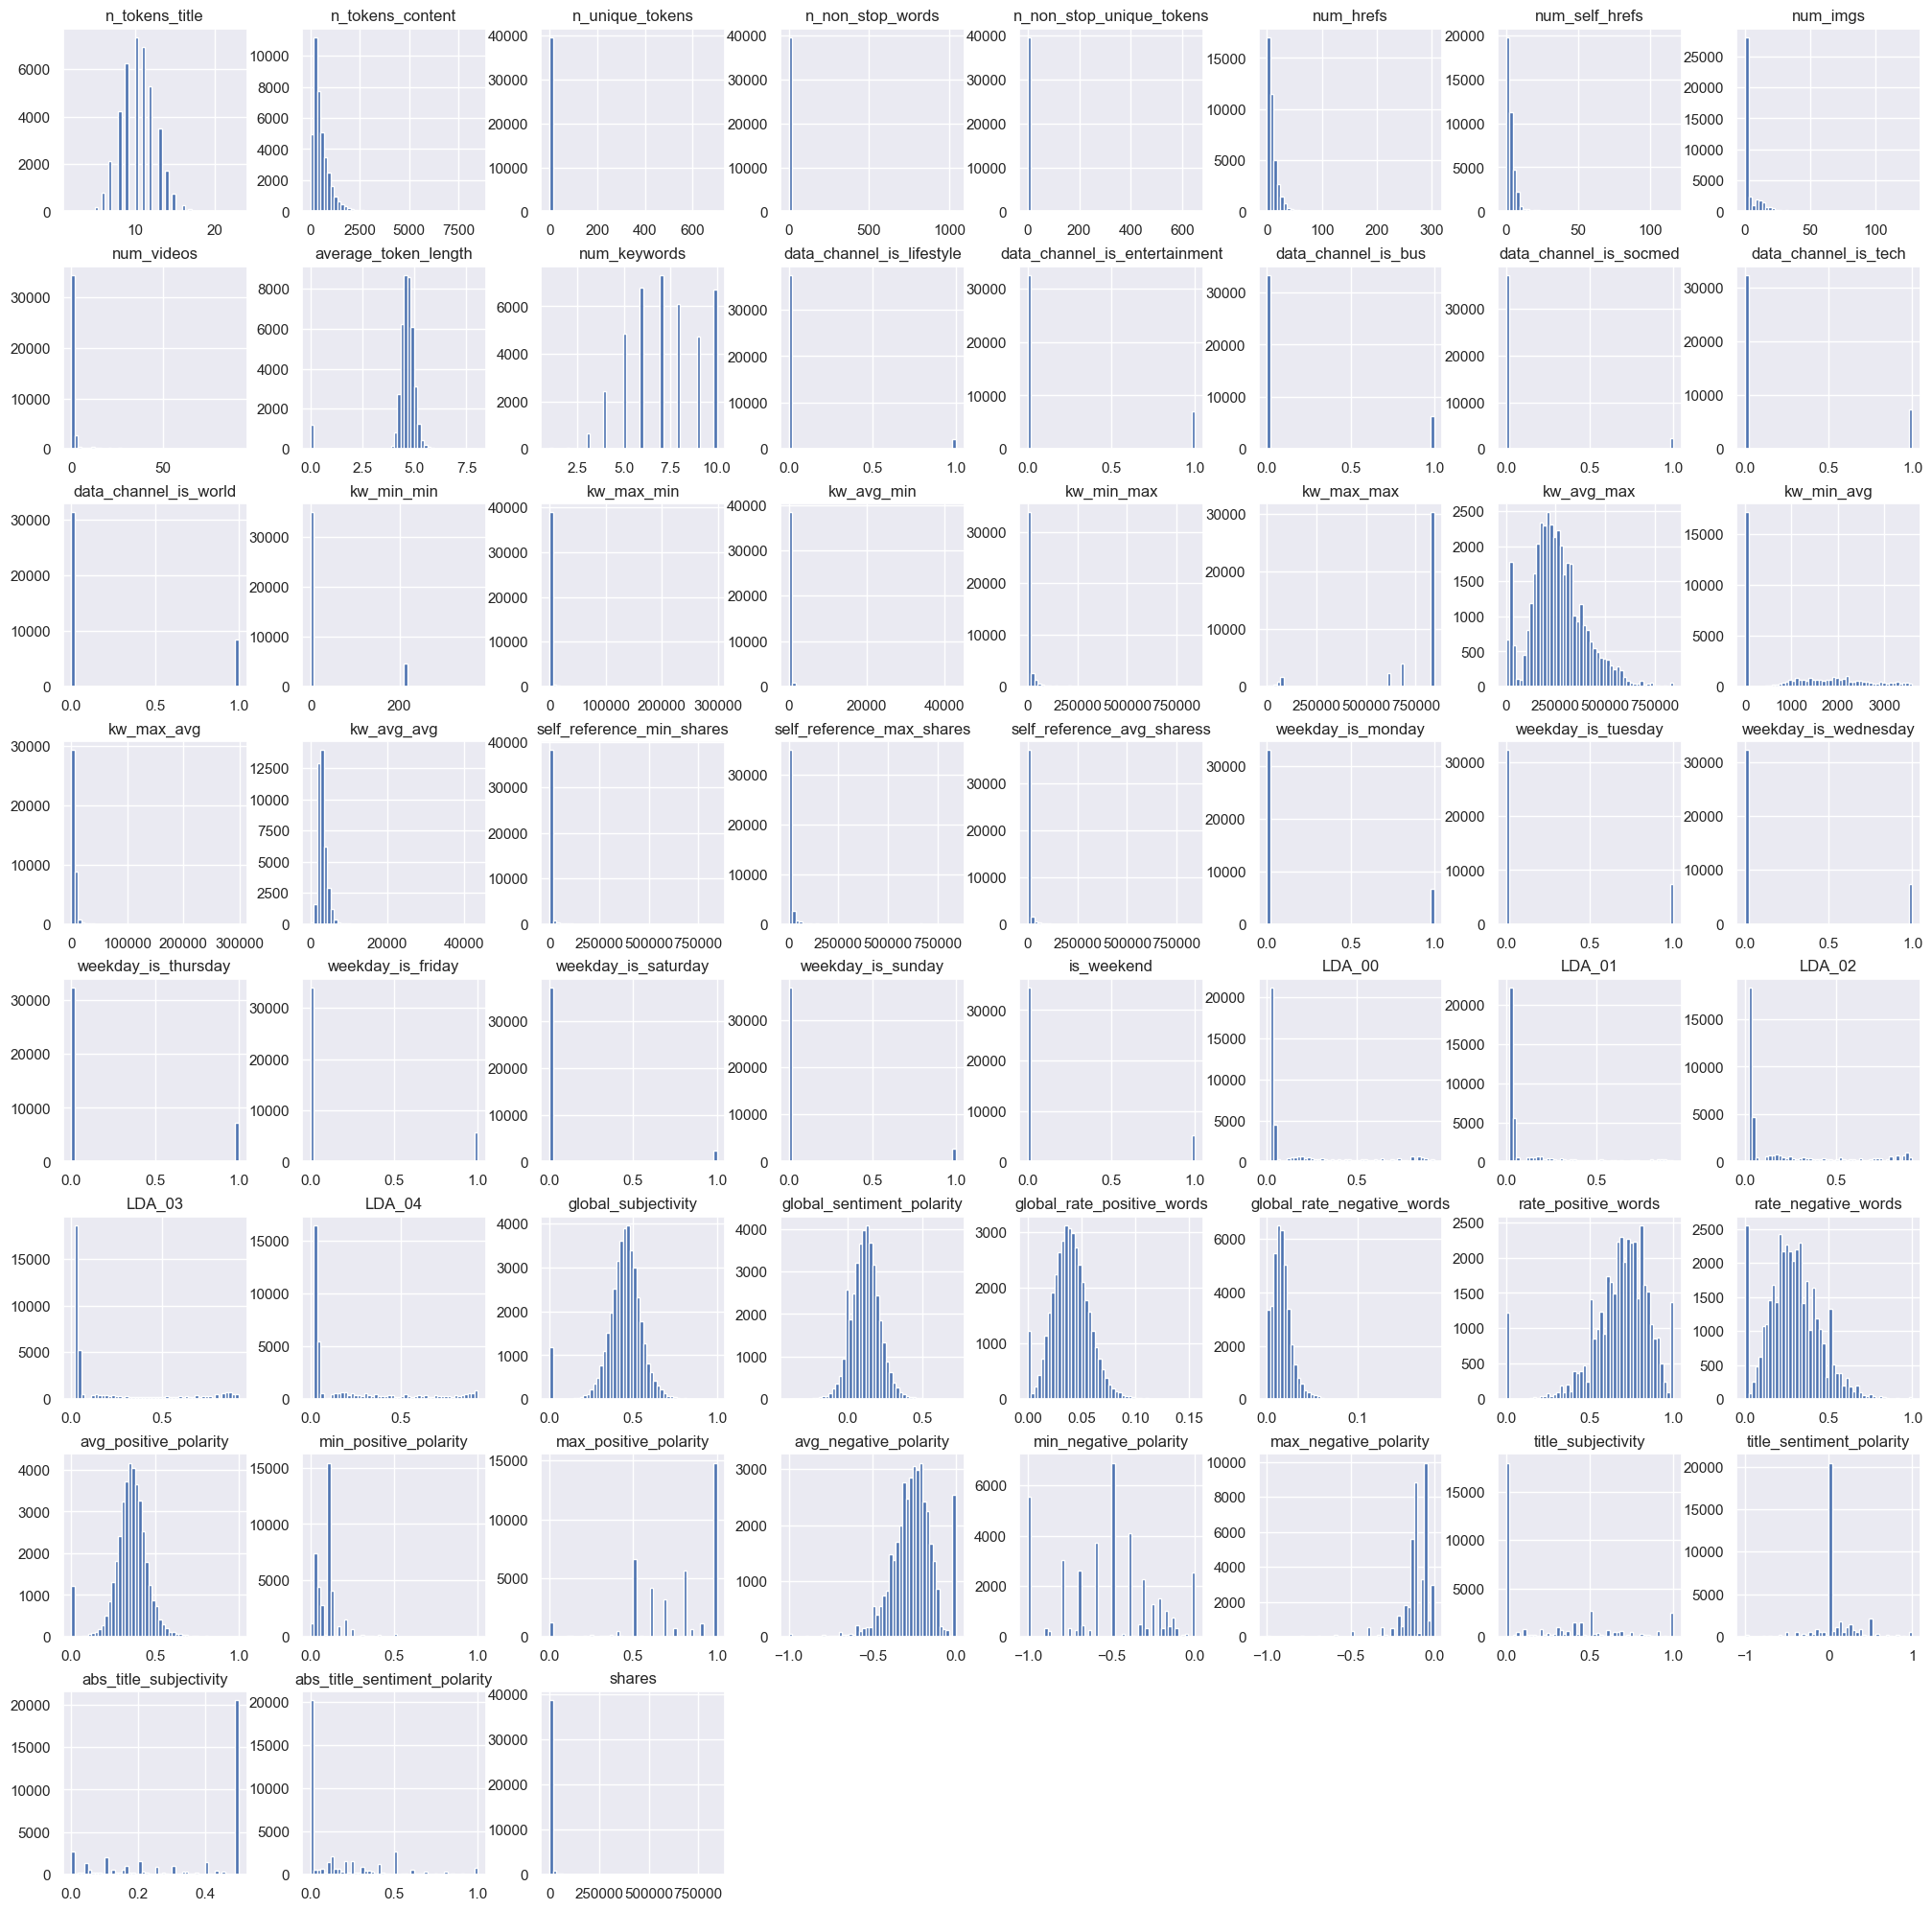

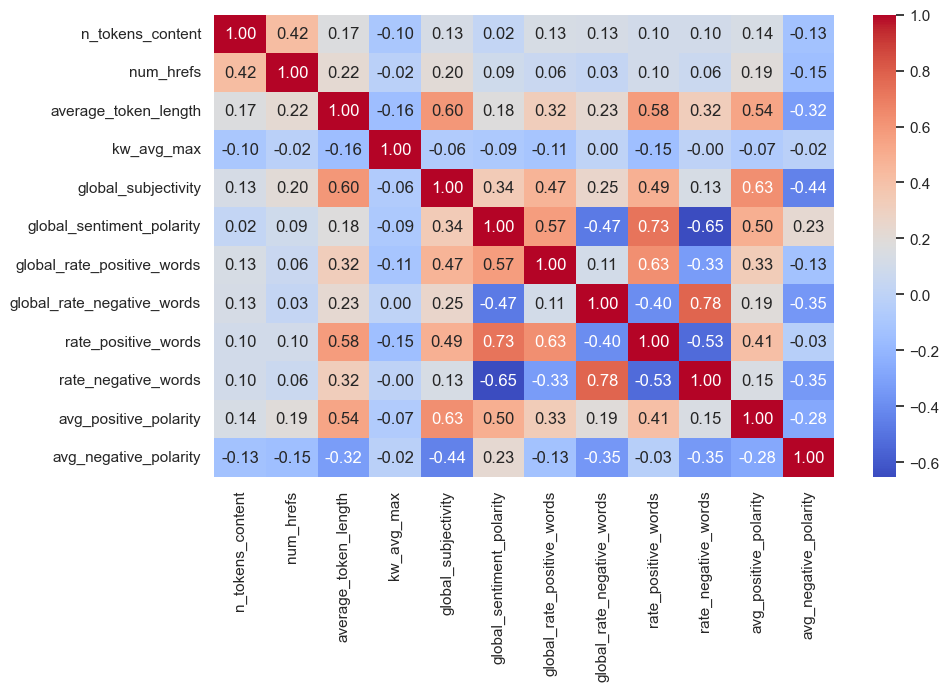

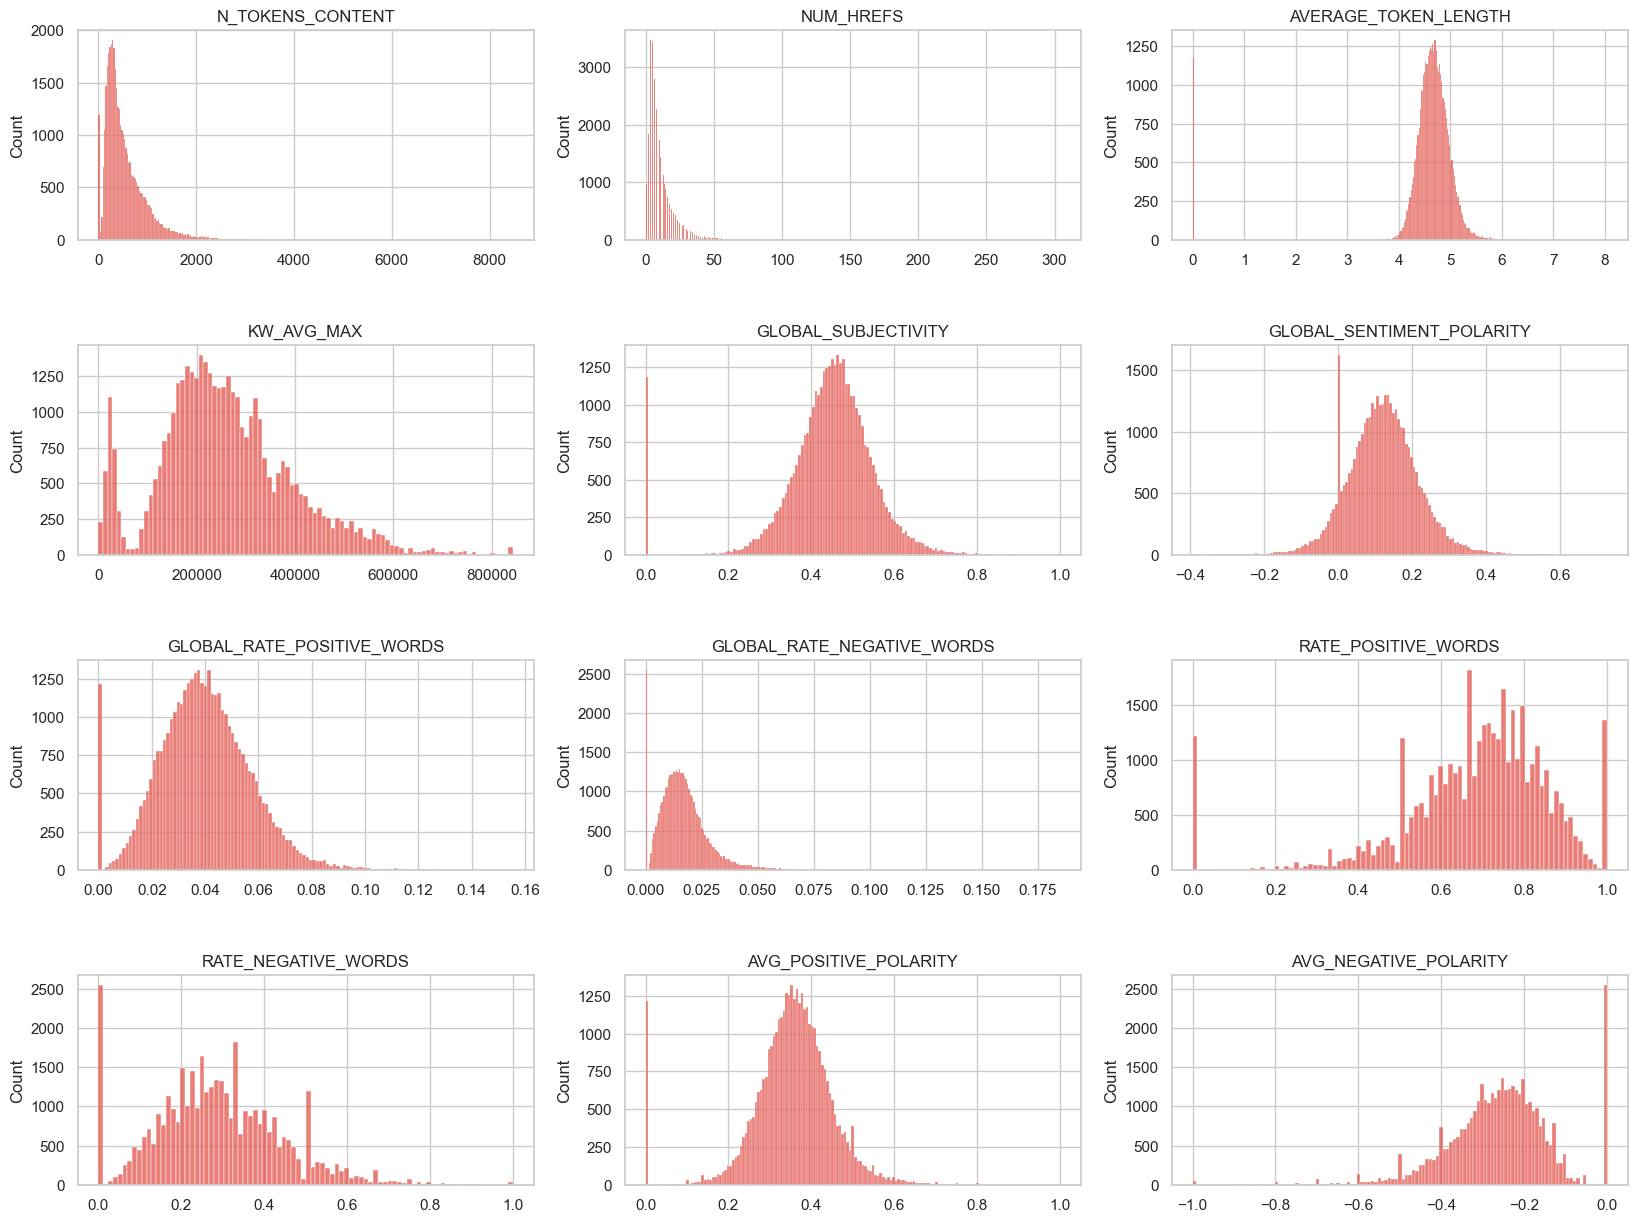

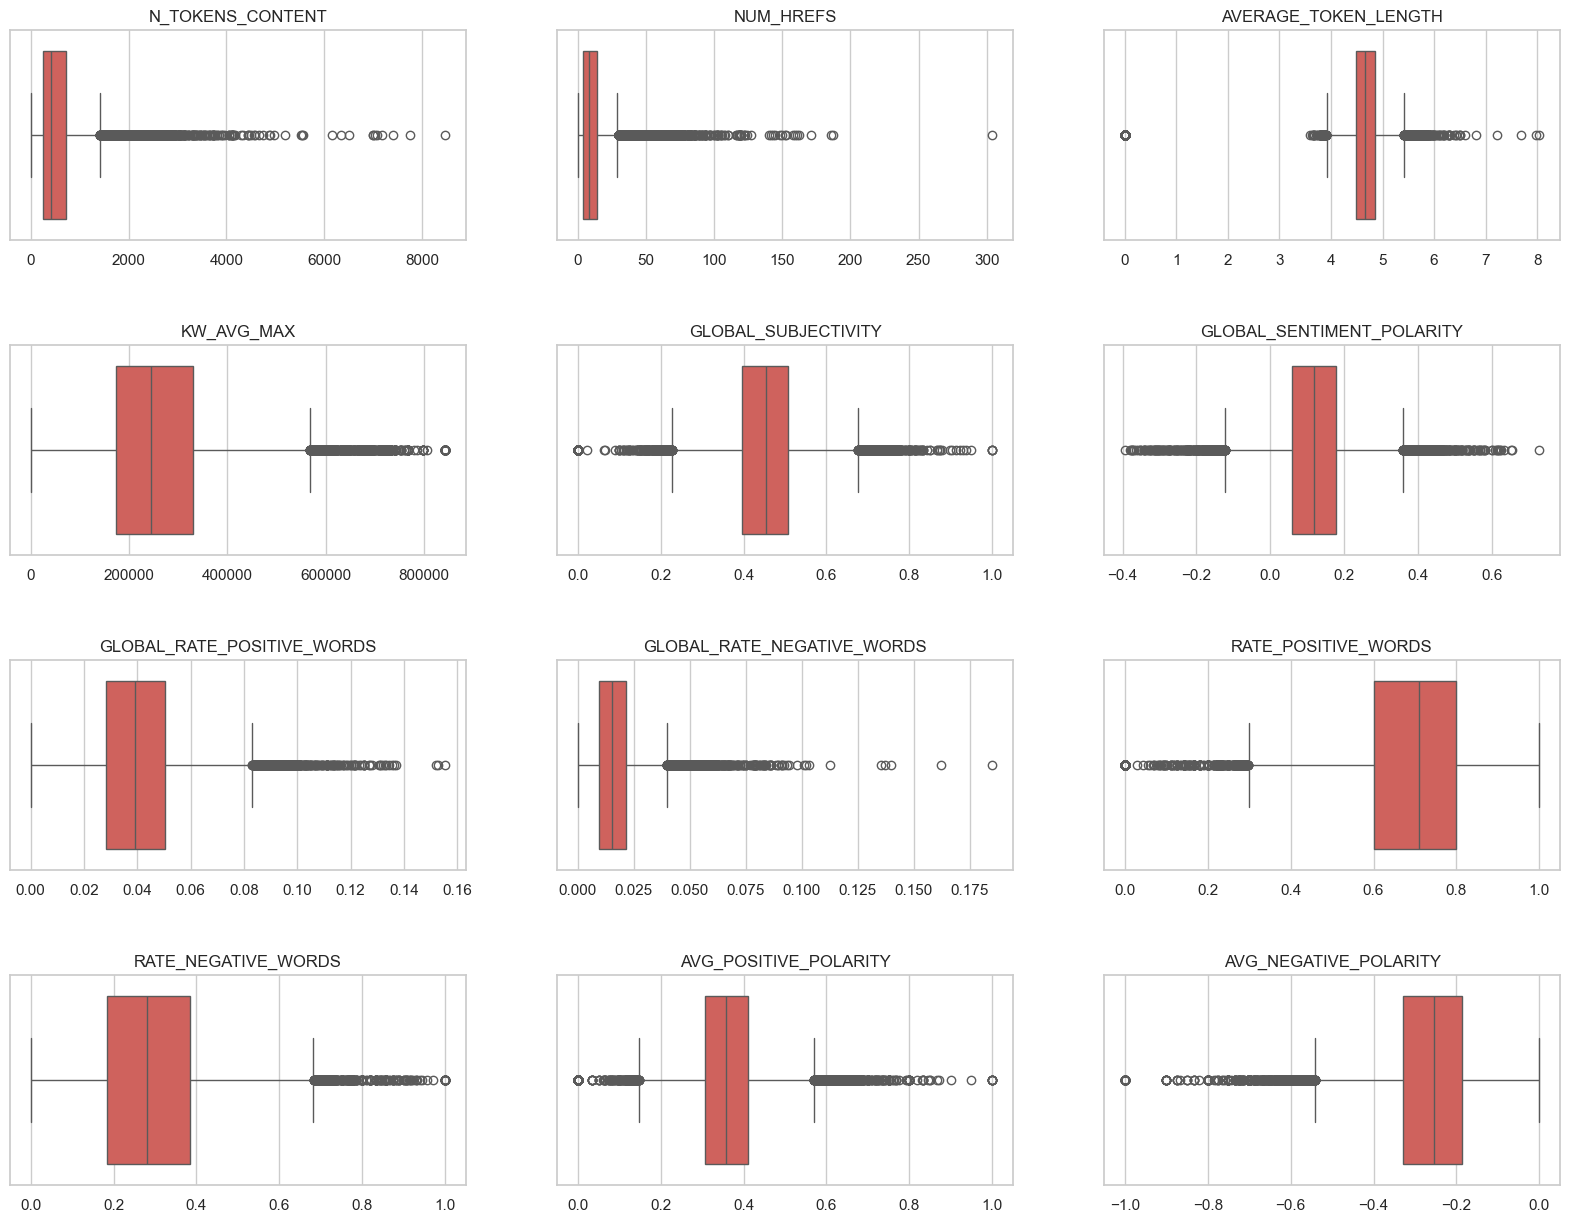

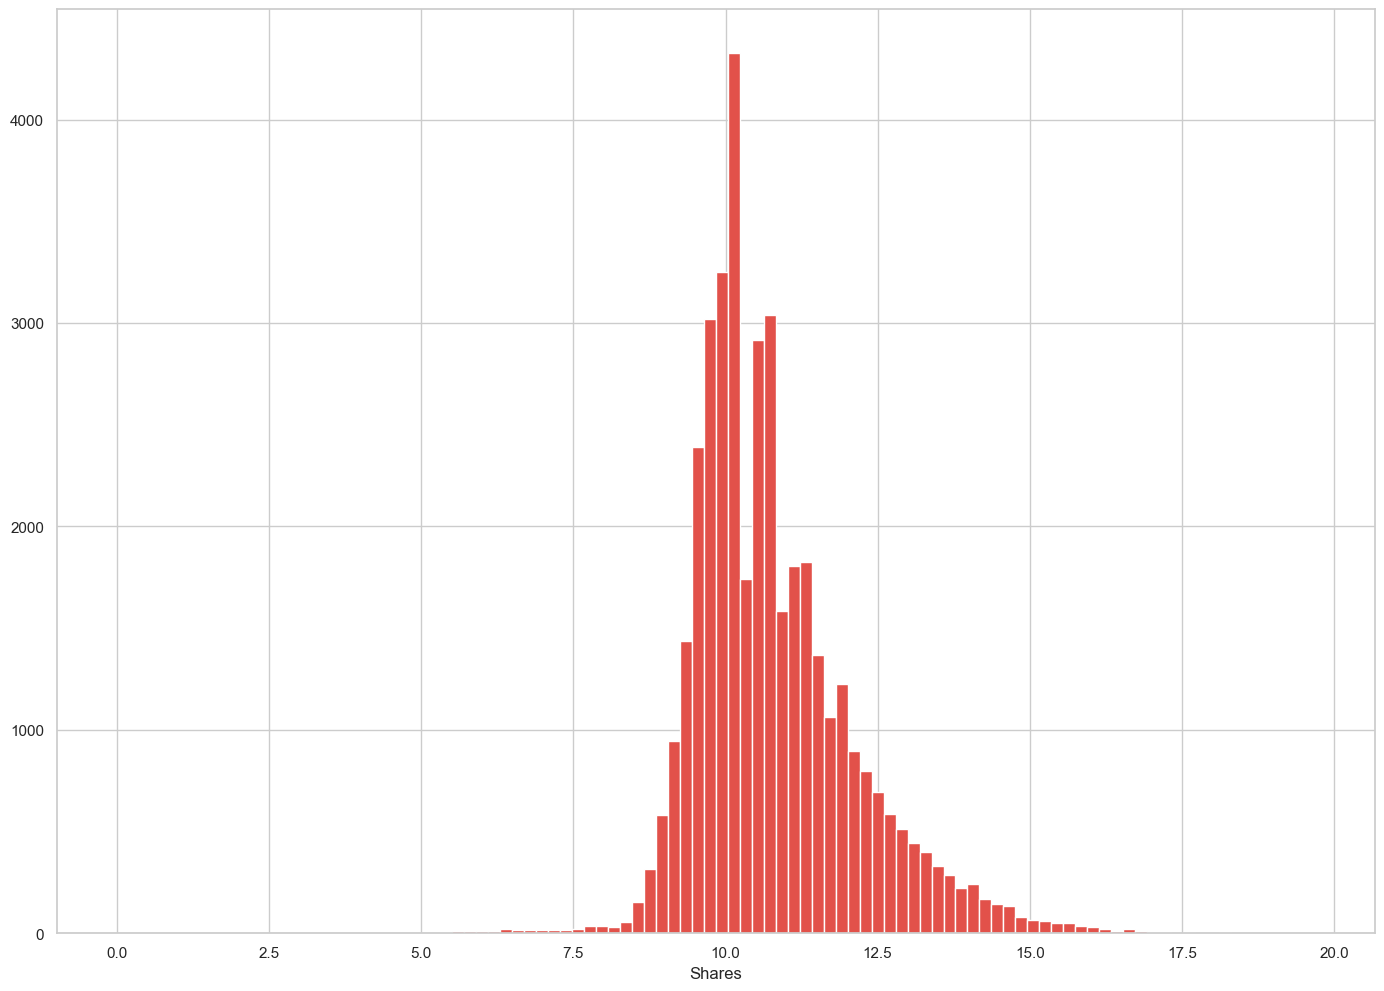

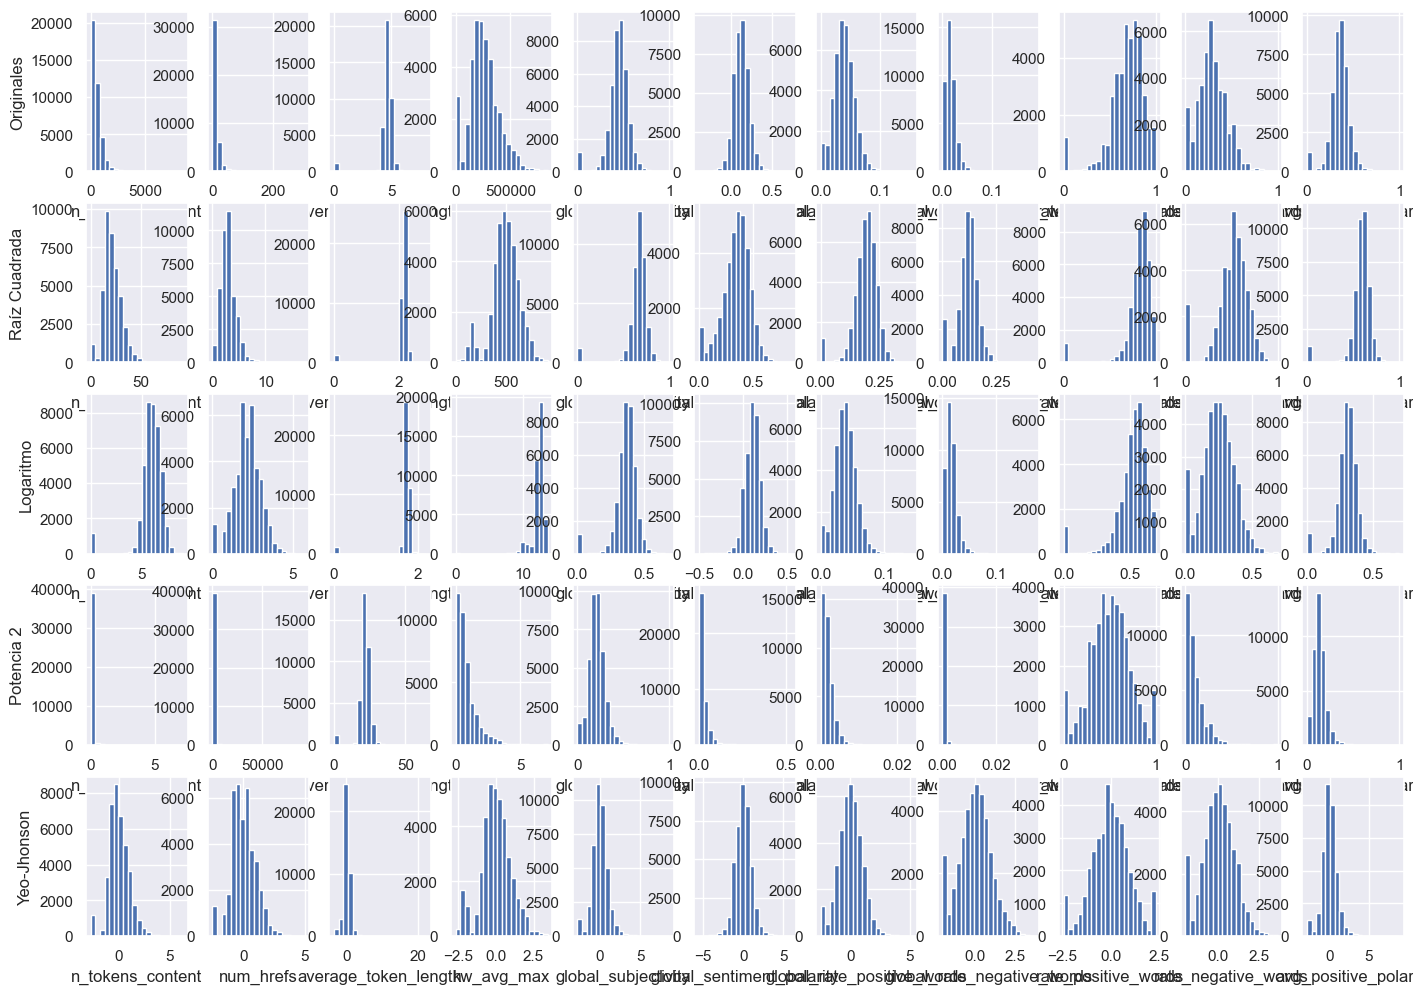

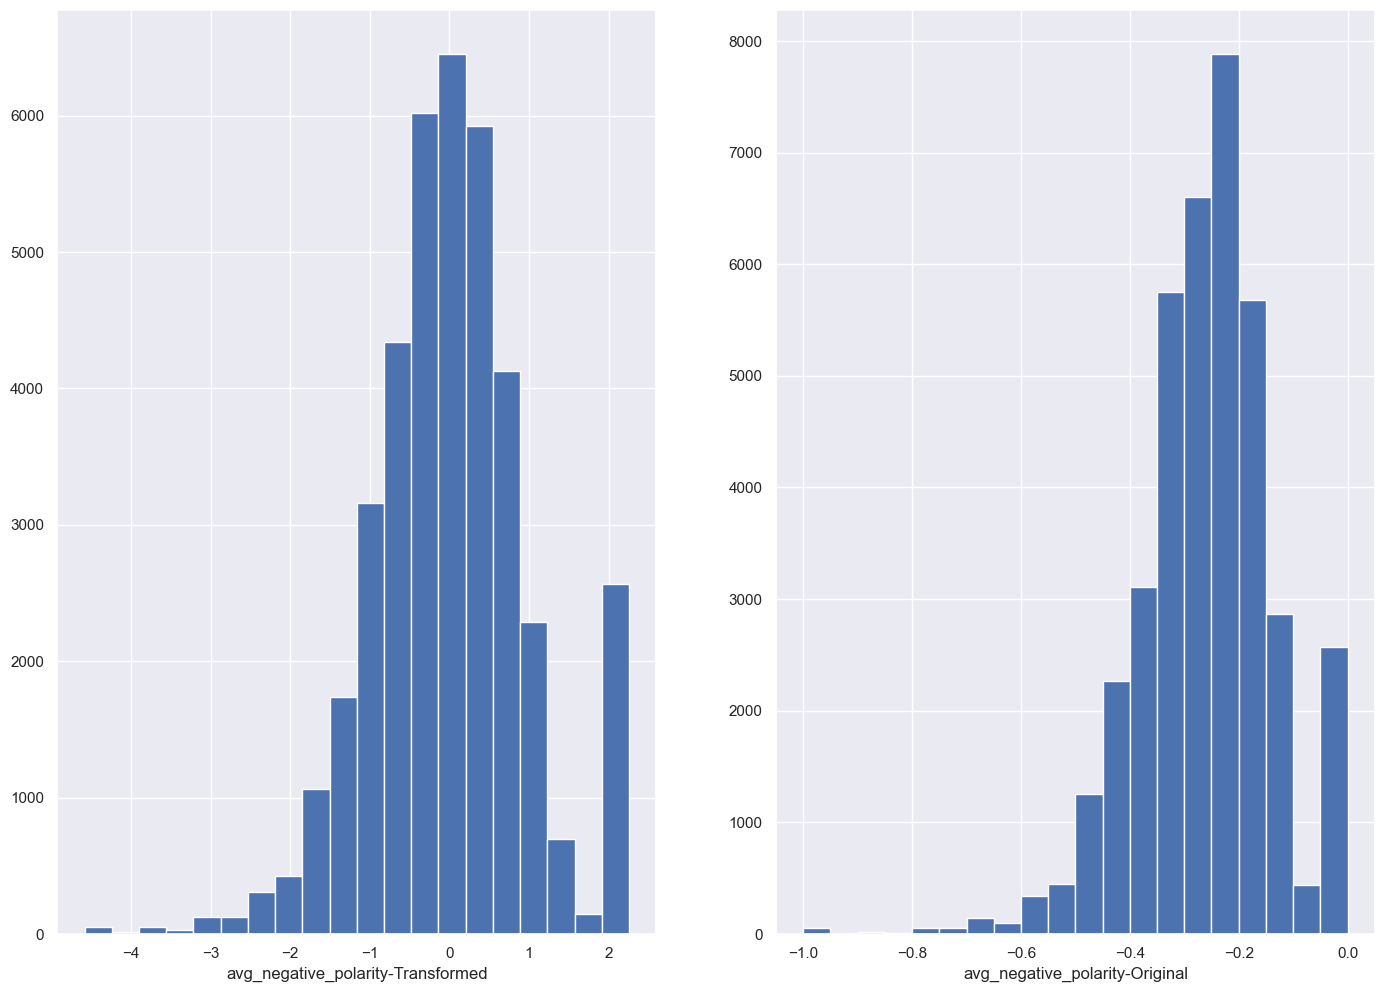

.

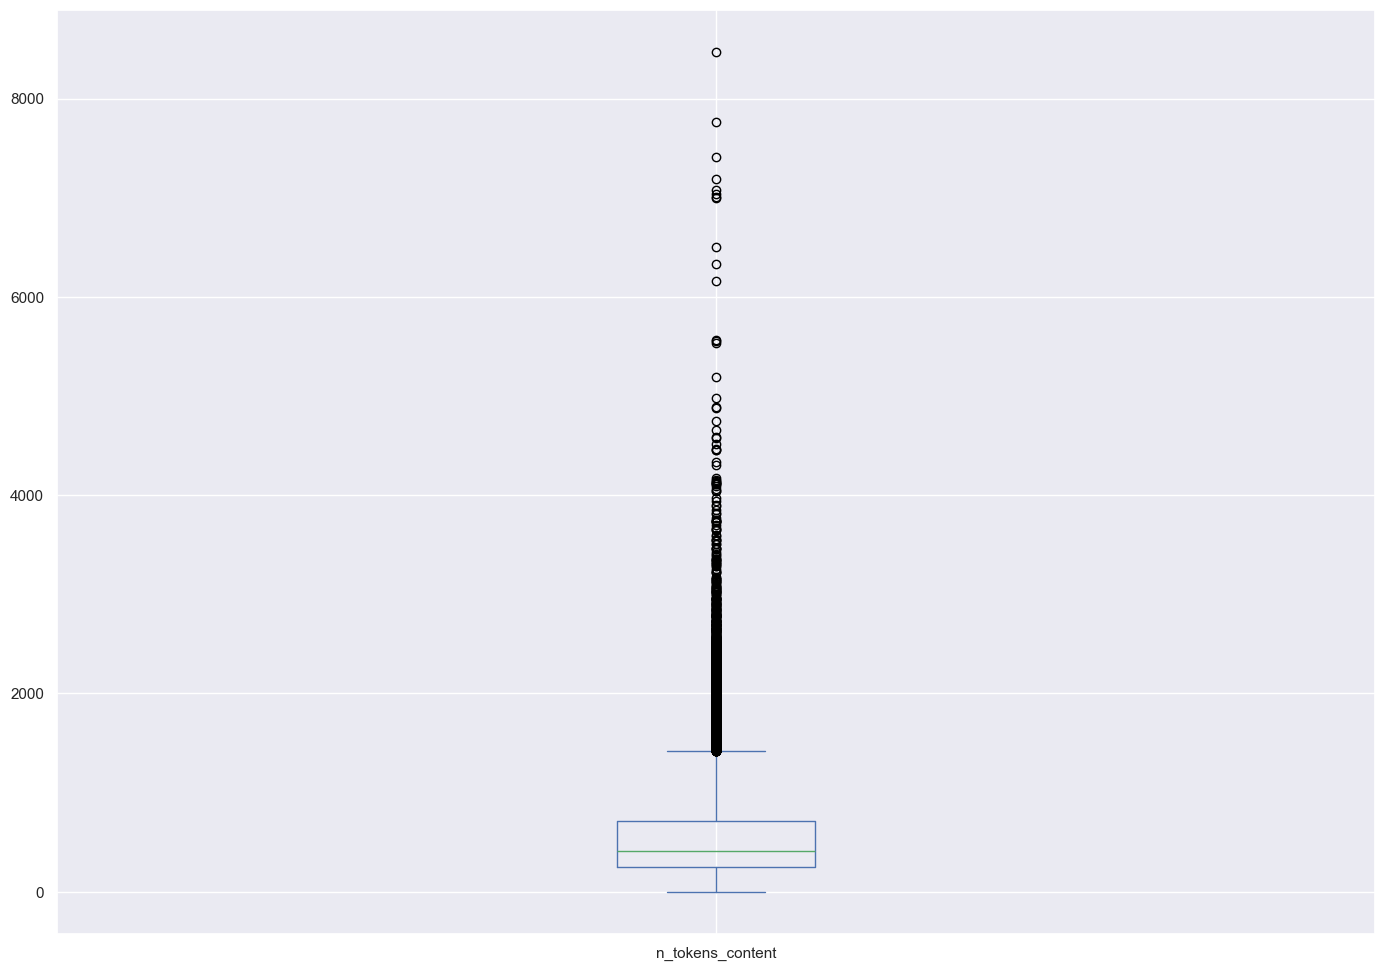

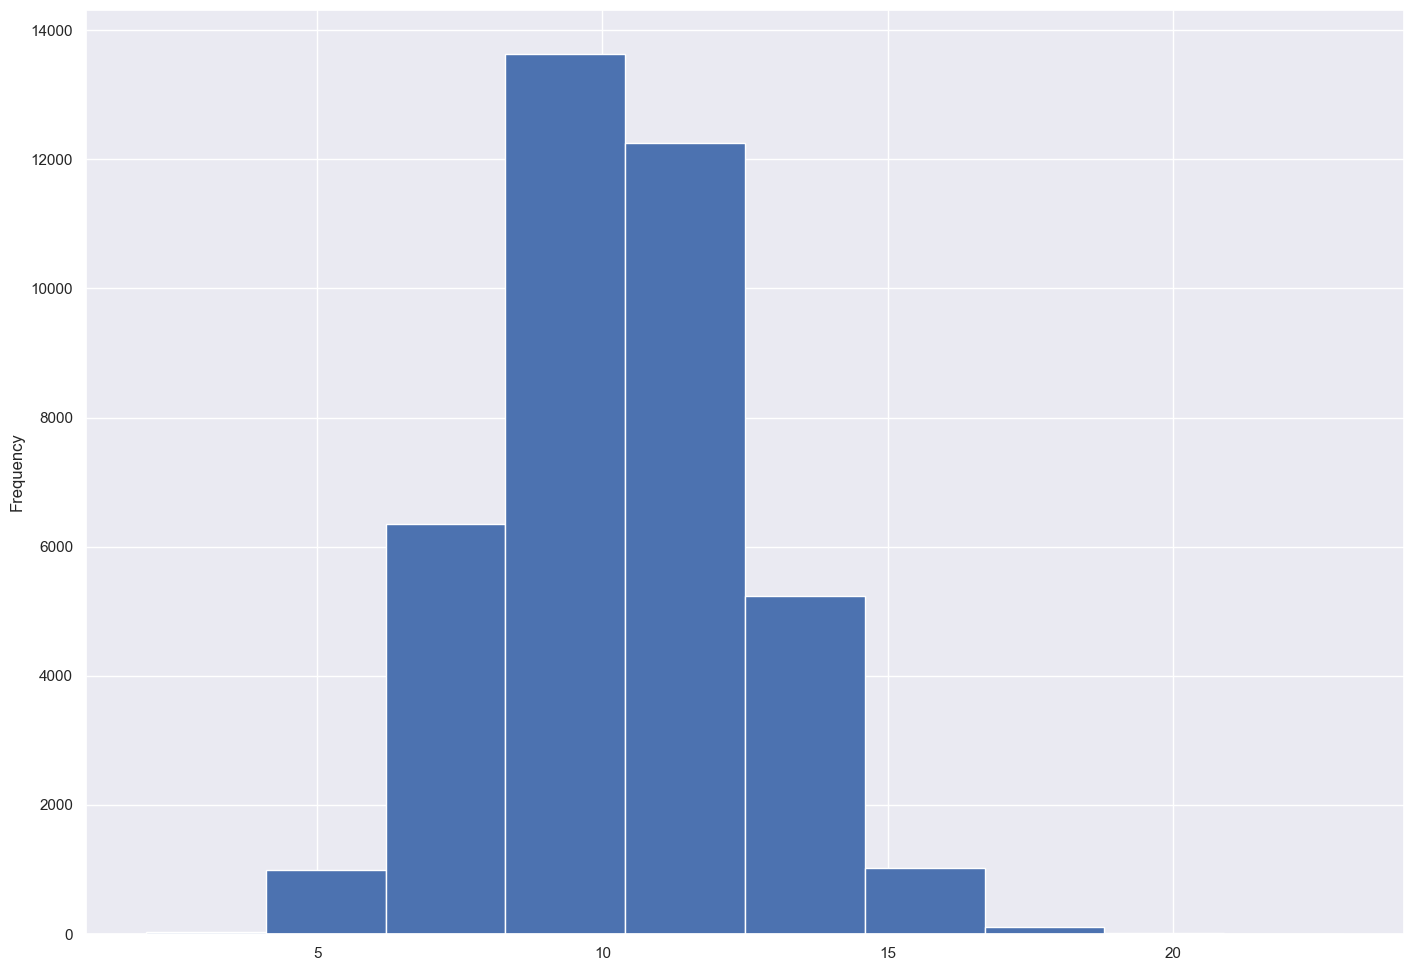

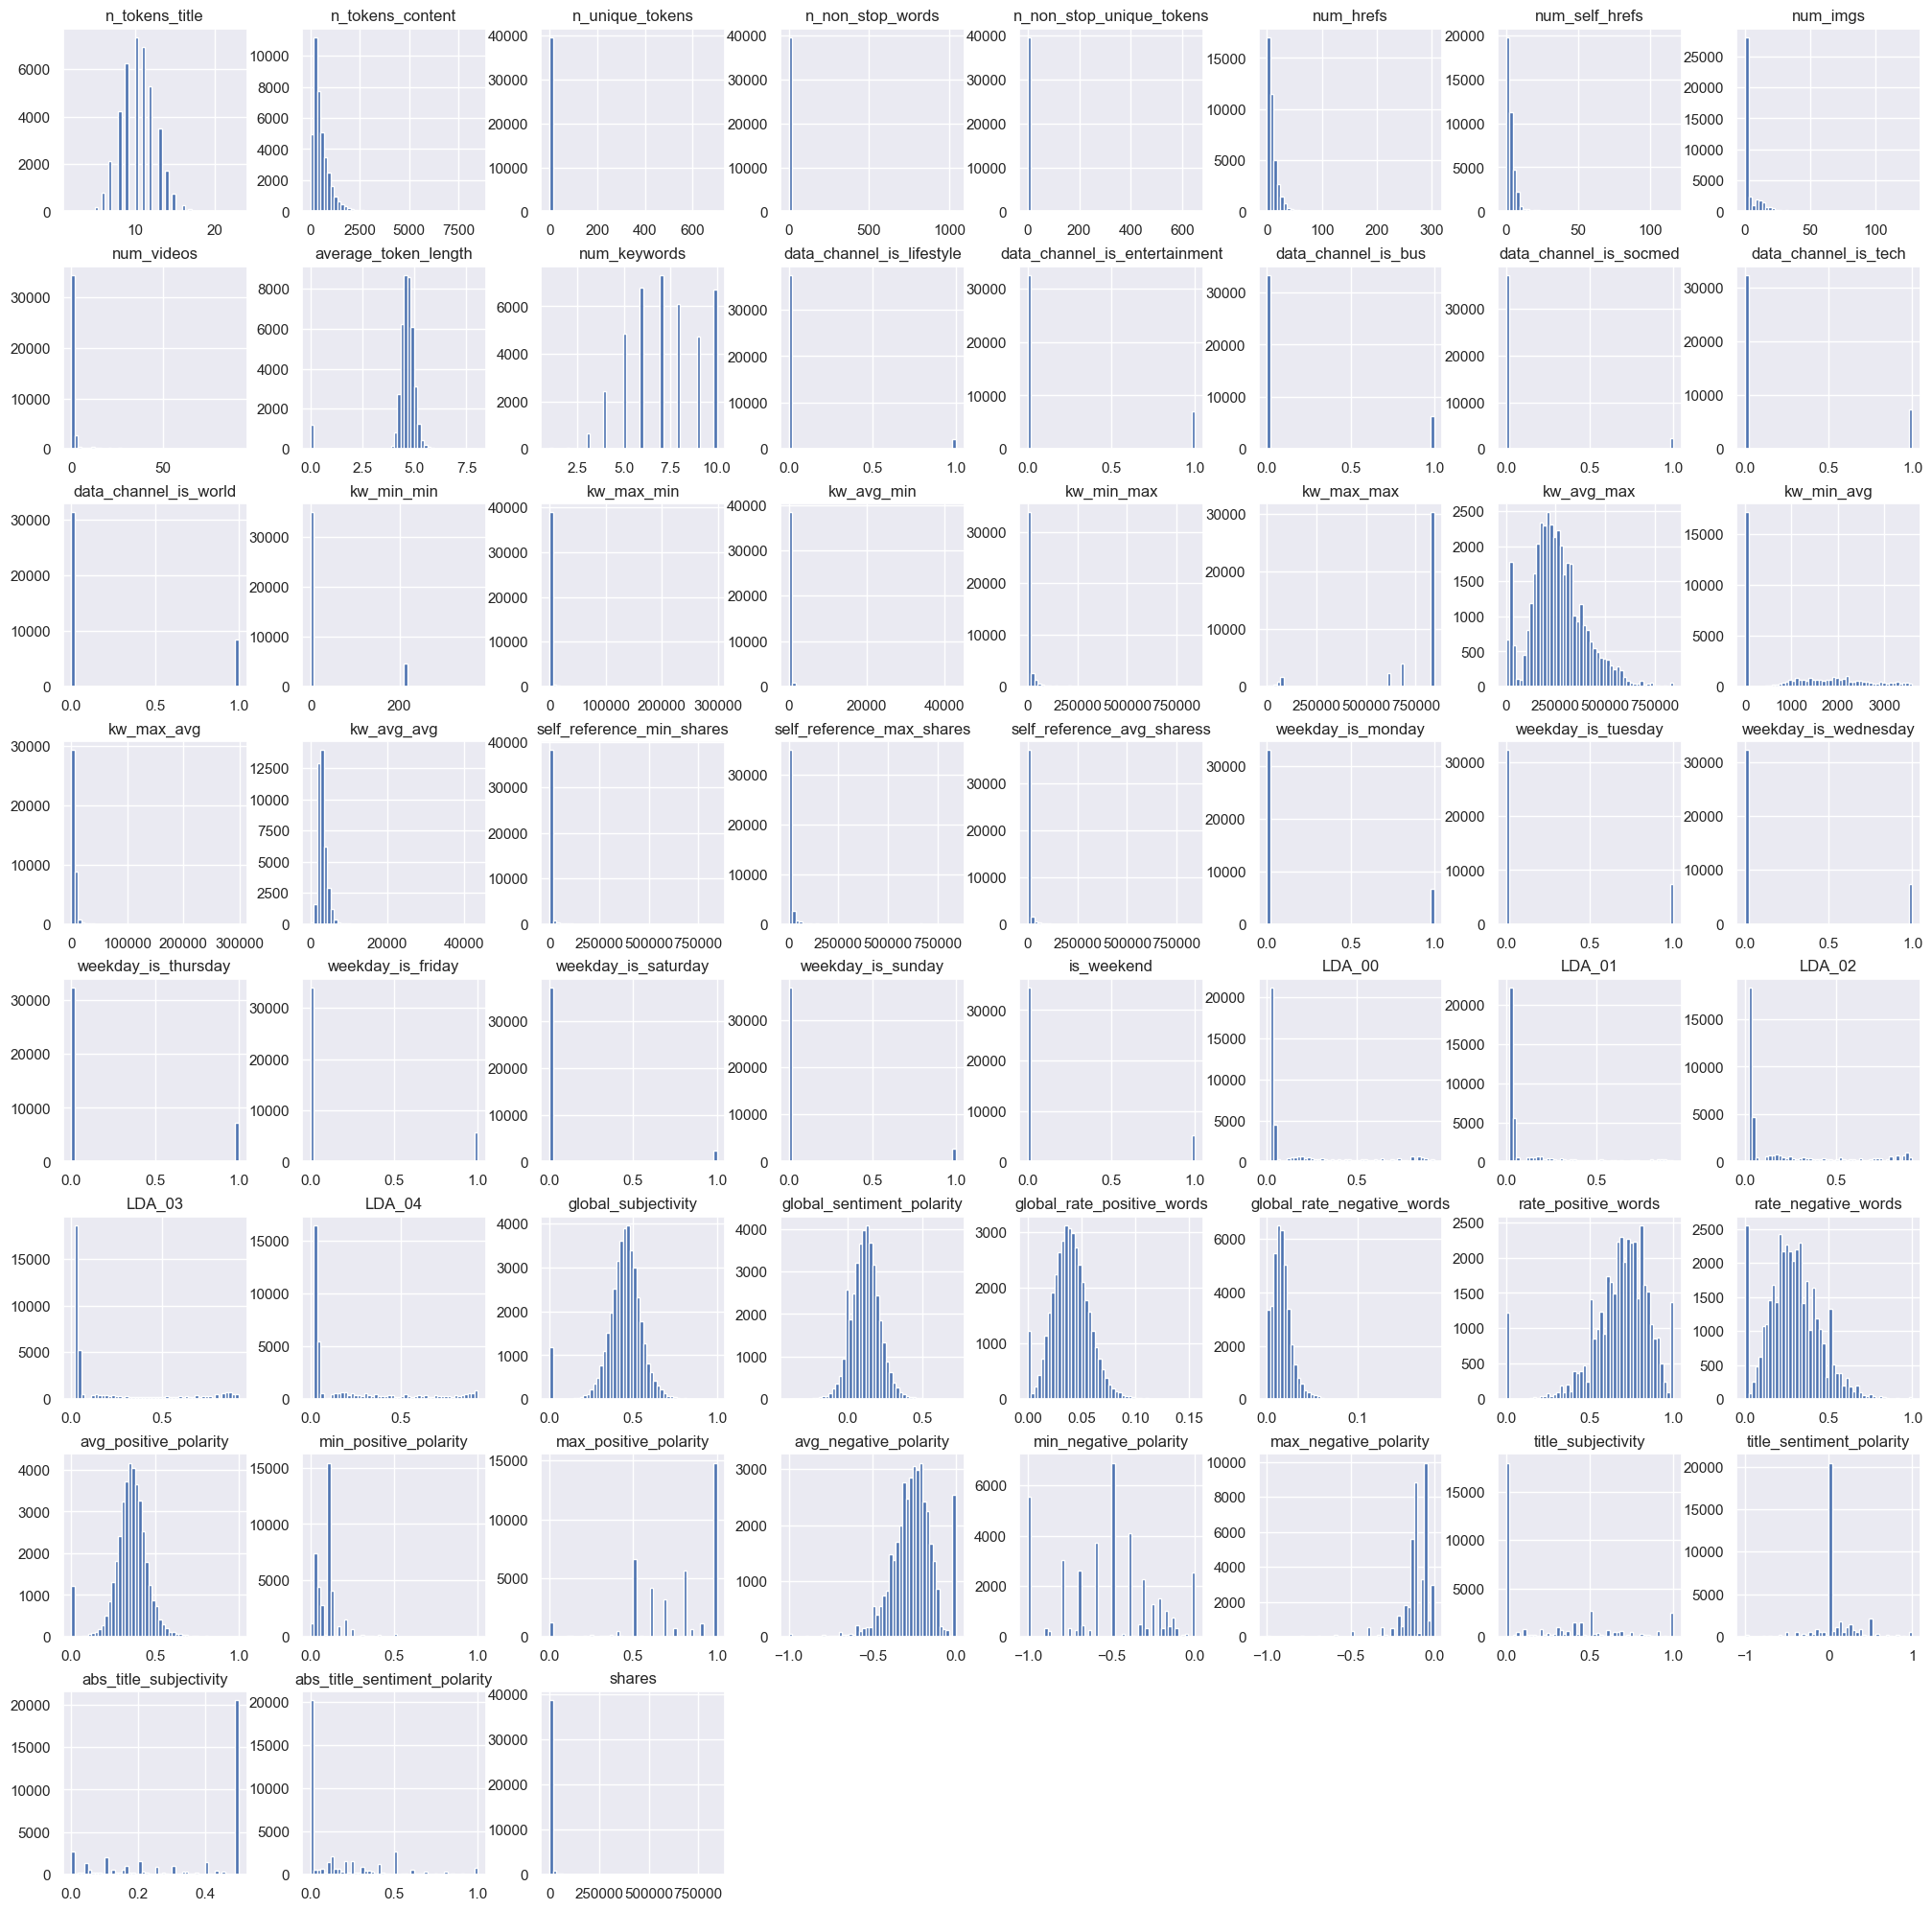

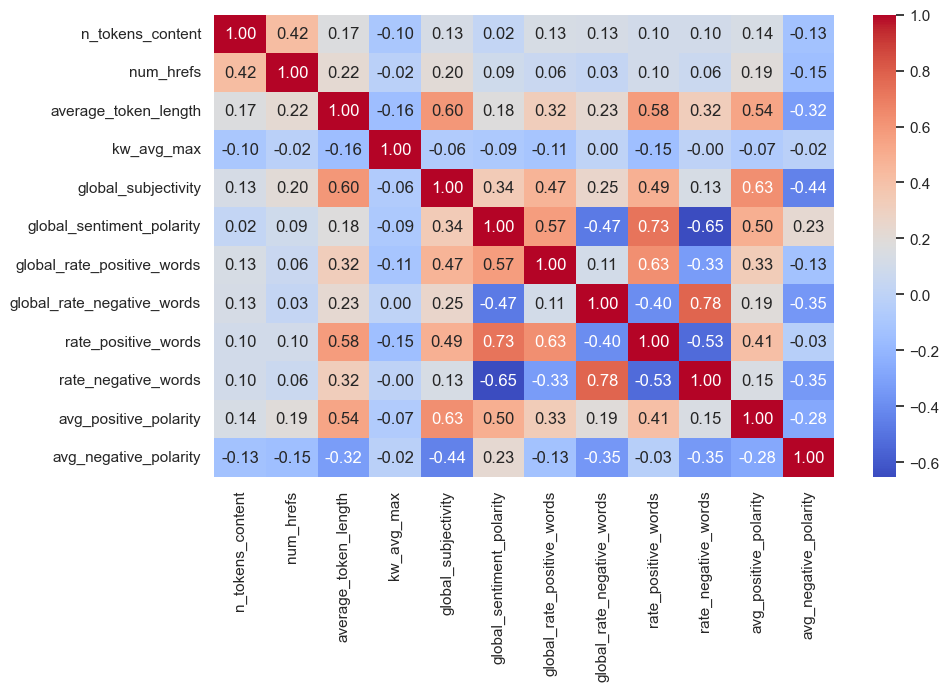

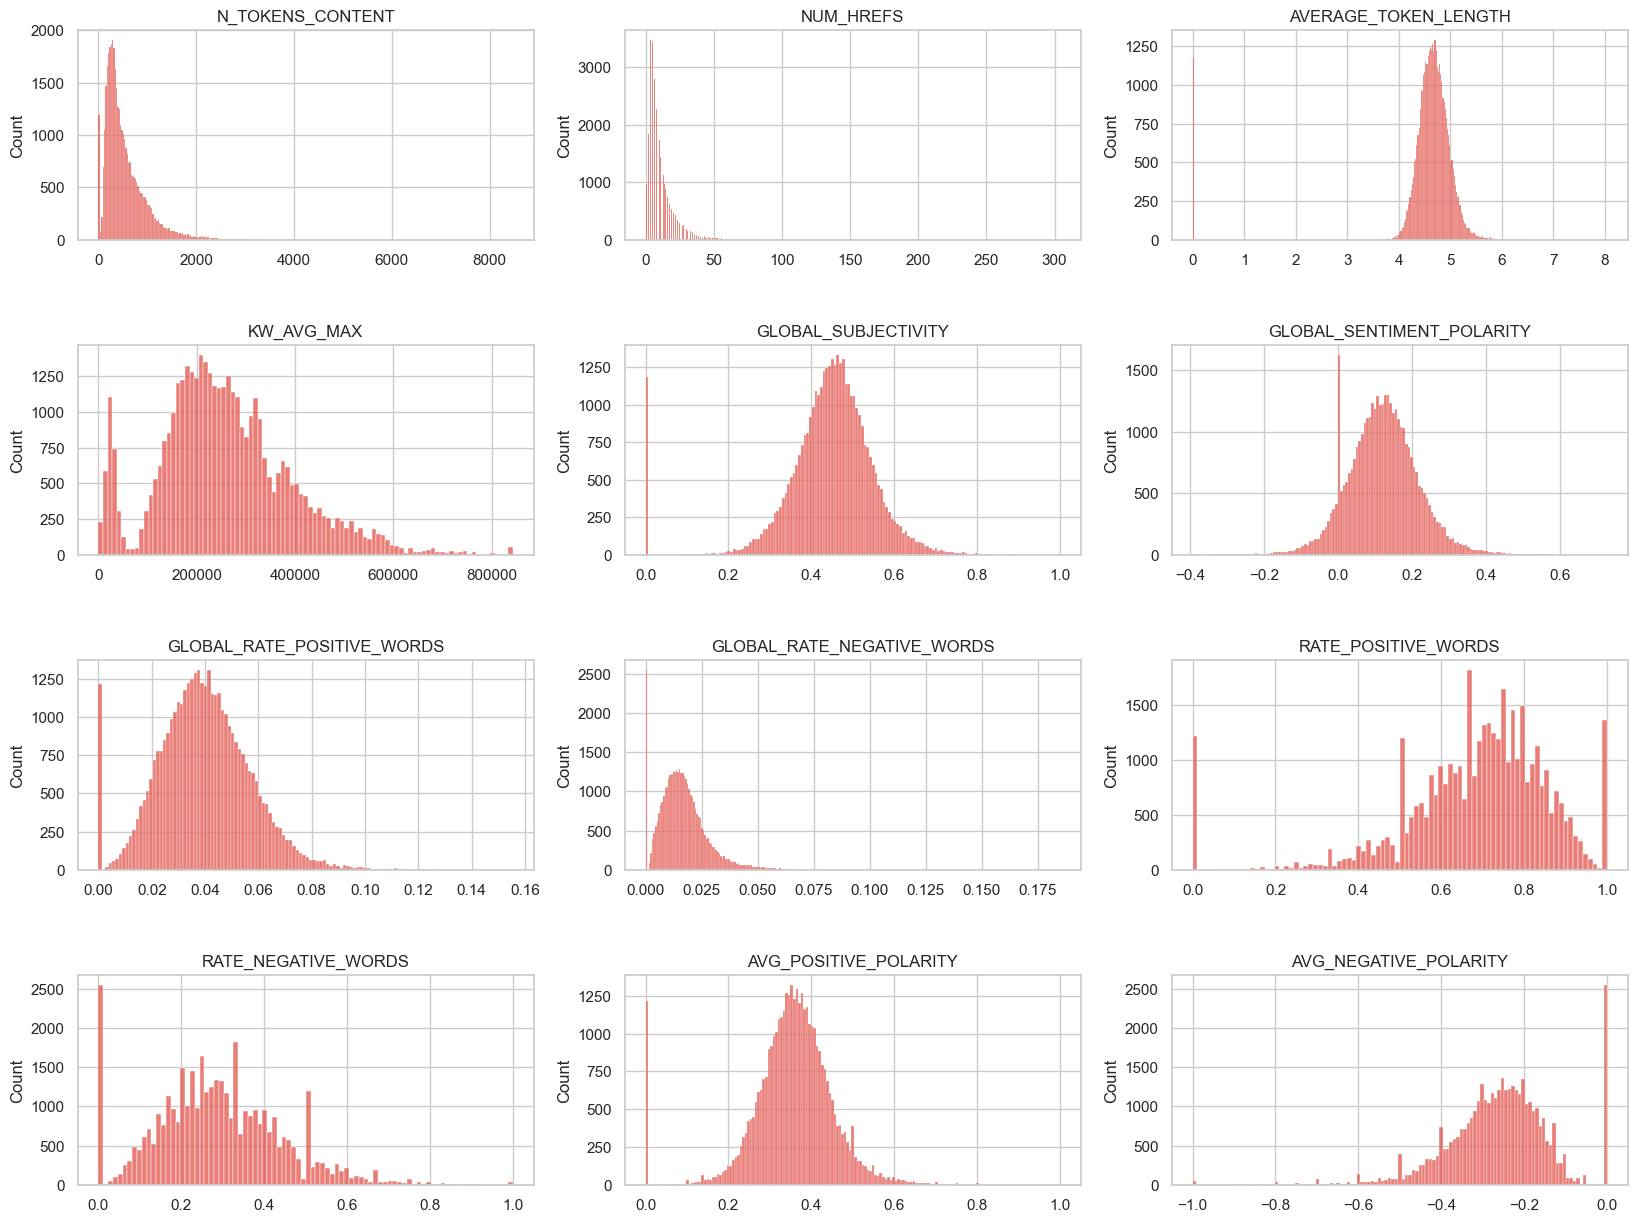

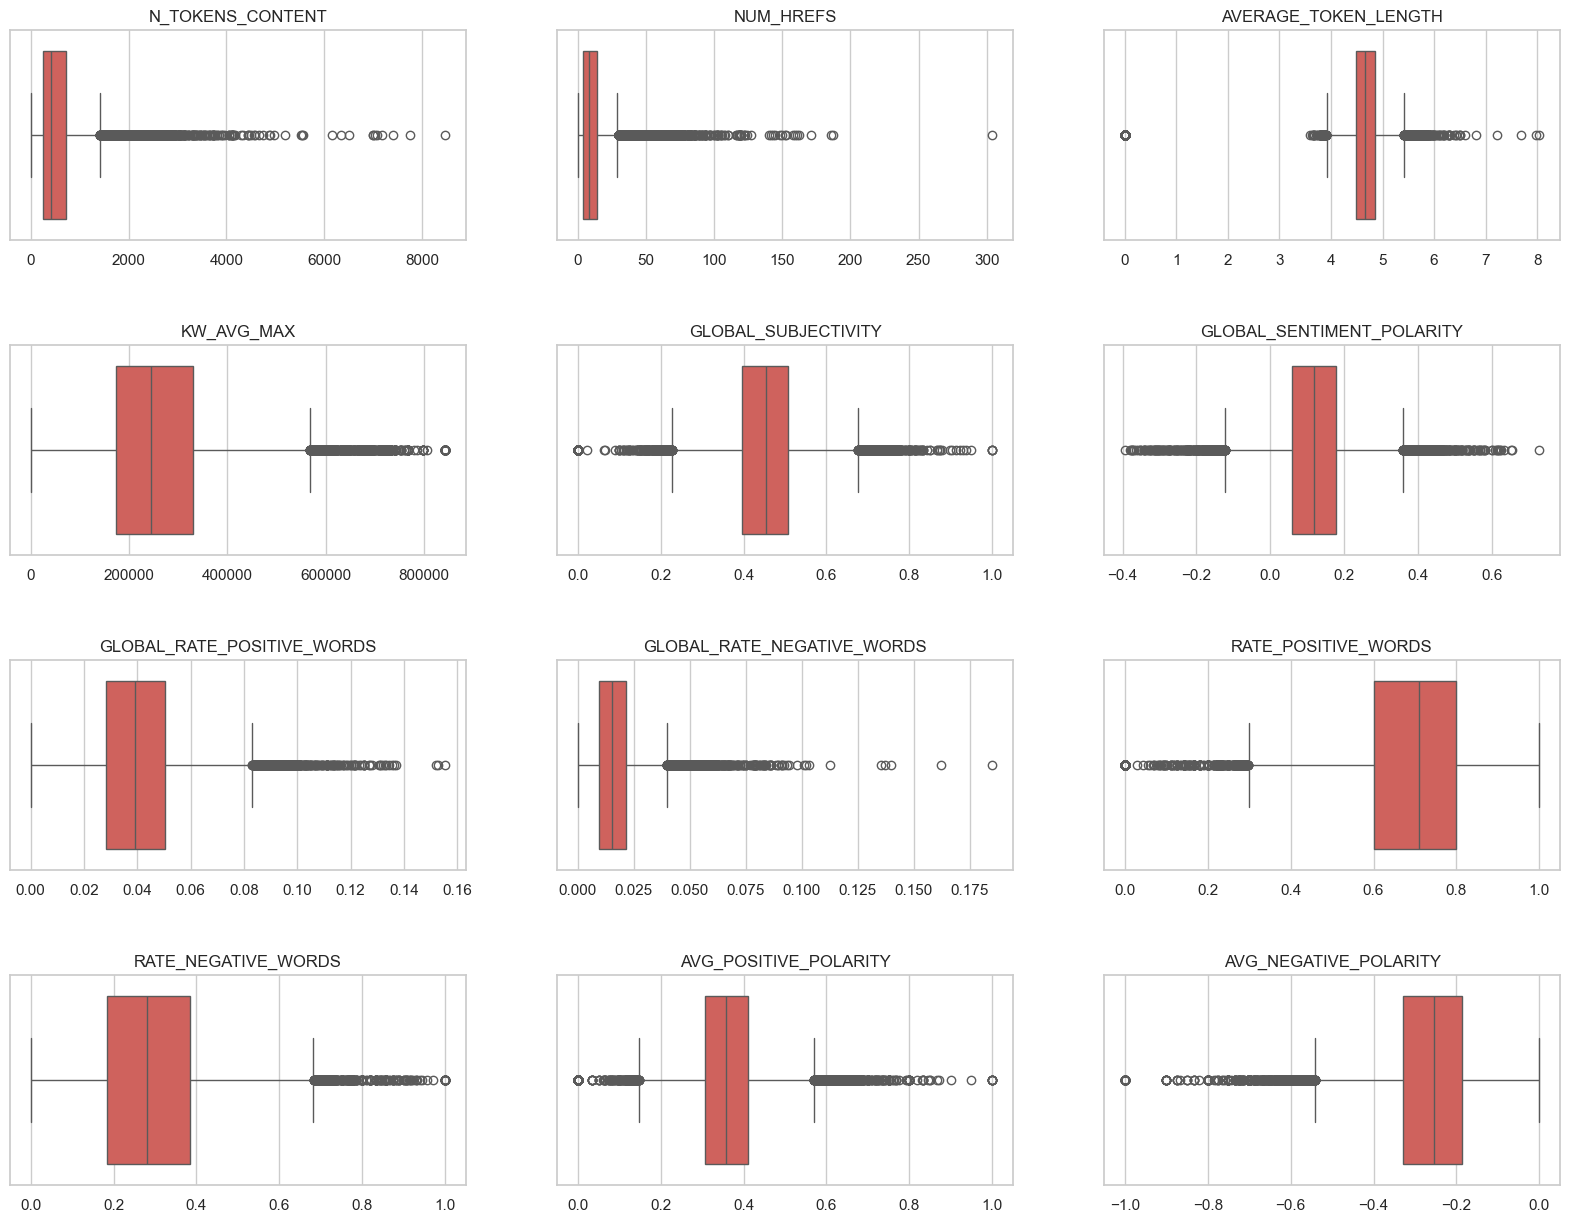

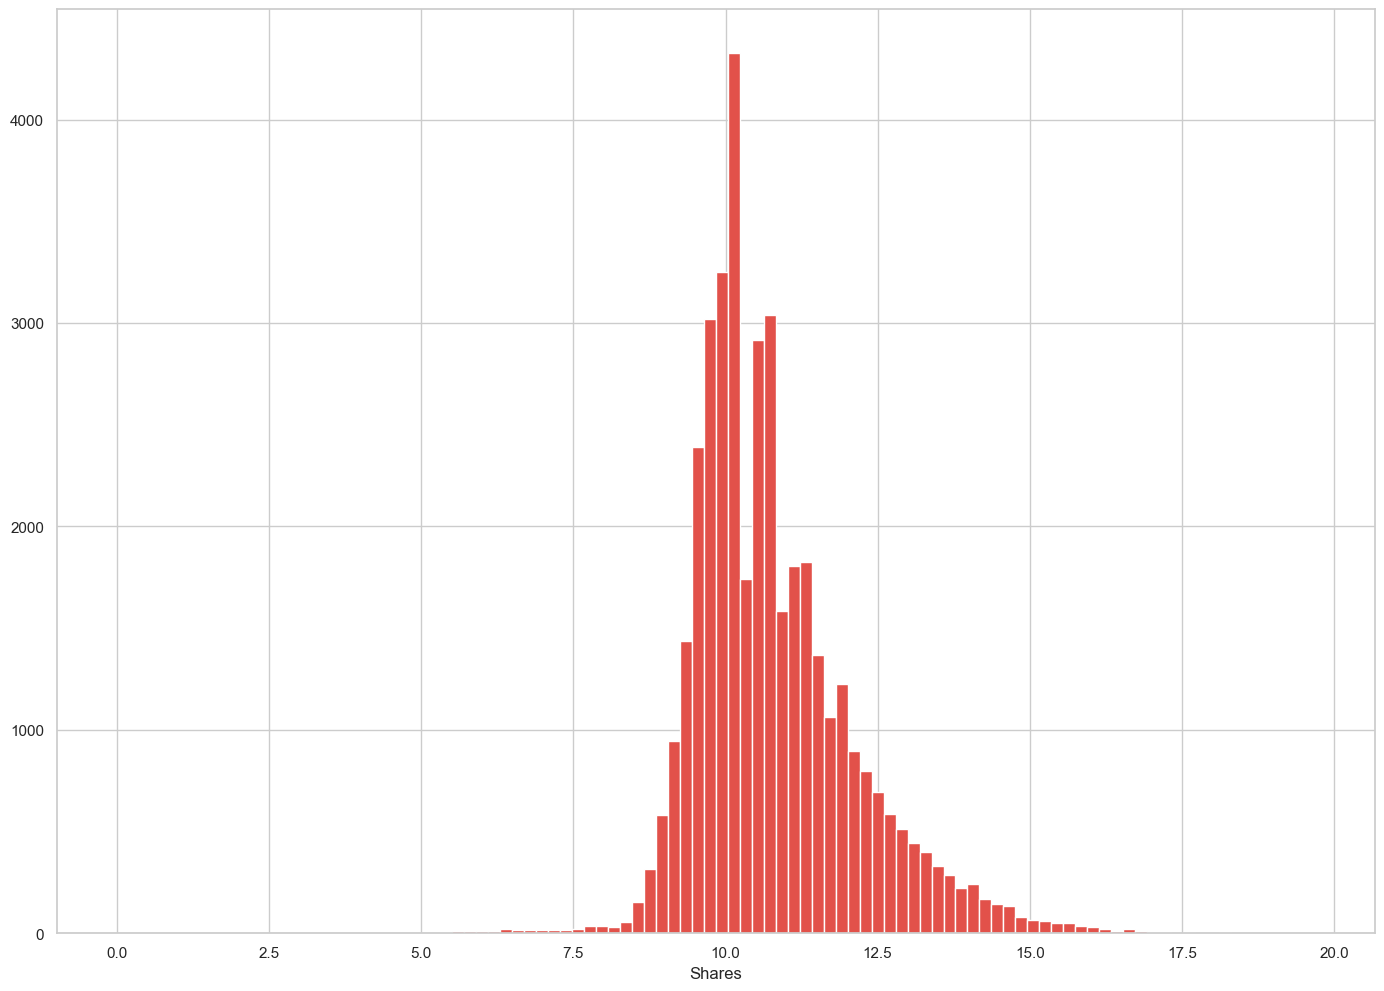

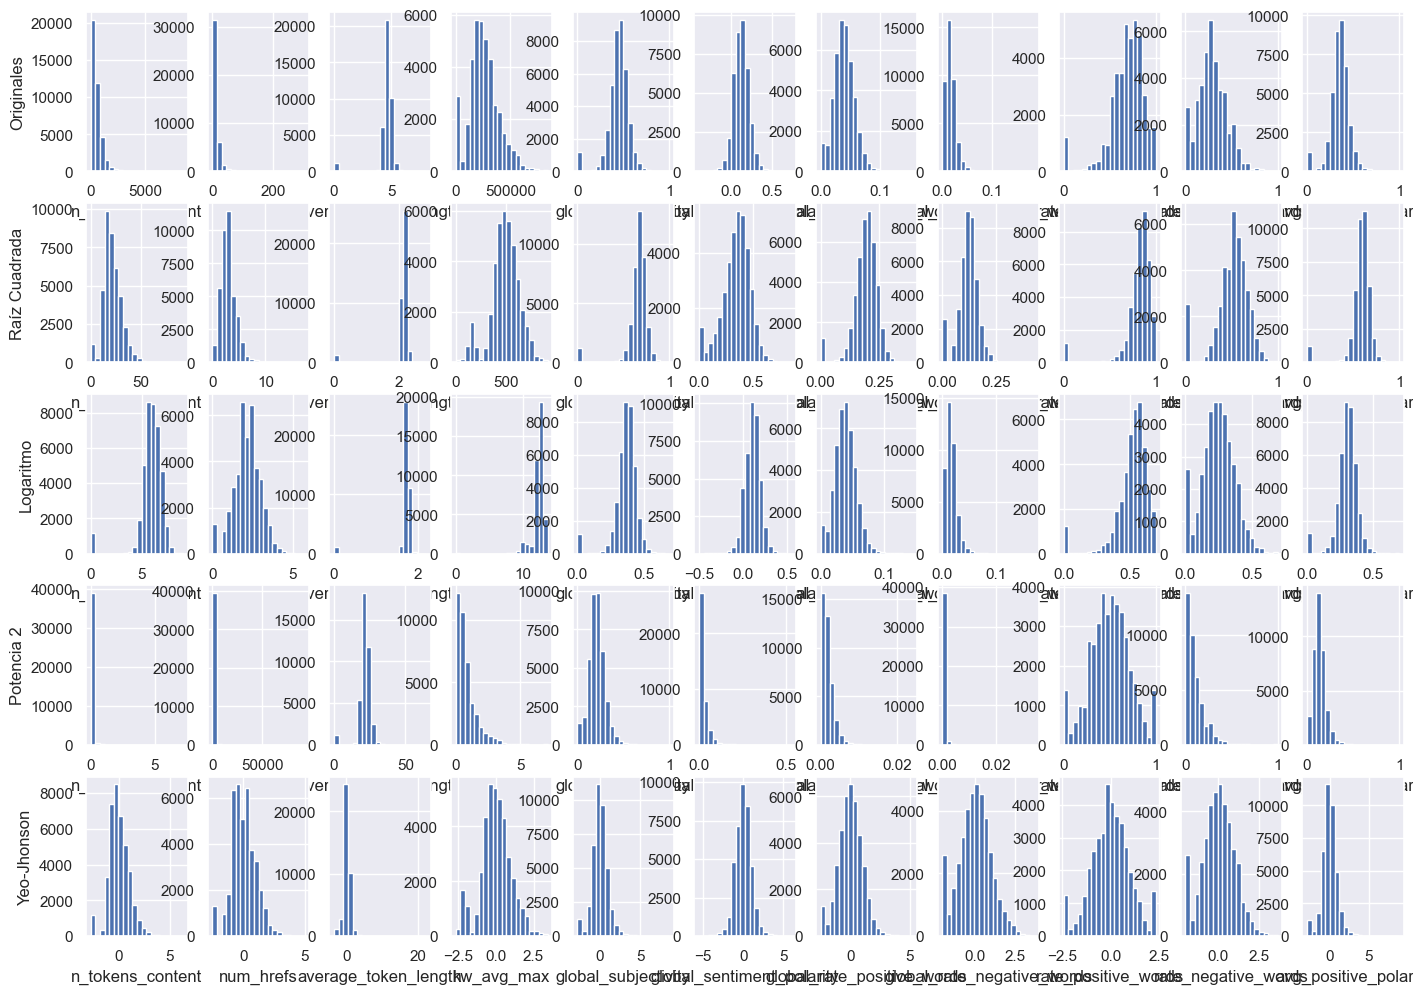

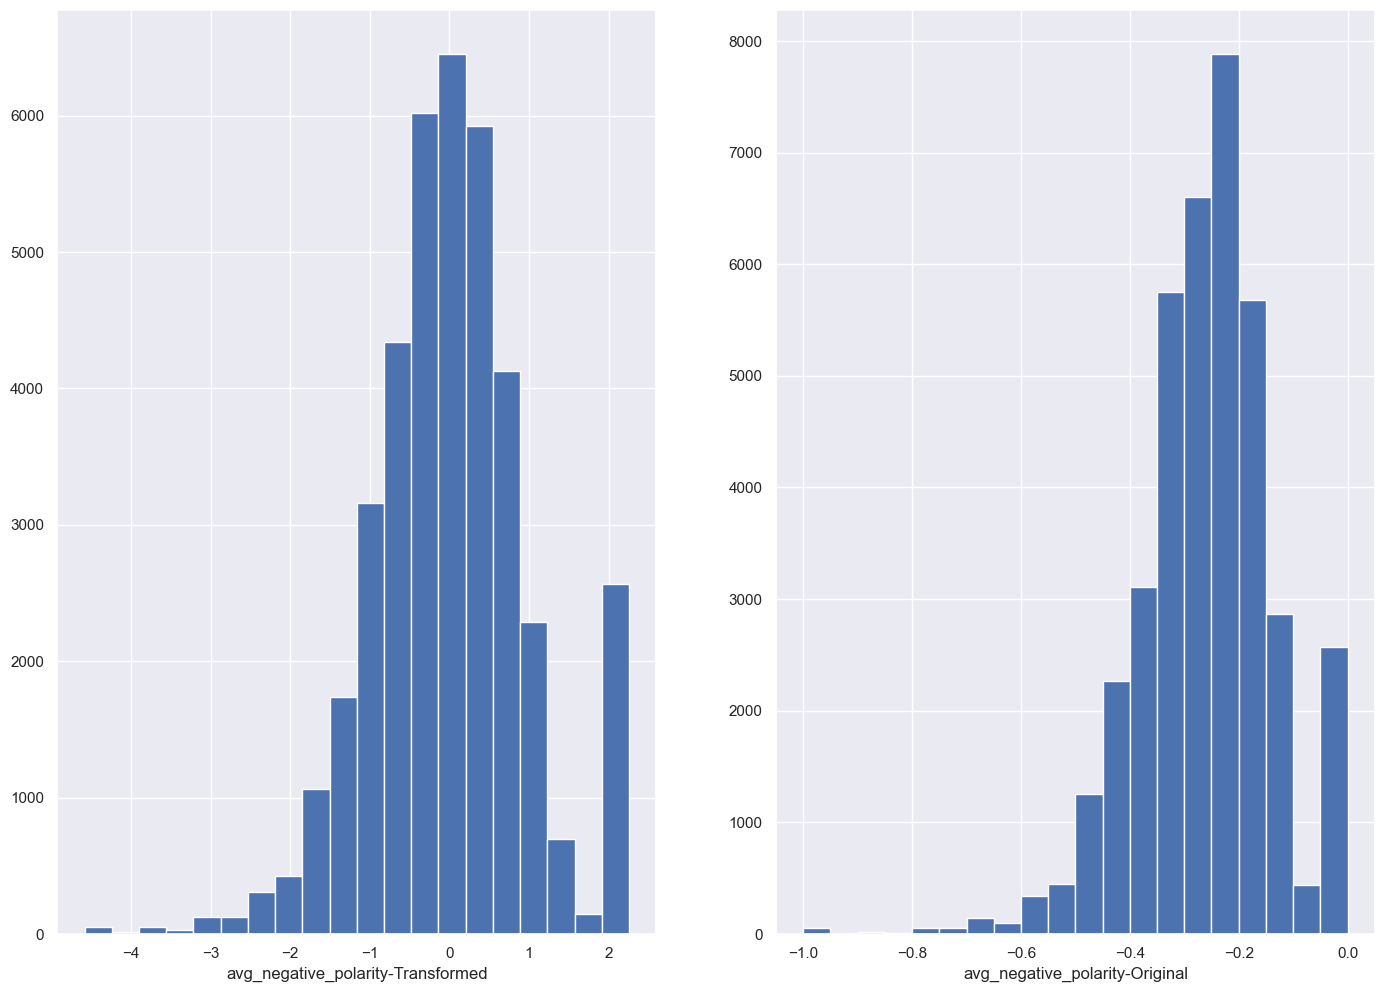

.                                                                                           [100%]
======================================== warnings summary =========================================
t_7c4356fa71084d429dad4eab33768fa0.py::test_input_data_ranges
t_7c4356fa71084d429dad4eab33768fa0.py::test_input_data_ranges
t_7c4356fa71084d429dad4eab33768fa0.py::test_input_data_ranges
t_7c4356fa71084d429dad4eab33768fa0.py::test_input_data_ranges
t_7c4356fa71084d429dad4eab33768fa0.py::test_input_data_types
t_7c4356fa71084d429dad4eab33768fa0.py::test_input_data_types
t_7c4356fa71084d429dad4eab33768fa0.py::test_input_data_types
t_7c4356fa71084d429dad4eab33768fa0.py::test_input_data_types
  C:\Users\balde\anaconda3\envs\tf_nowdays\Lib\site-packages\jupyter_client\session.py:201: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
    return dat

In [50]:
%%ipytest

def test_input_data_ranges(pipeline):
    # Getting the maximum and minimum values for each column
    max_values = pipeline.X_train.max()
    min_values = pipeline.X_train.min()
    
    # Ensuring that the maximum and minimum values fall into the expected range
    for feature in list(pipeline.X_train.columns):
        assert max_values[feature] <= dict_schema[feature]['range']['max']
        print('------------MAX VALUE TEST PASSED--------------')
        assert min_values[feature] >= dict_schema[feature]['range']['min']
        print('------------MIN VALUE TEST PASSED--------------')


def test_input_data_types(pipeline):
    # Getting the data types from each column
    data_types = pipeline.X_train.dtypes
    
    # Testing compatibility between data types
    for feature in list(pipeline.X_train.columns):
        assert data_types[feature] == dict_schema[feature]['dtype']
        print('------------ VALUE TYPES TEST PASSED--------------')



### Testing Model RMS

In [53]:
@pytest.fixture
def pipelines():
    filepath=r'C:/Users/balde/Desktop/MAESTRIA MNA/Contribs/MLOPSGrupo3/data/raw/online_news_popularity.csv'
    model = OnlineShares(filepath)
    model.load_data()
    X_train_scaled, X_test_scaled, y_train, y_test = model.preprocess_data()
    print()
    print('Training------')
    model_reg = model.train_model(X_train_scaled, y_train)
    print(model_reg)
    print()
    print('Testing-------')
    model.evaluate_model(model_reg, X_test_scaled , y_test)
    print()
    print('Cross Validation -----')
    model.cross_validate_model()
    return model , model_reg

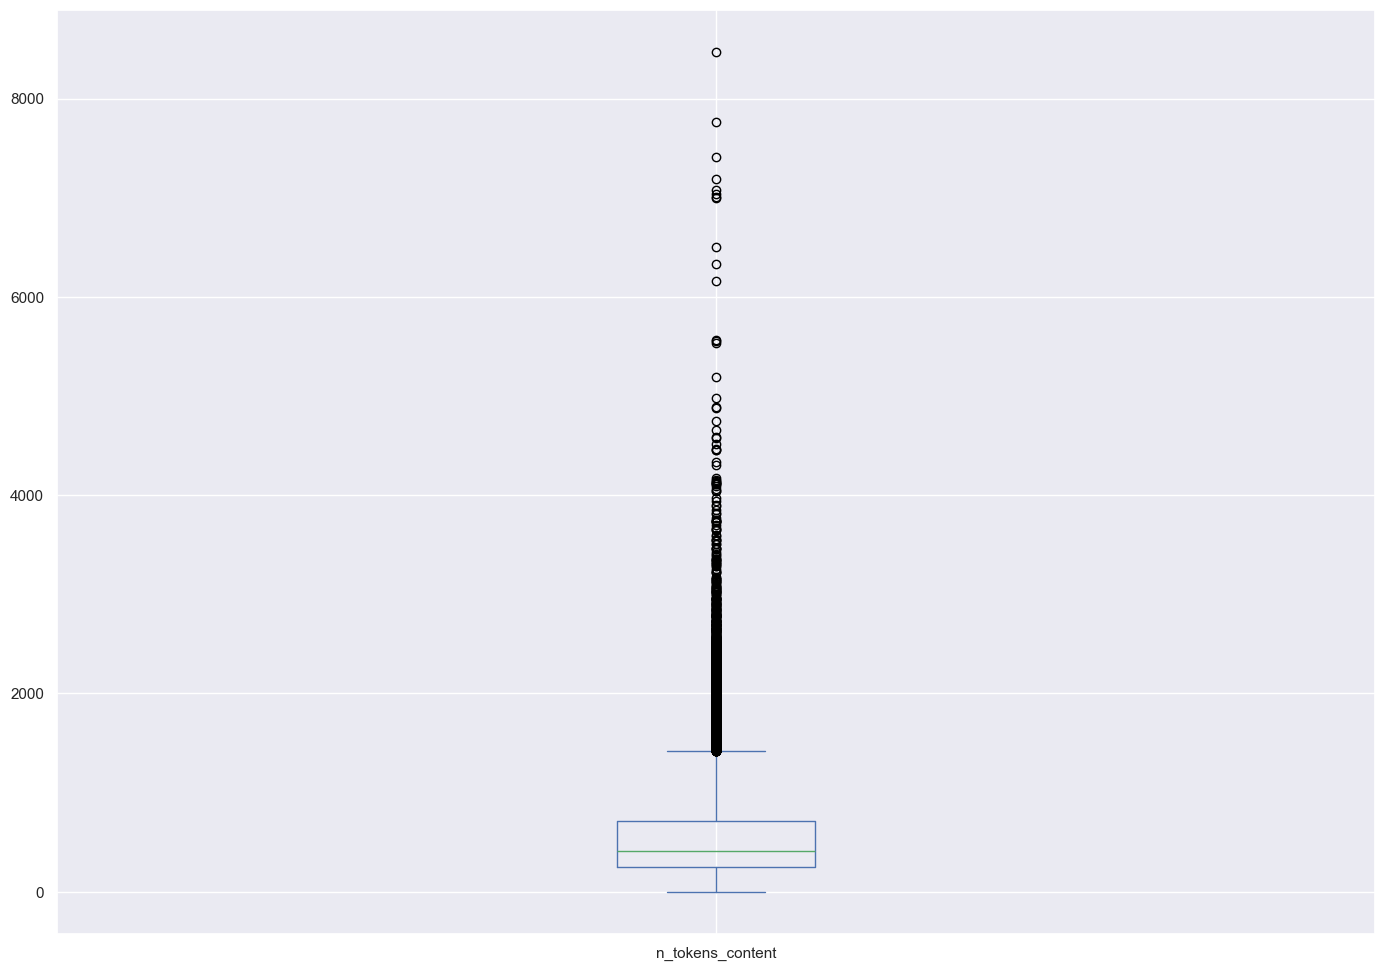

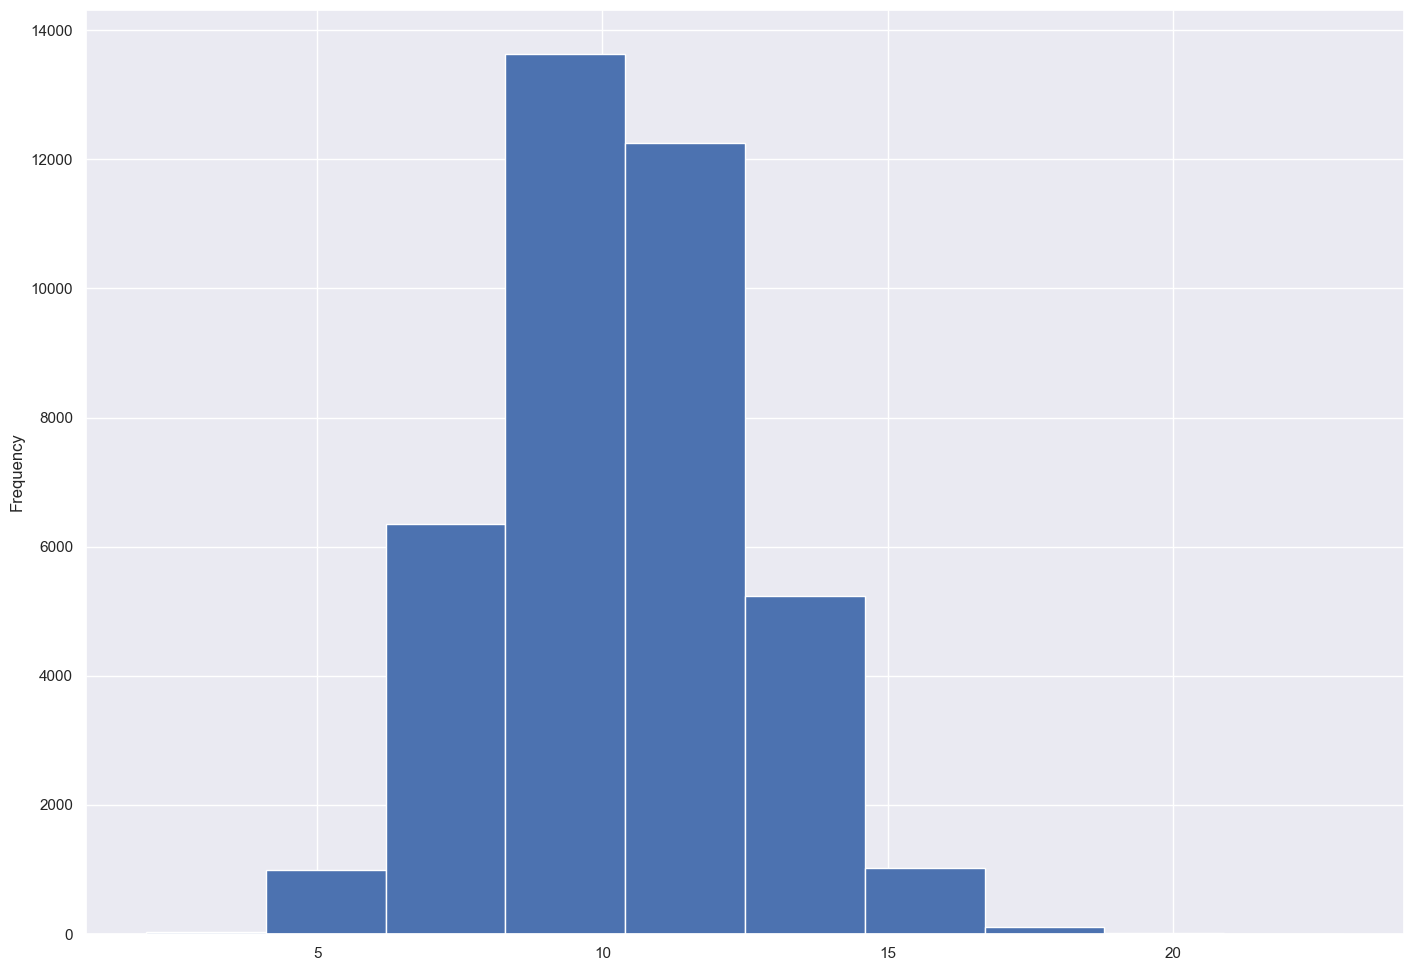

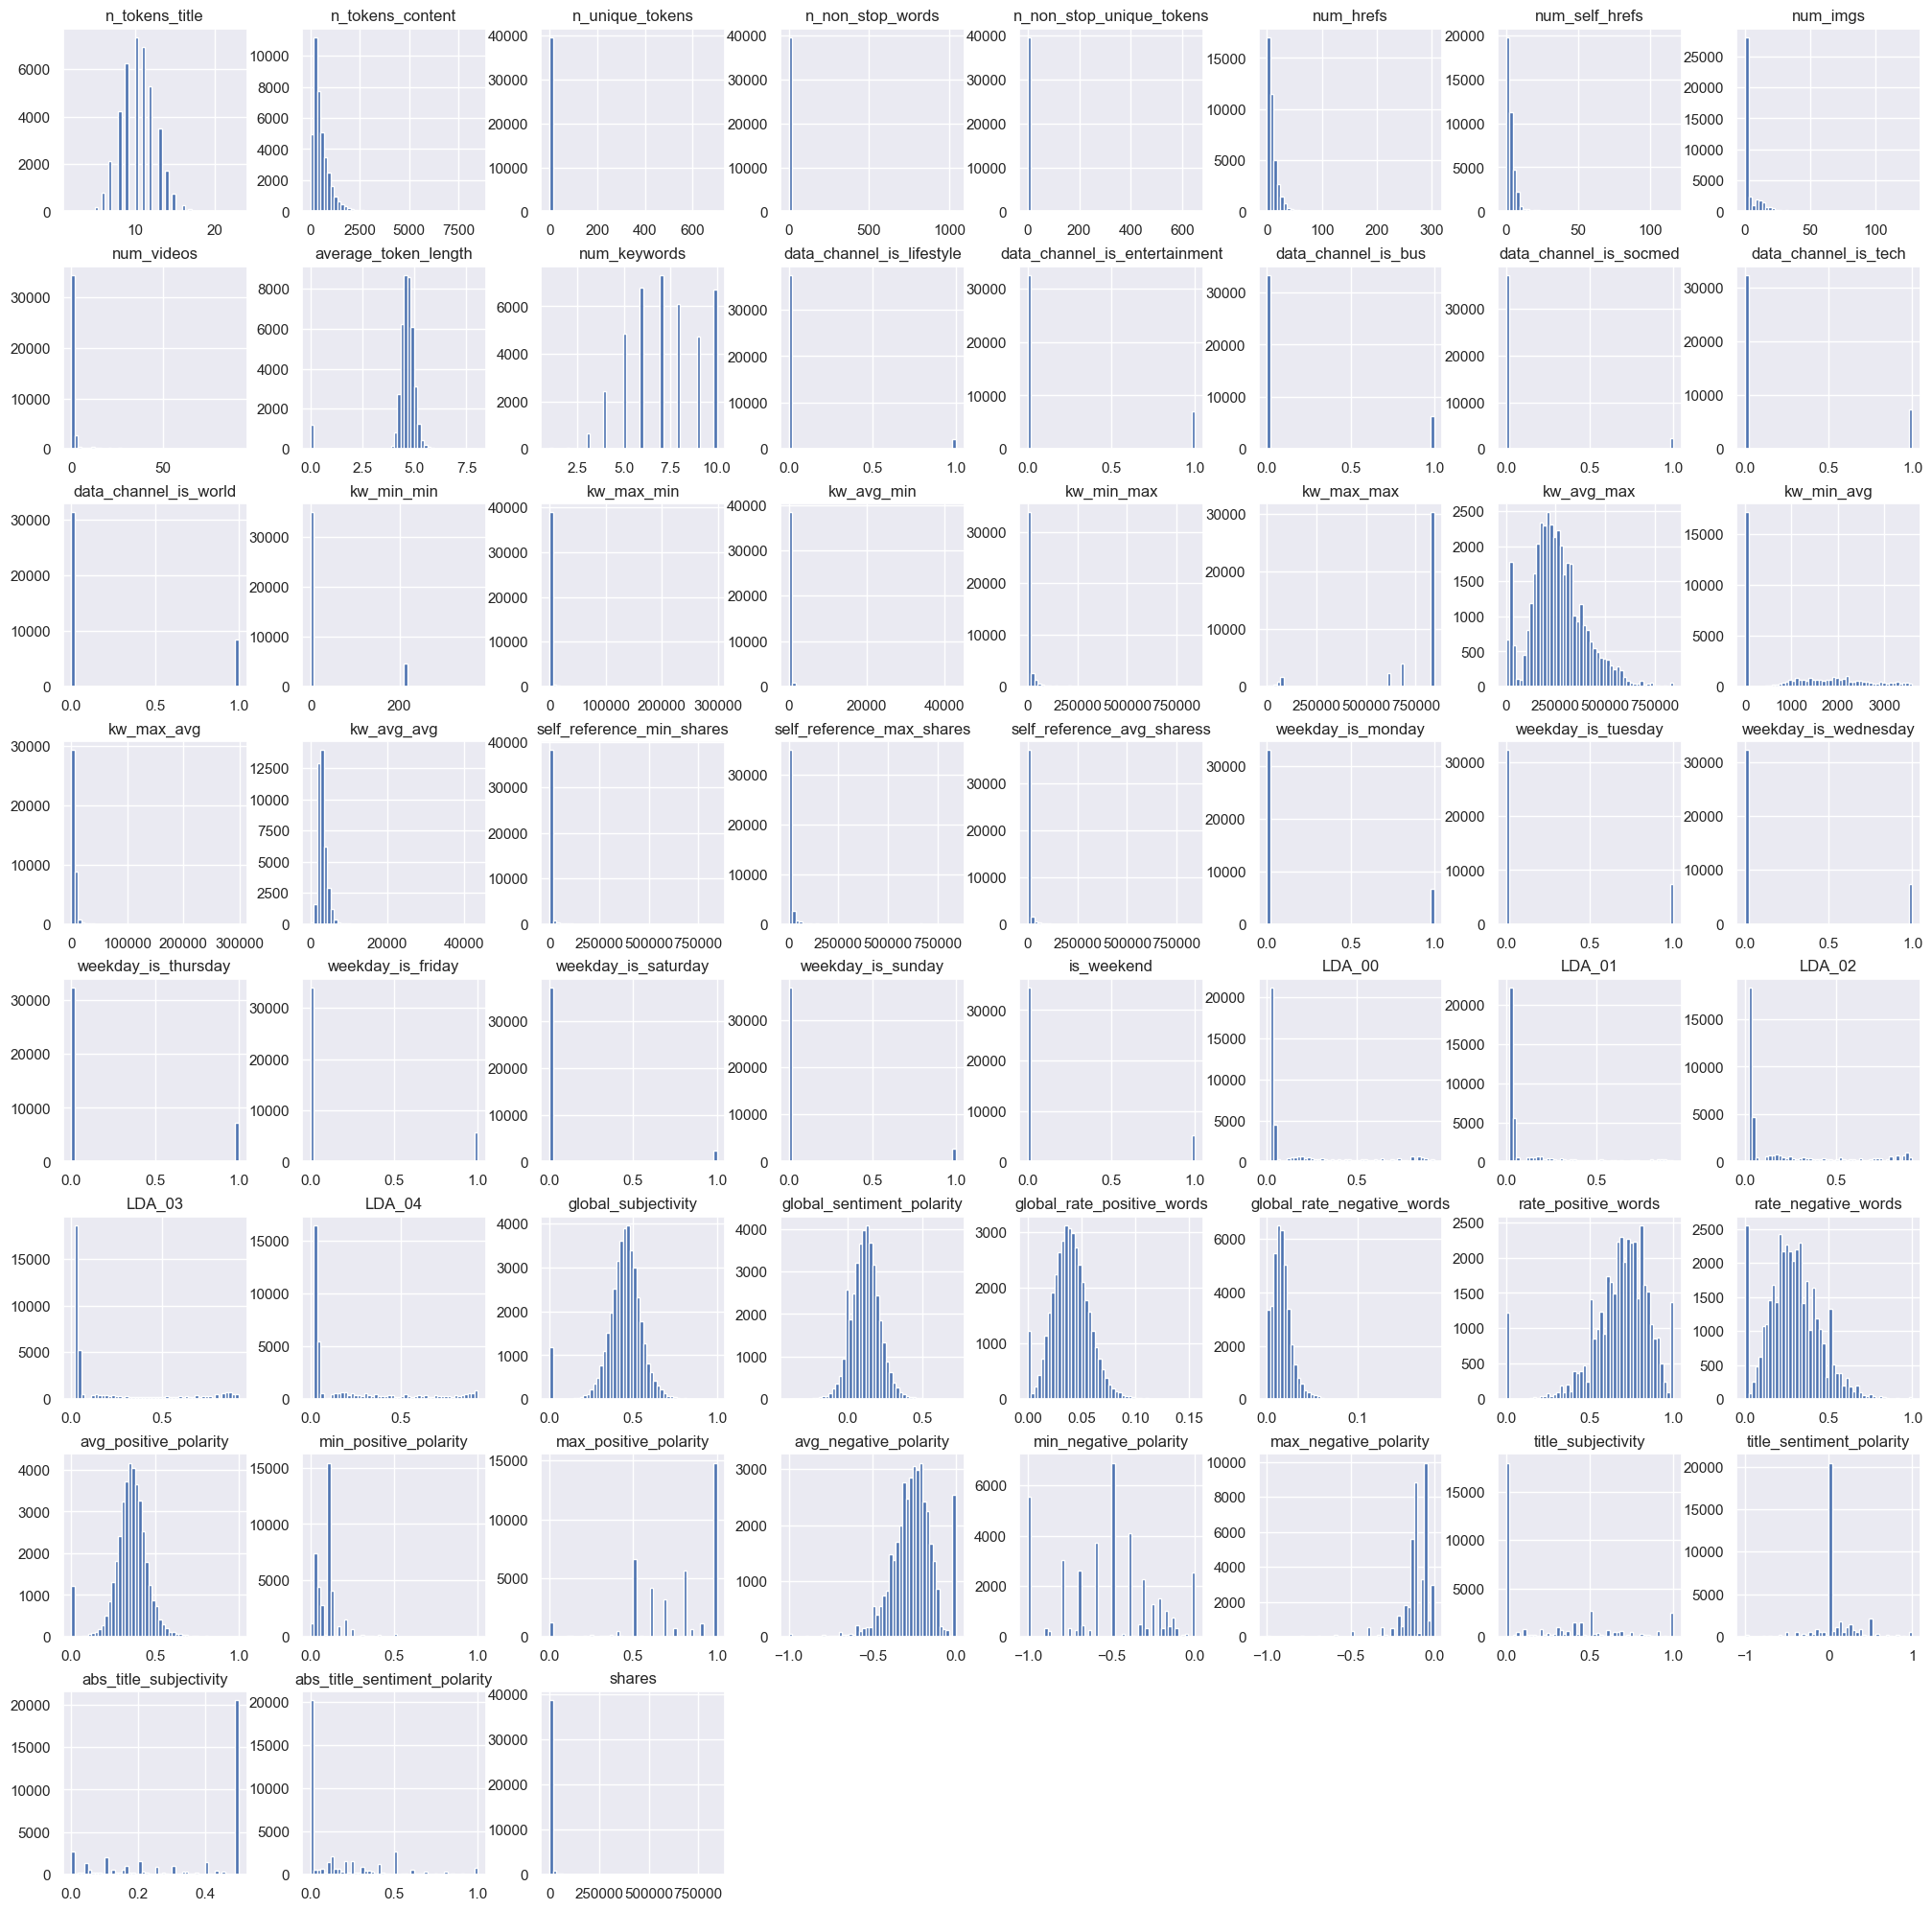

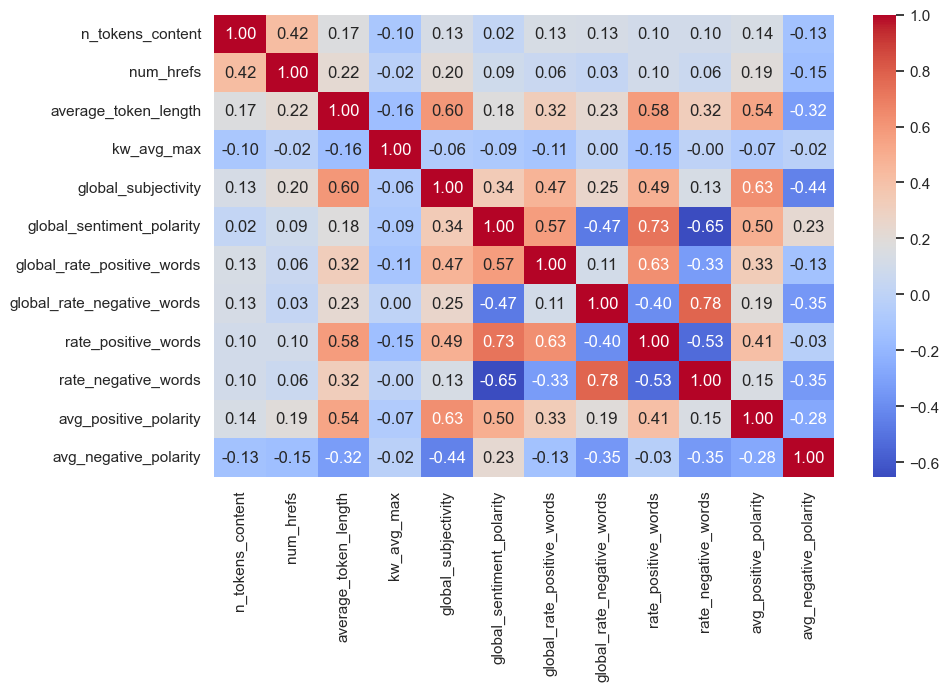

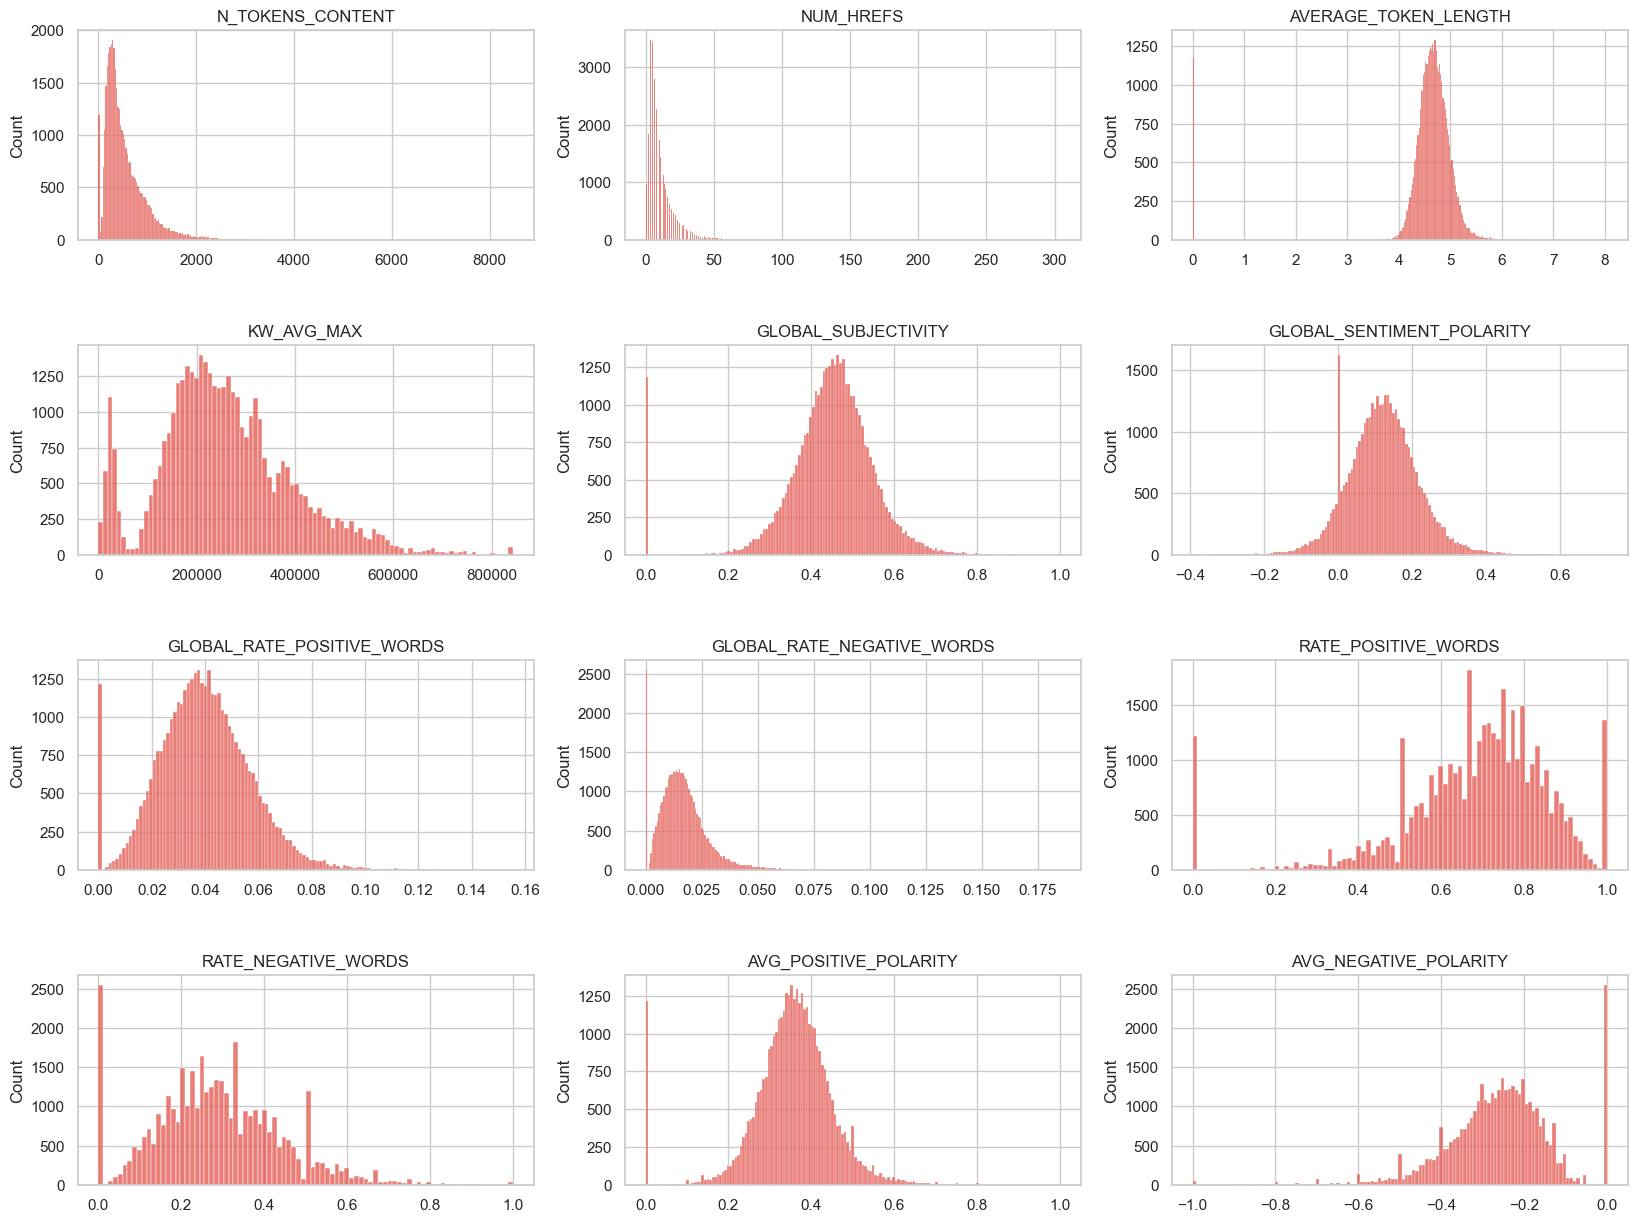

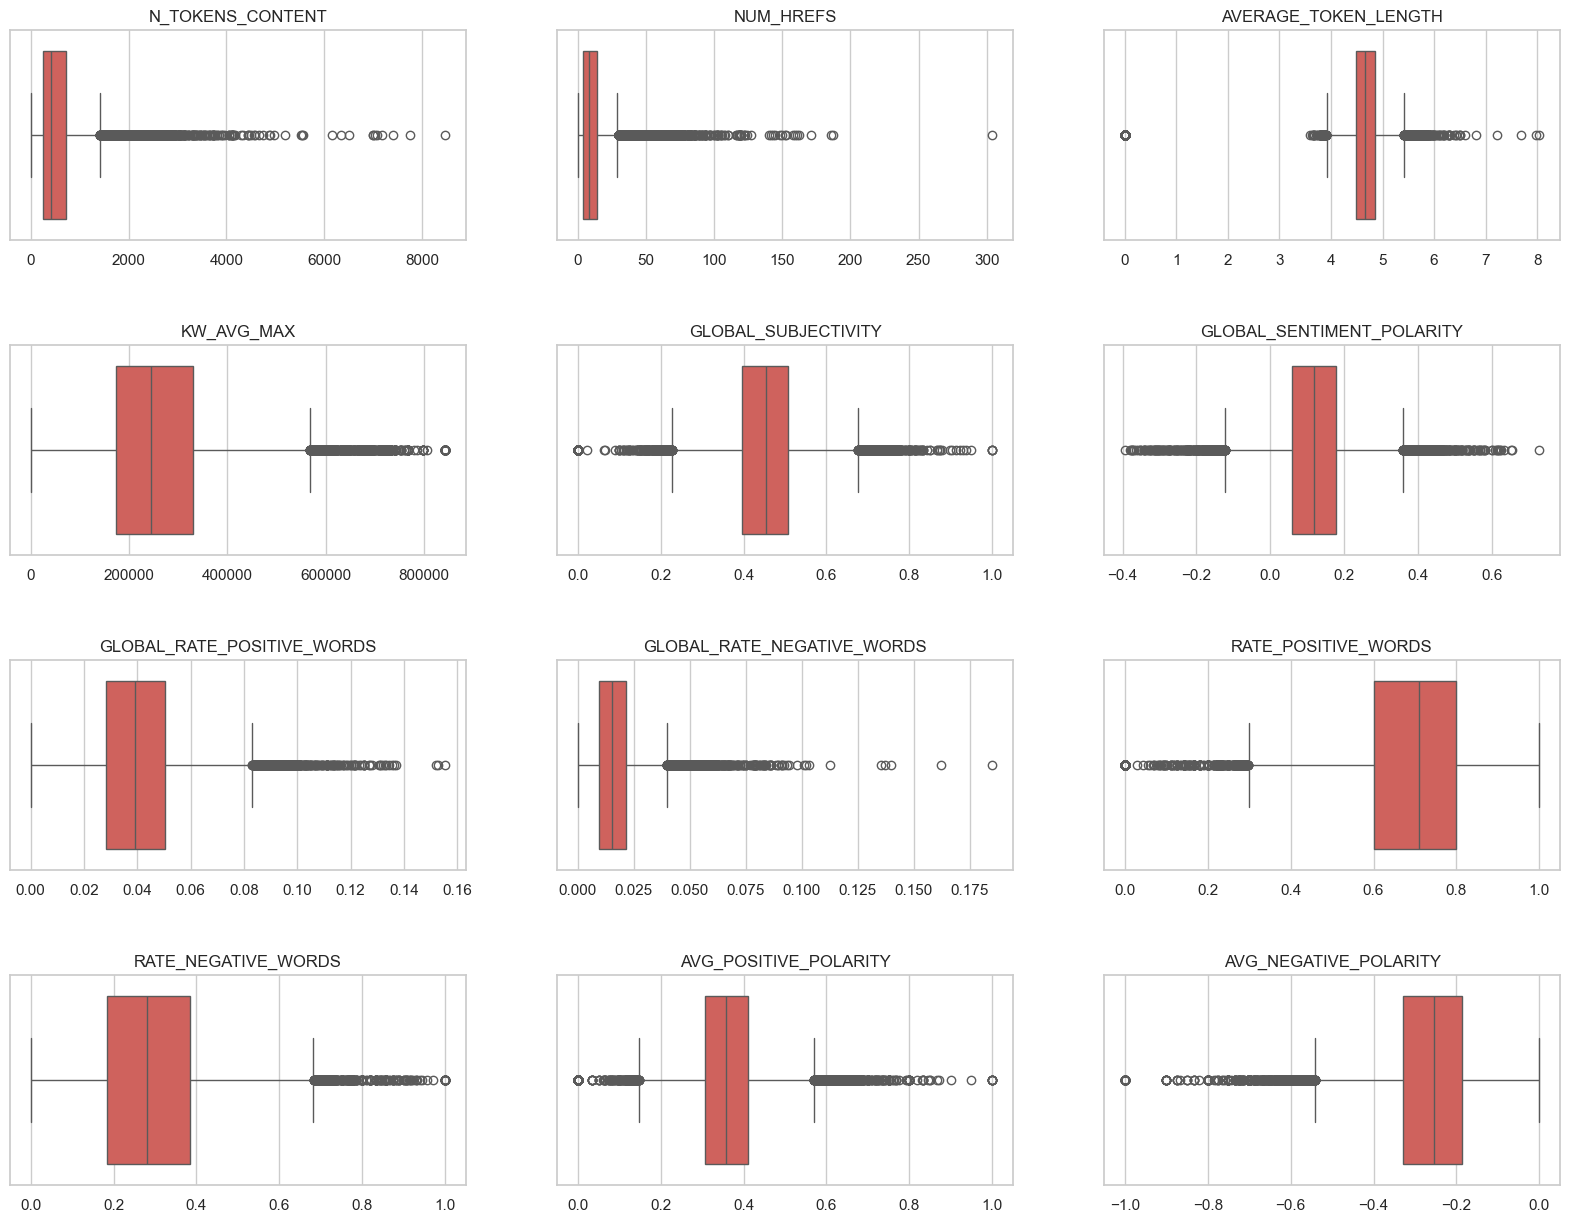

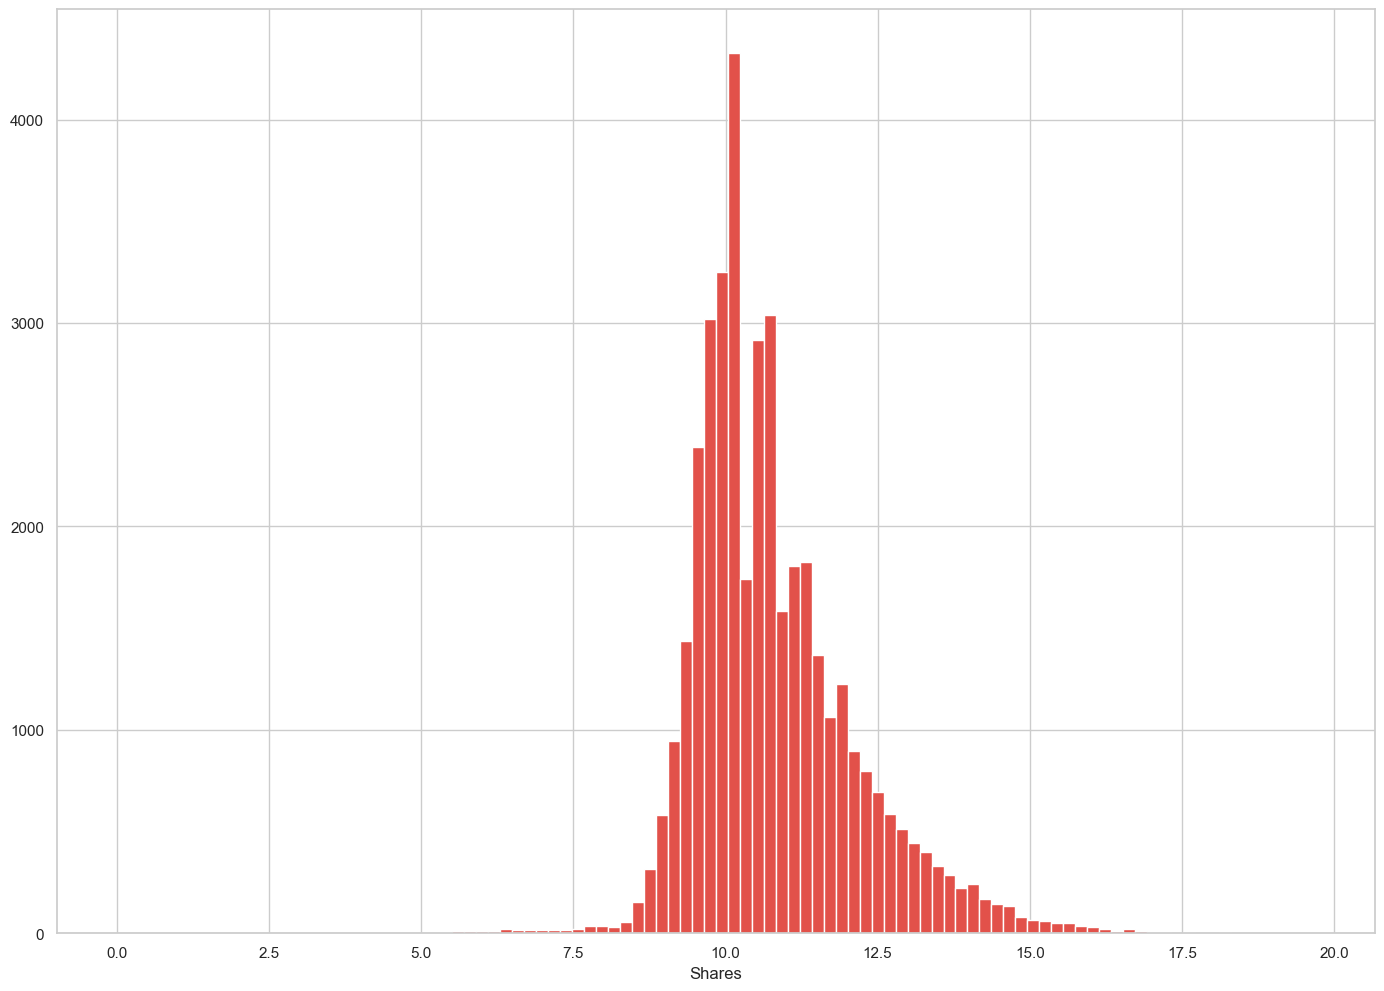

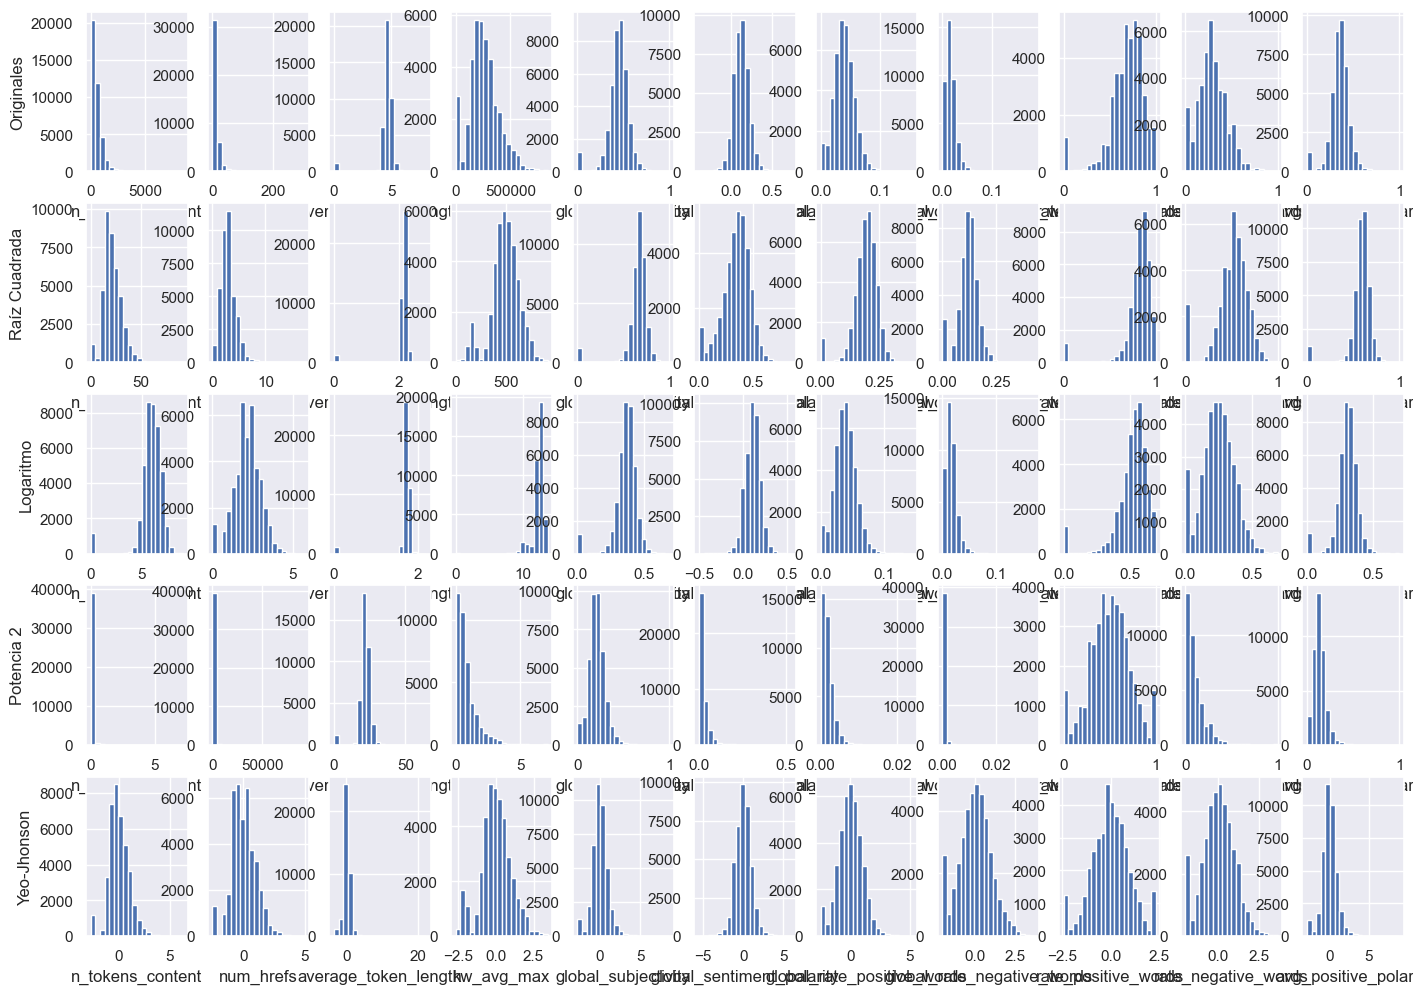

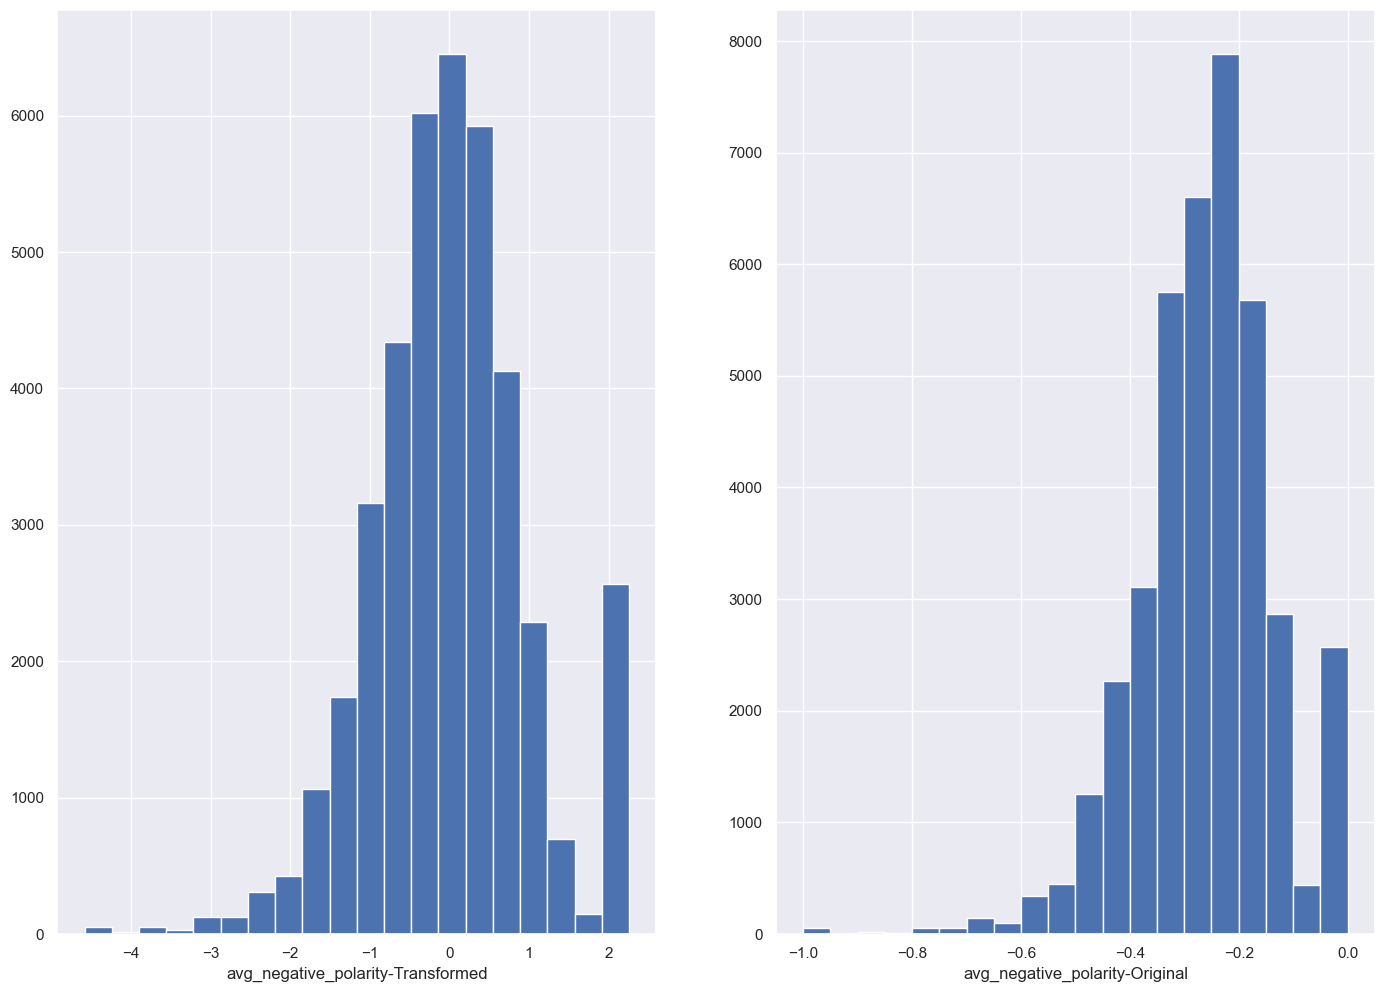

.                                                                                            [100%]
======================================== warnings summary =========================================
t_7c4356fa71084d429dad4eab33768fa0.py::test_accuracy_higher_than_benchmark
t_7c4356fa71084d429dad4eab33768fa0.py::test_accuracy_higher_than_benchmark
t_7c4356fa71084d429dad4eab33768fa0.py::test_accuracy_higher_than_benchmark
t_7c4356fa71084d429dad4eab33768fa0.py::test_accuracy_higher_than_benchmark
  C:\Users\balde\anaconda3\envs\tf_nowdays\Lib\site-packages\jupyter_client\session.py:201: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
    return datetime.utcnow().replace(tzinfo=utc)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
1 passed, 4 warnings in 105.84s (0:01:45)


In [54]:
%%ipytest

def test_accuracy_higher_than_benchmark(pipelines):
    pipeline_v1, model_reg = pipelines
    
    # Initial Benchmark
    benchmark_predictions = [0.0] * len(pipeline_v1.y_test)
    benchmark_accuracy = mean_squared_error(y_true=pipeline_v1.y_test, y_pred=benchmark_predictions)
    
    # Getting the accuracy of the model
    predictions = model_reg.predict(pipeline_v1.X_test)
    actual_accuracy = mean_squared_error(y_true=pipeline_v1.y_test, y_pred=predictions)
    
    print(f'RMS of model 1: {actual_accuracy}, RMS of Benchmark: {benchmark_accuracy}')
    
    # Comparing the RMS of the first model against the benchmark
    assert actual_accuracy > benchmark_accuracy

### Testing Mean after and before Feature Engineering

In [57]:
@pytest.fixture
def pipelines():
    filepath=r'C:/Users/balde/Desktop/MAESTRIA MNA/Contribs/MLOPSGrupo3/data/raw/online_news_popularity.csv'
    model = OnlineShares(filepath)
    model.load_data()
    X_train_scaled, X_test_scaled, y_train, y_test = model.preprocess_data()
    return model , X_train_scaled

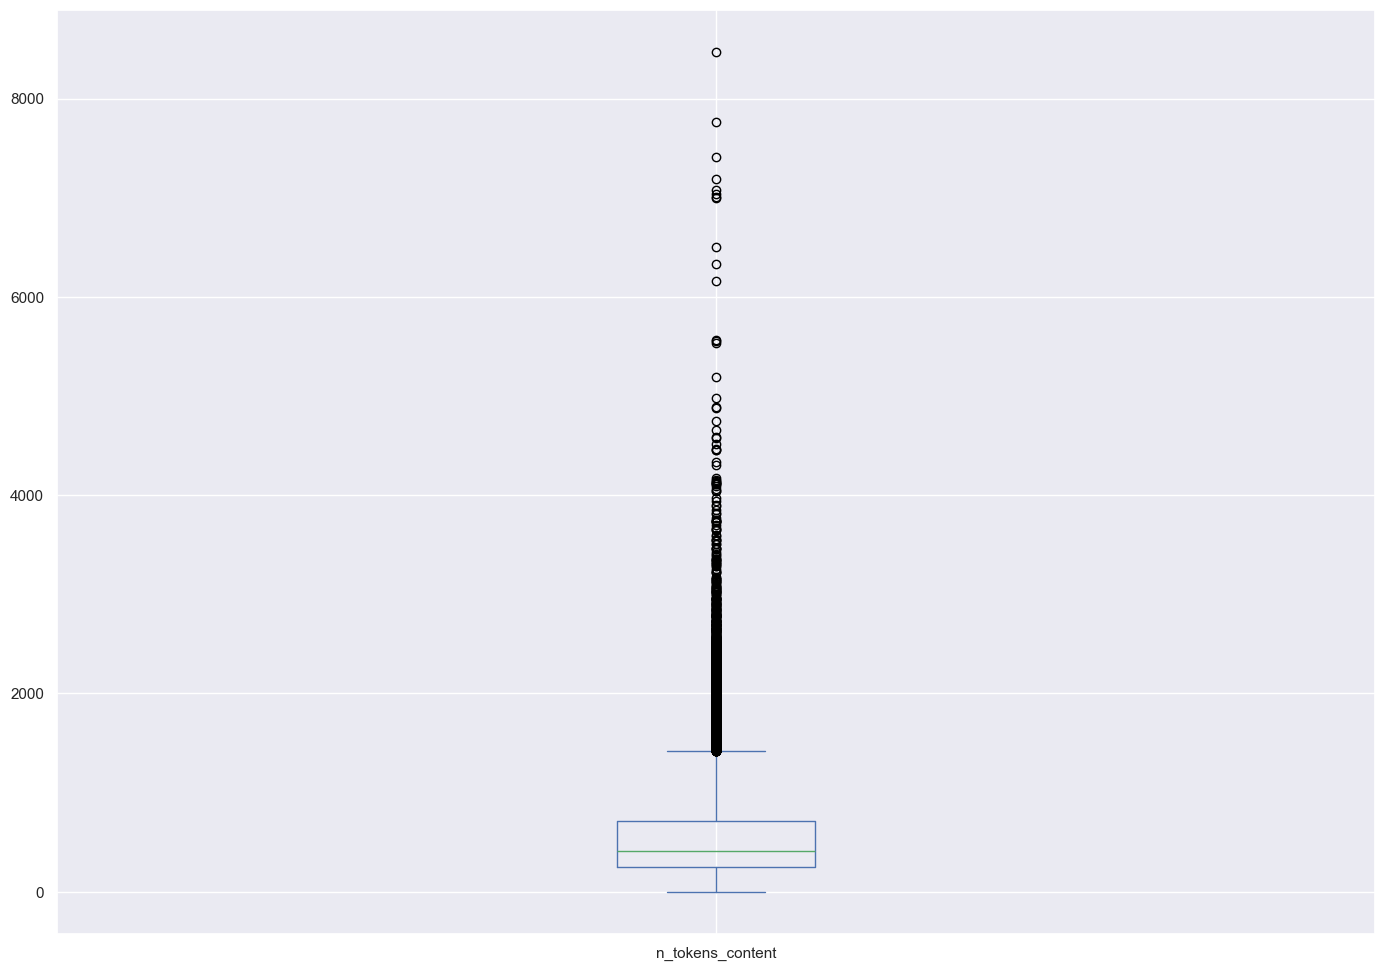

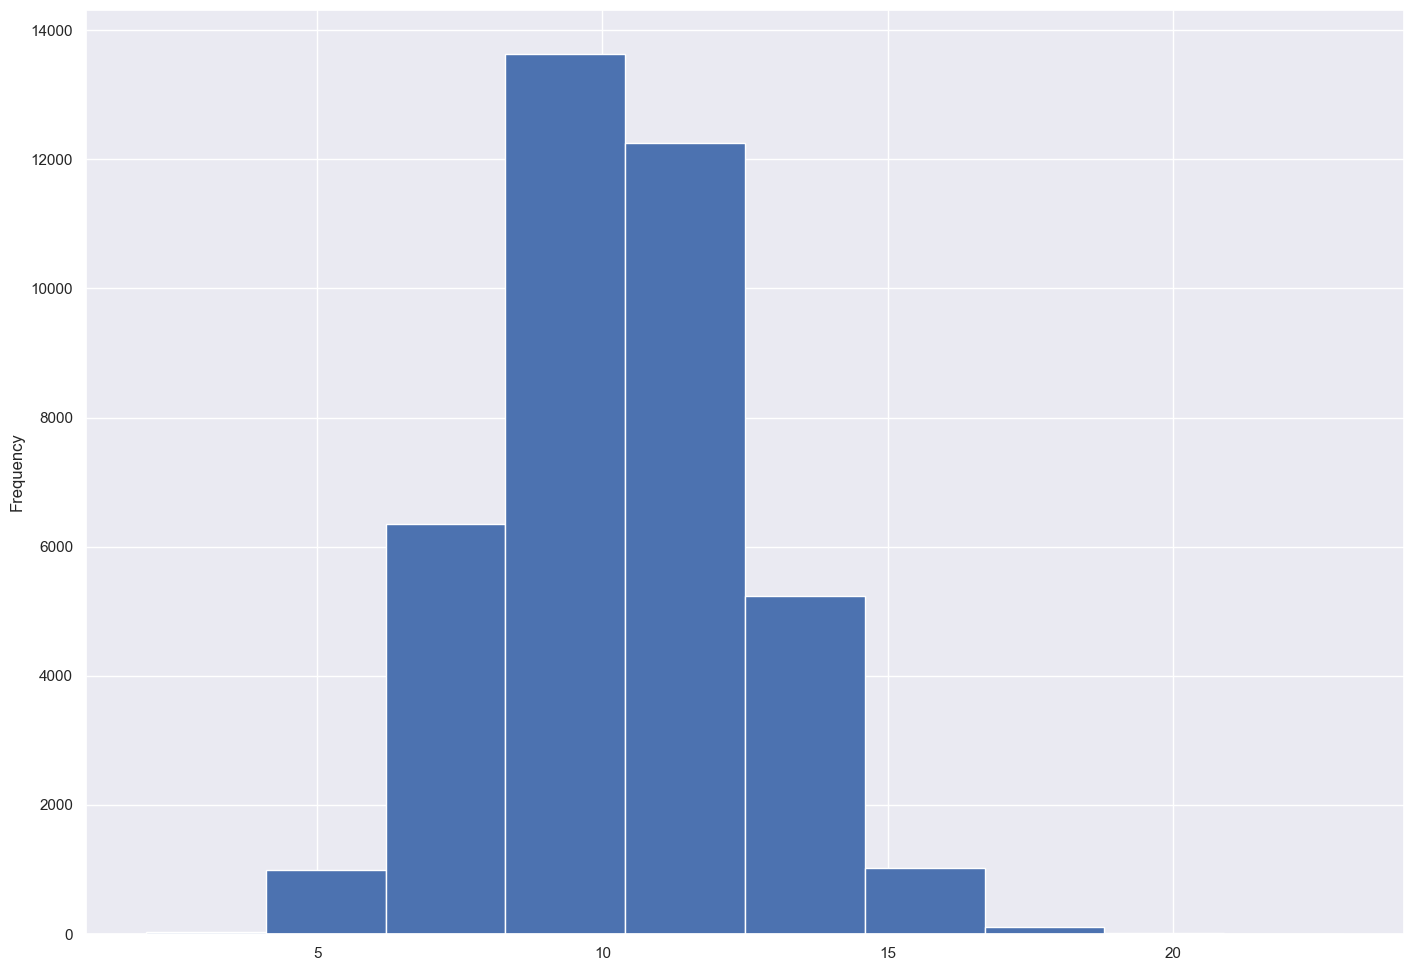

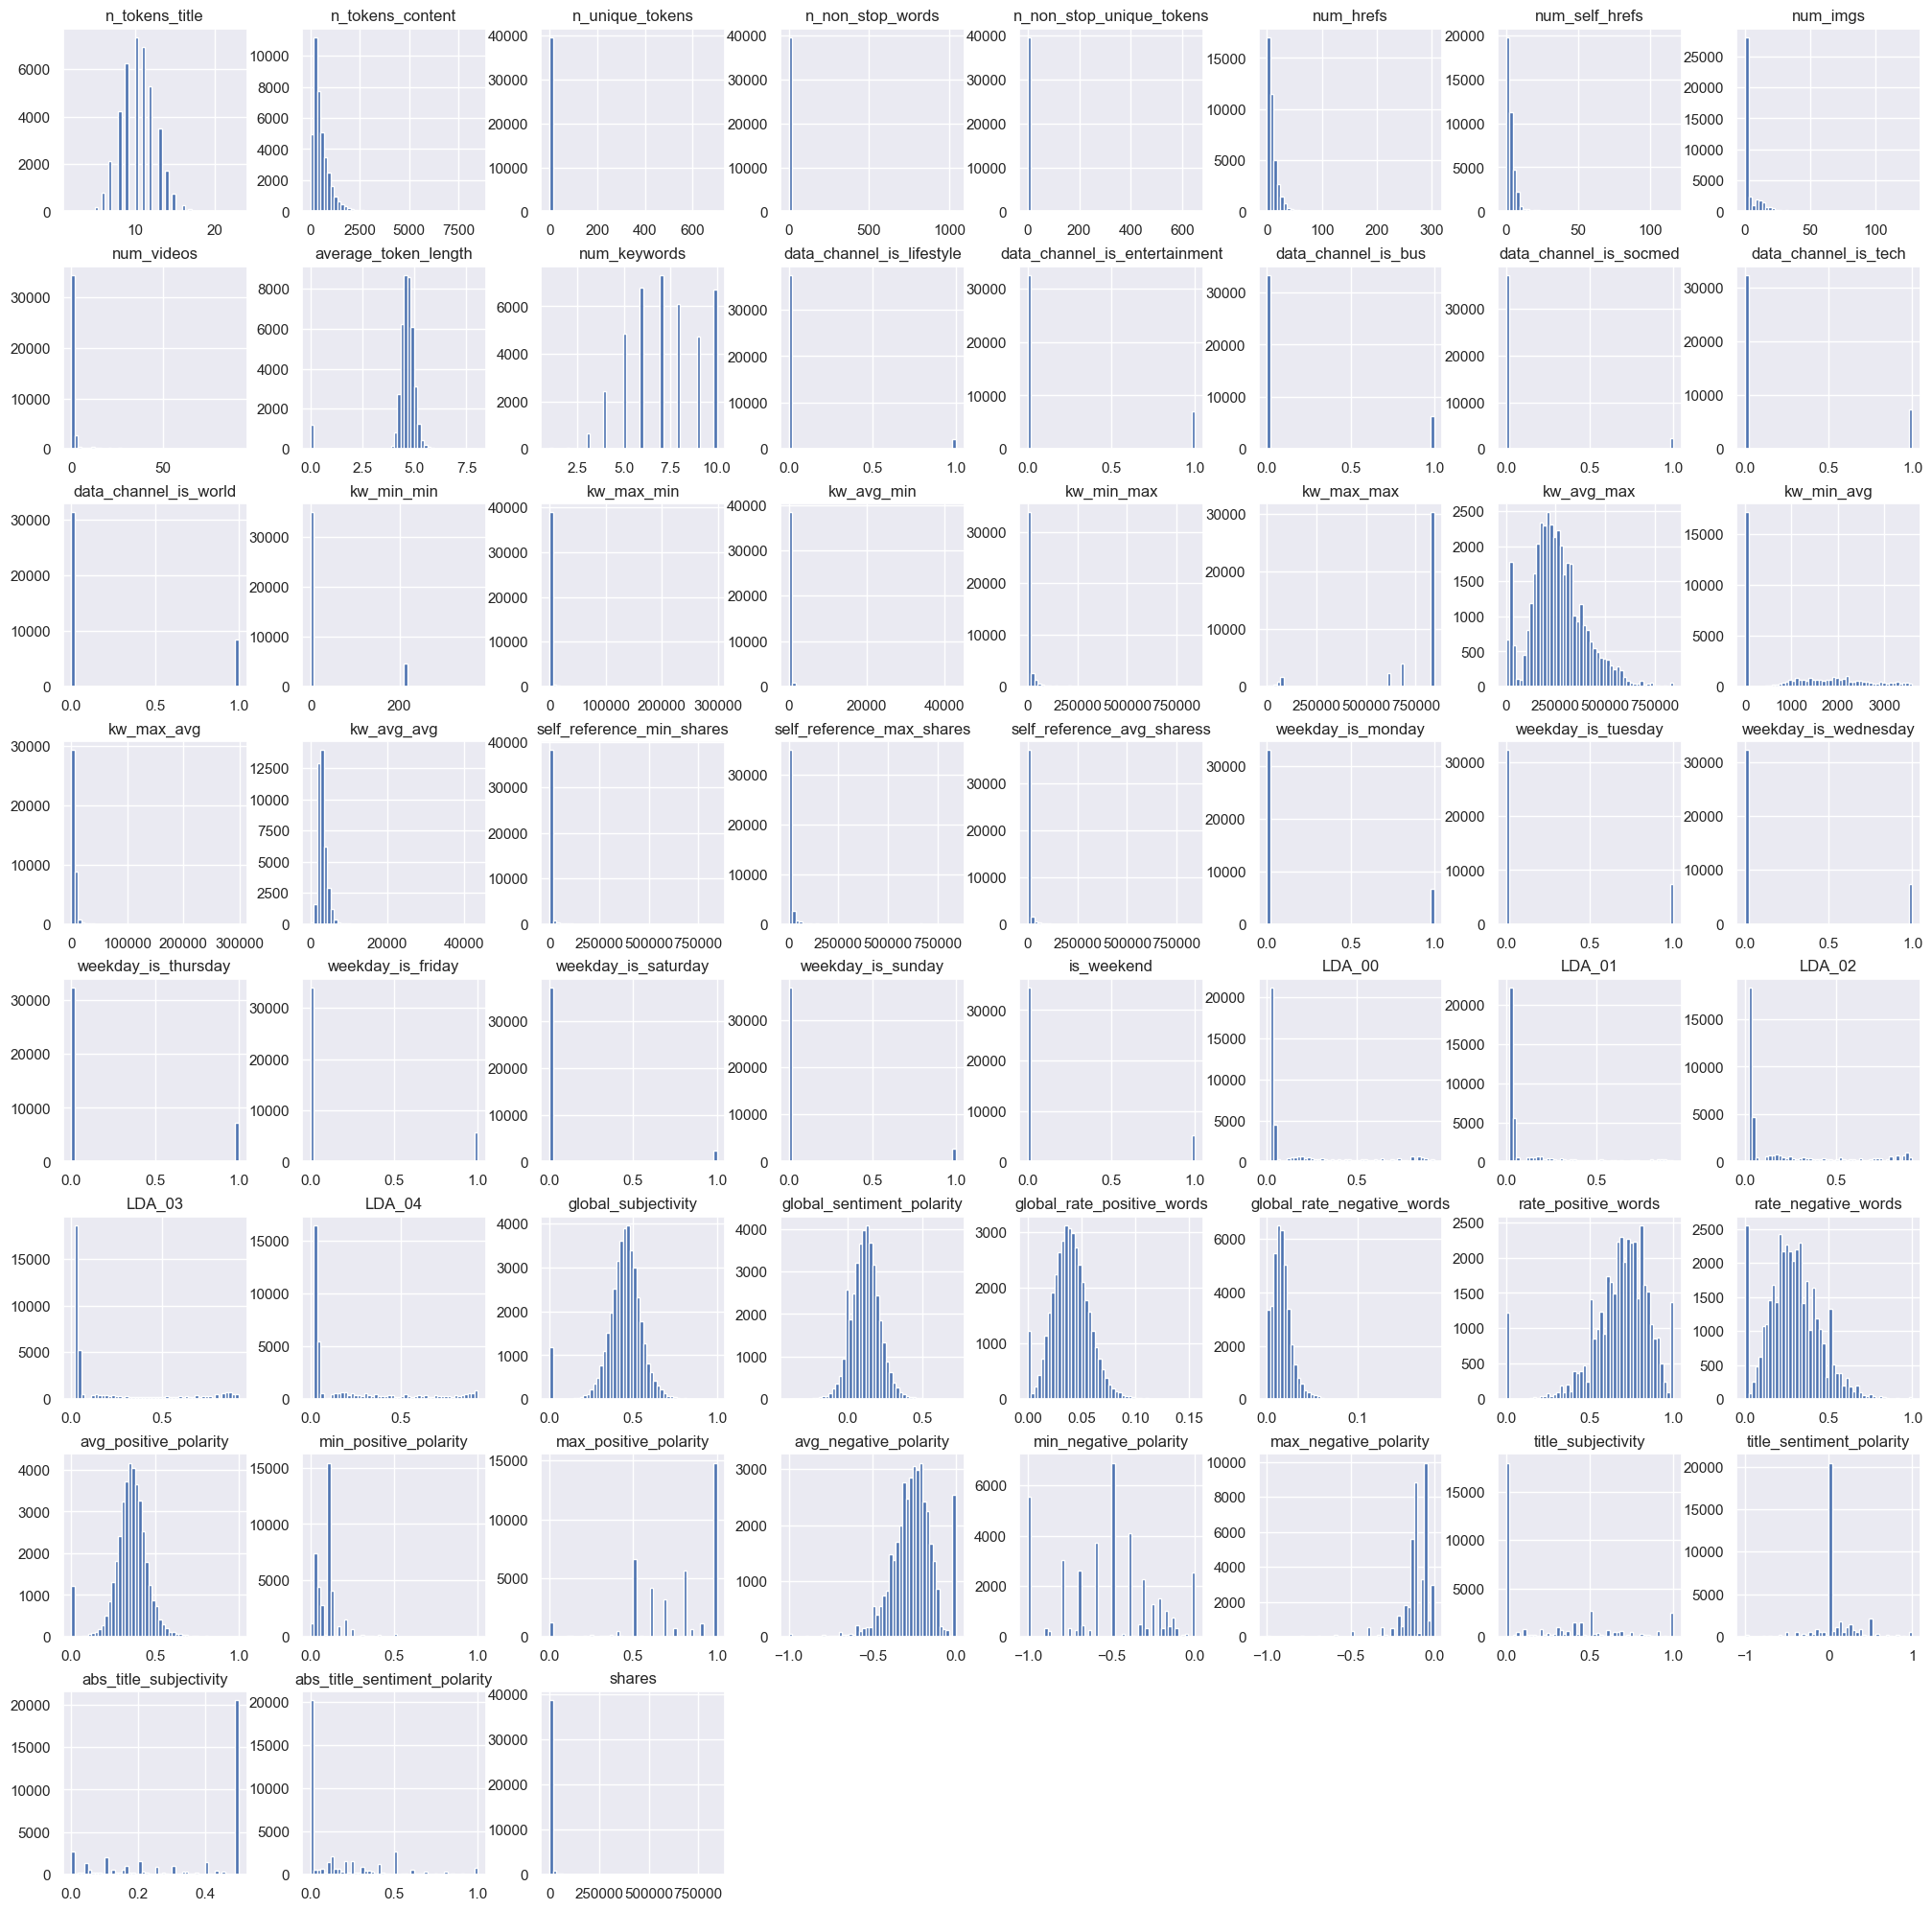

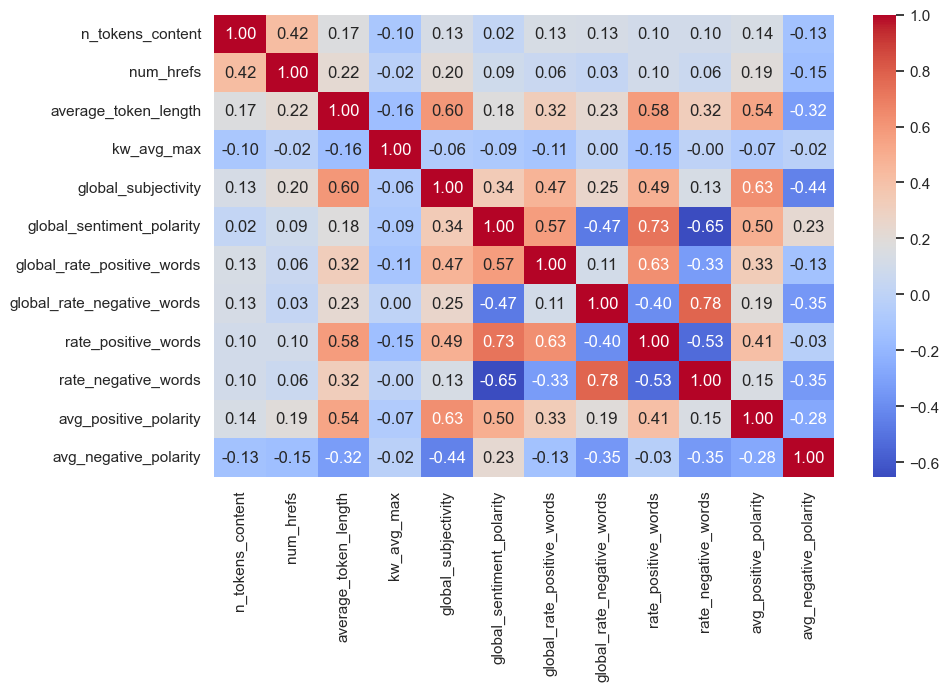

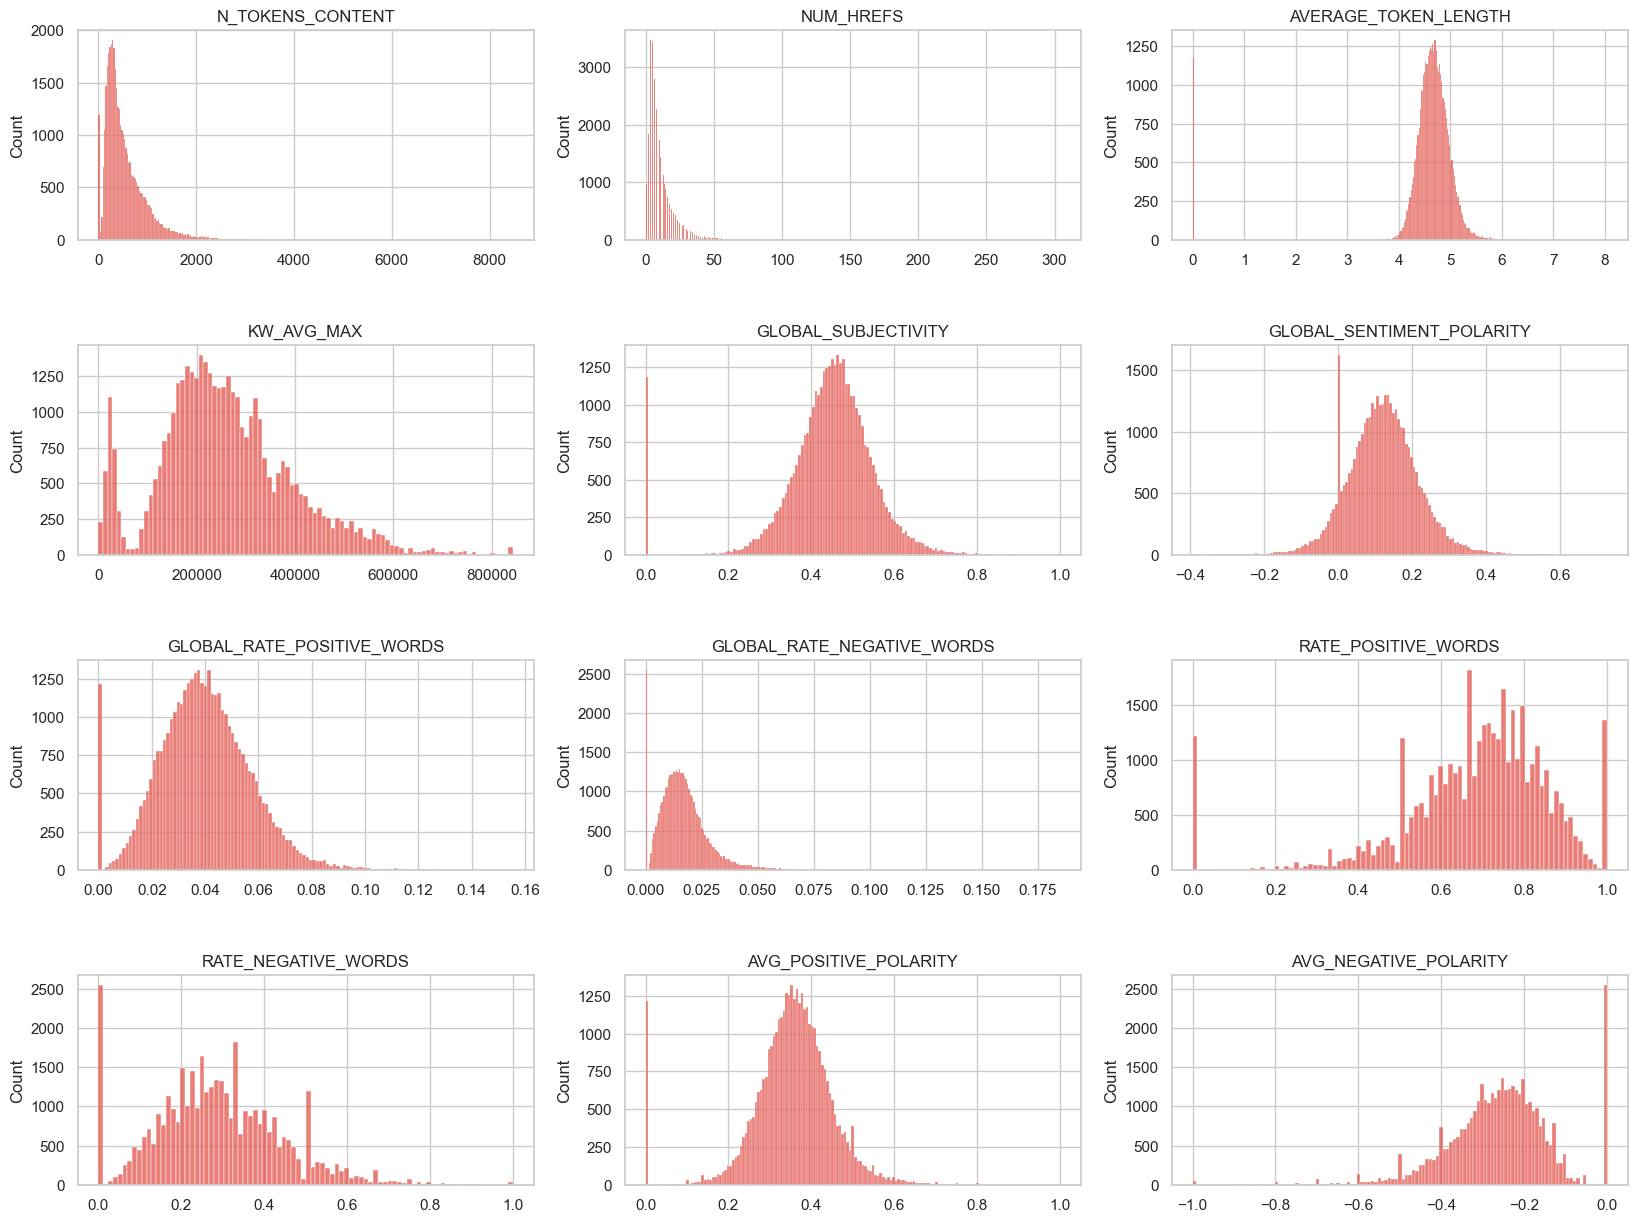

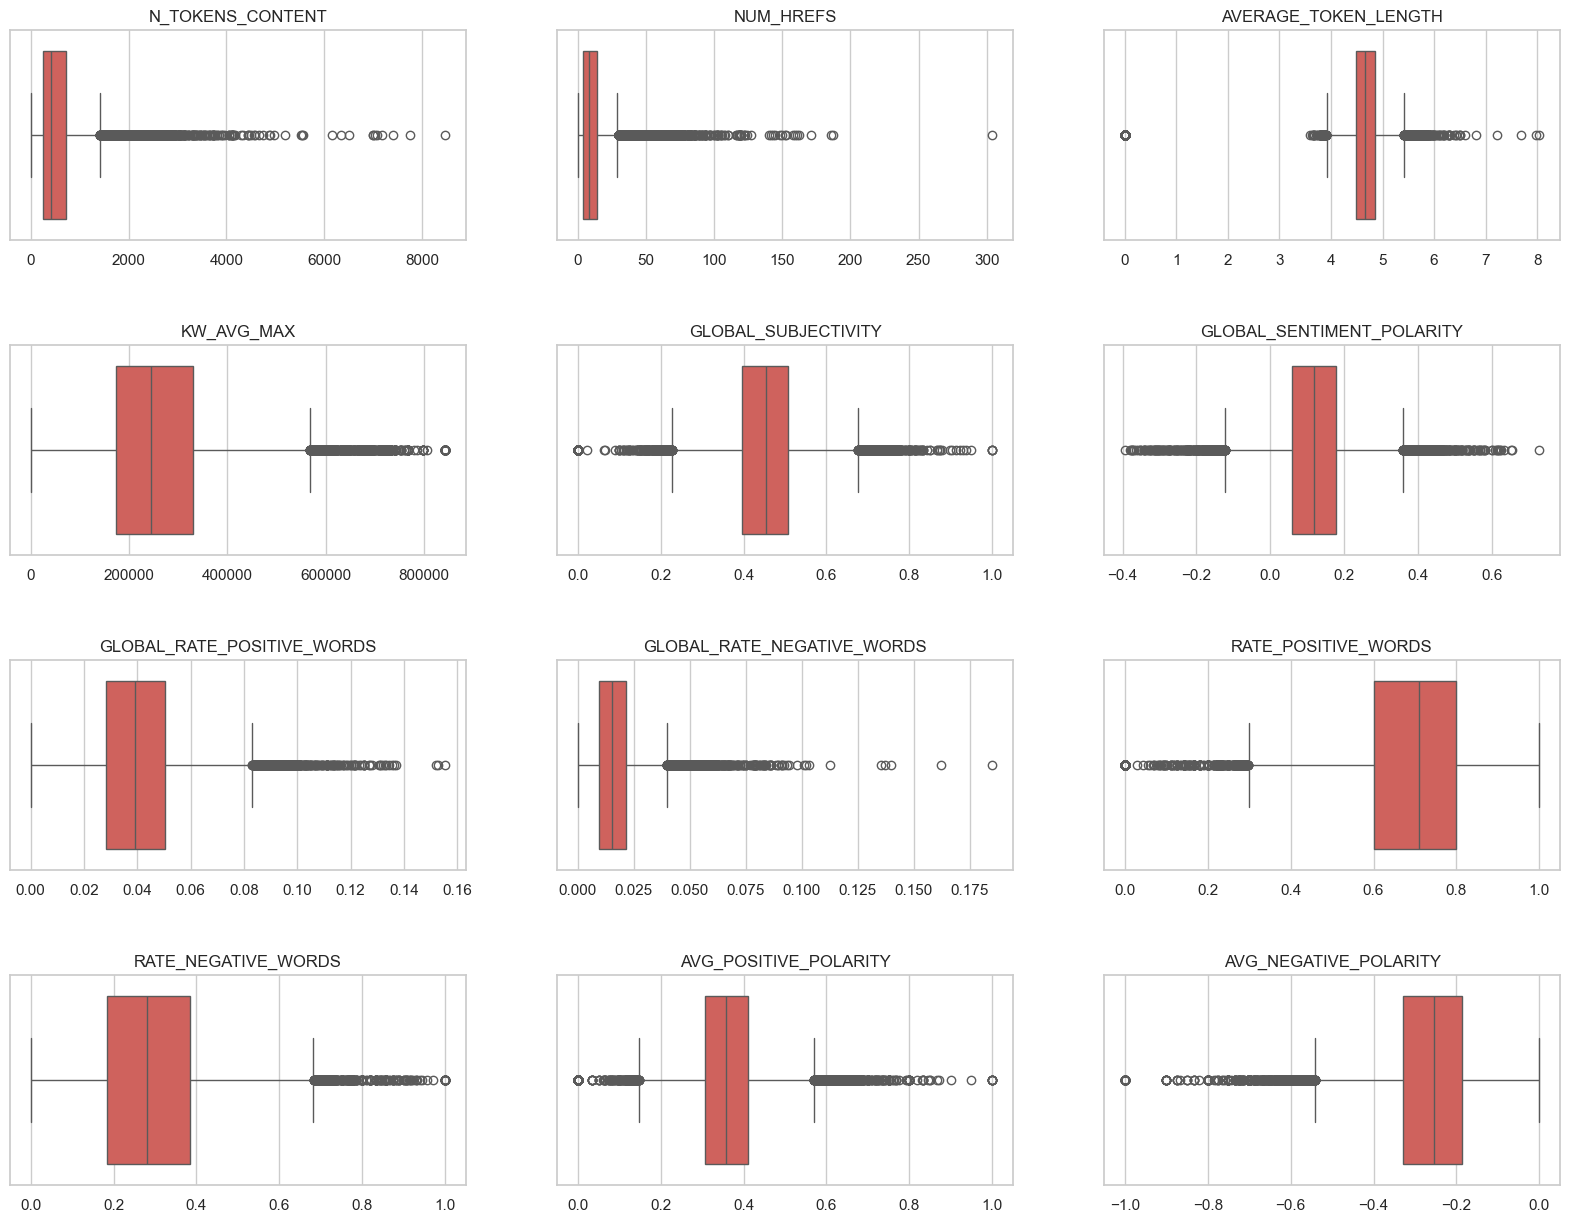

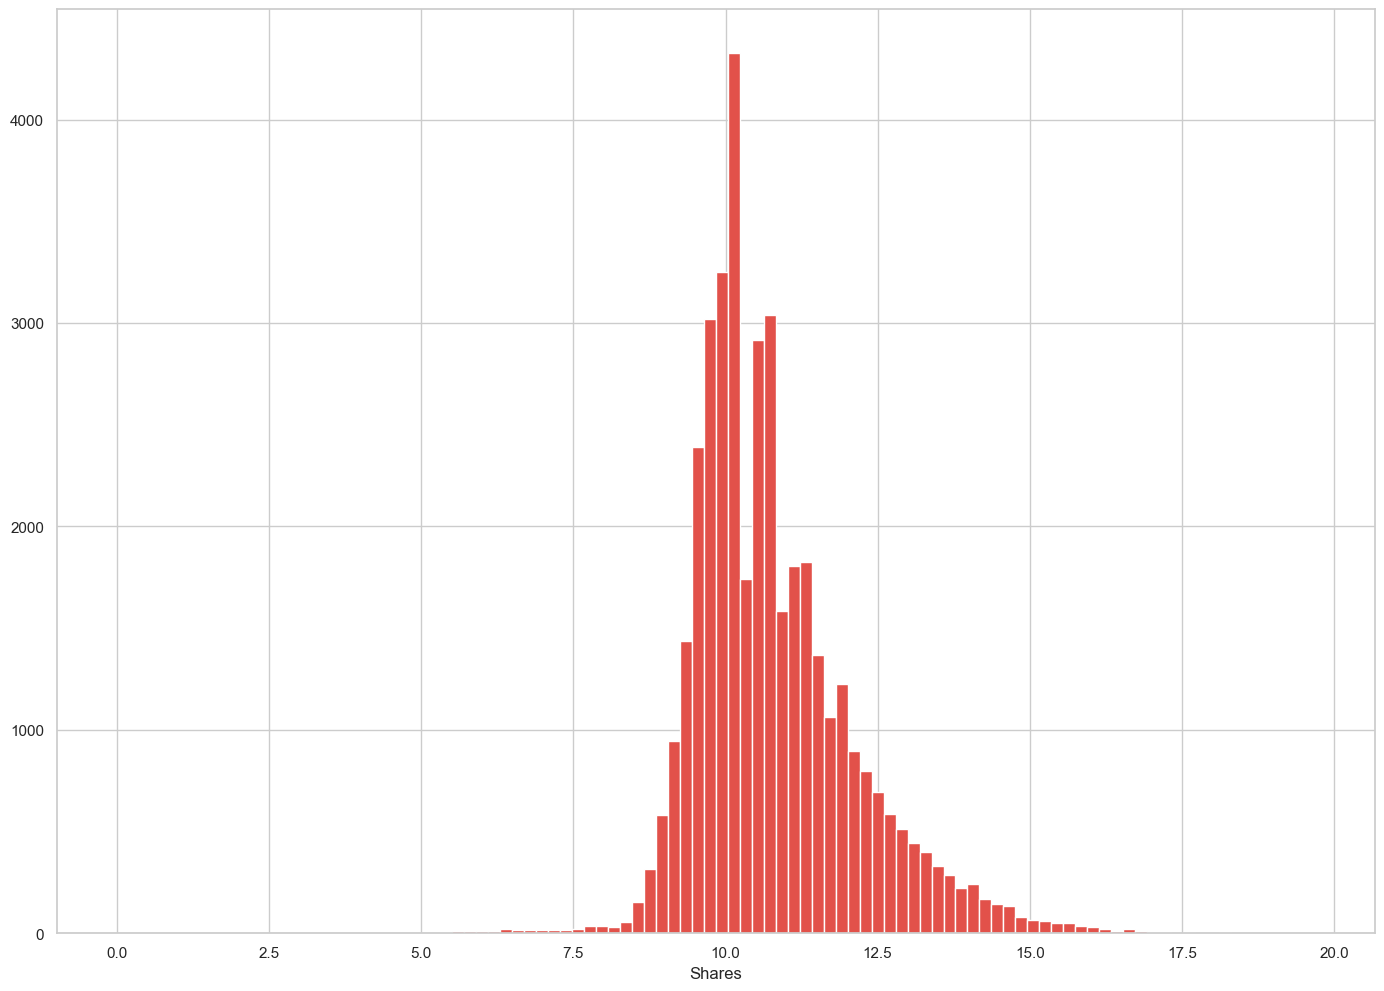

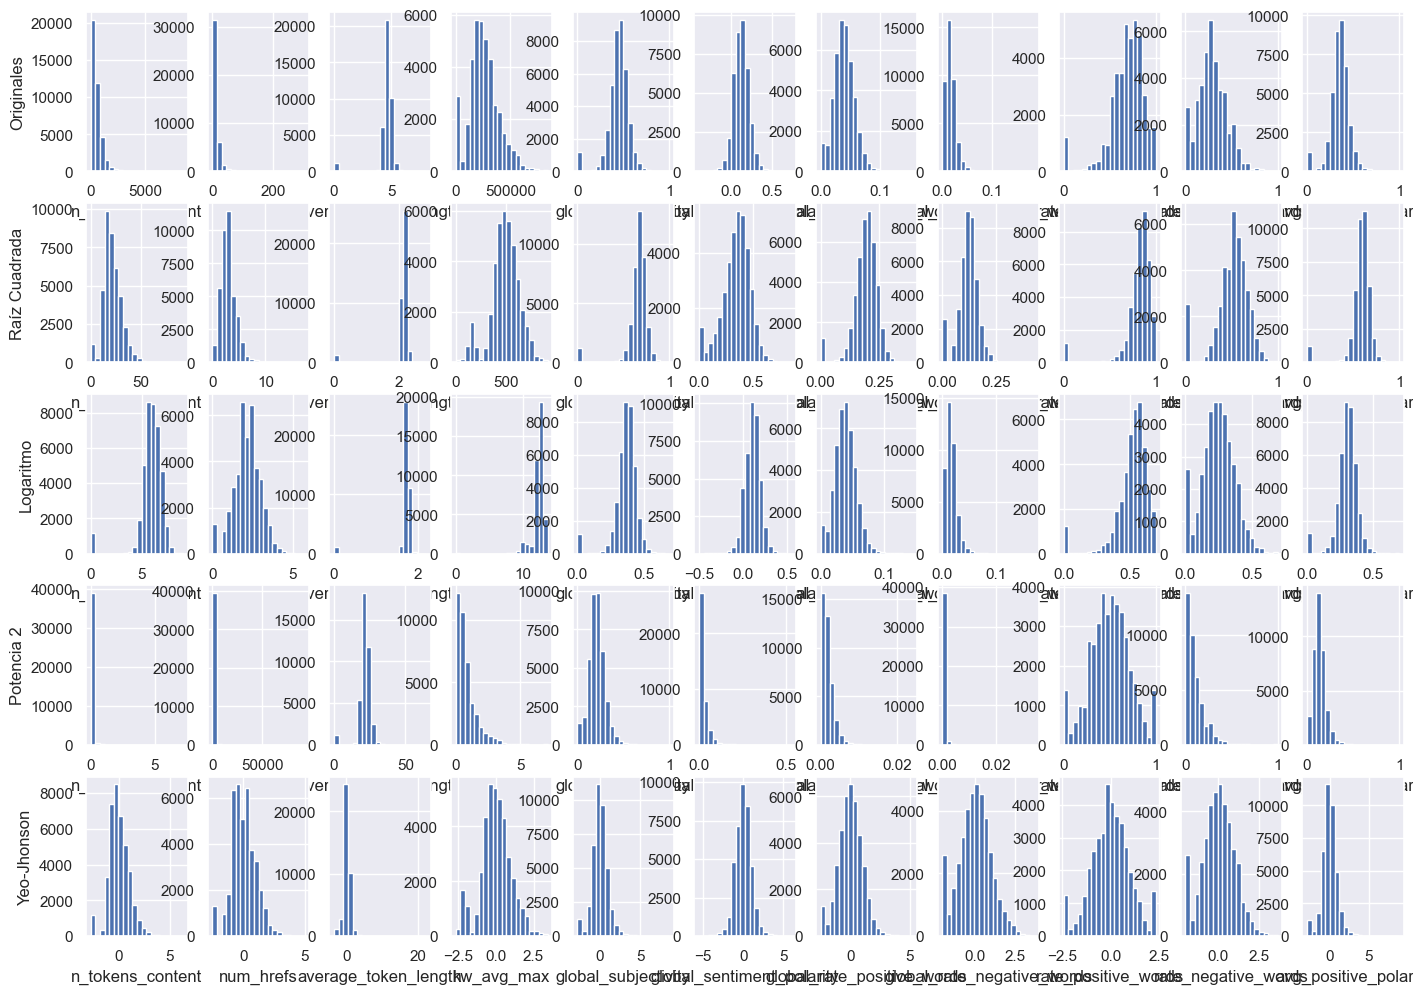

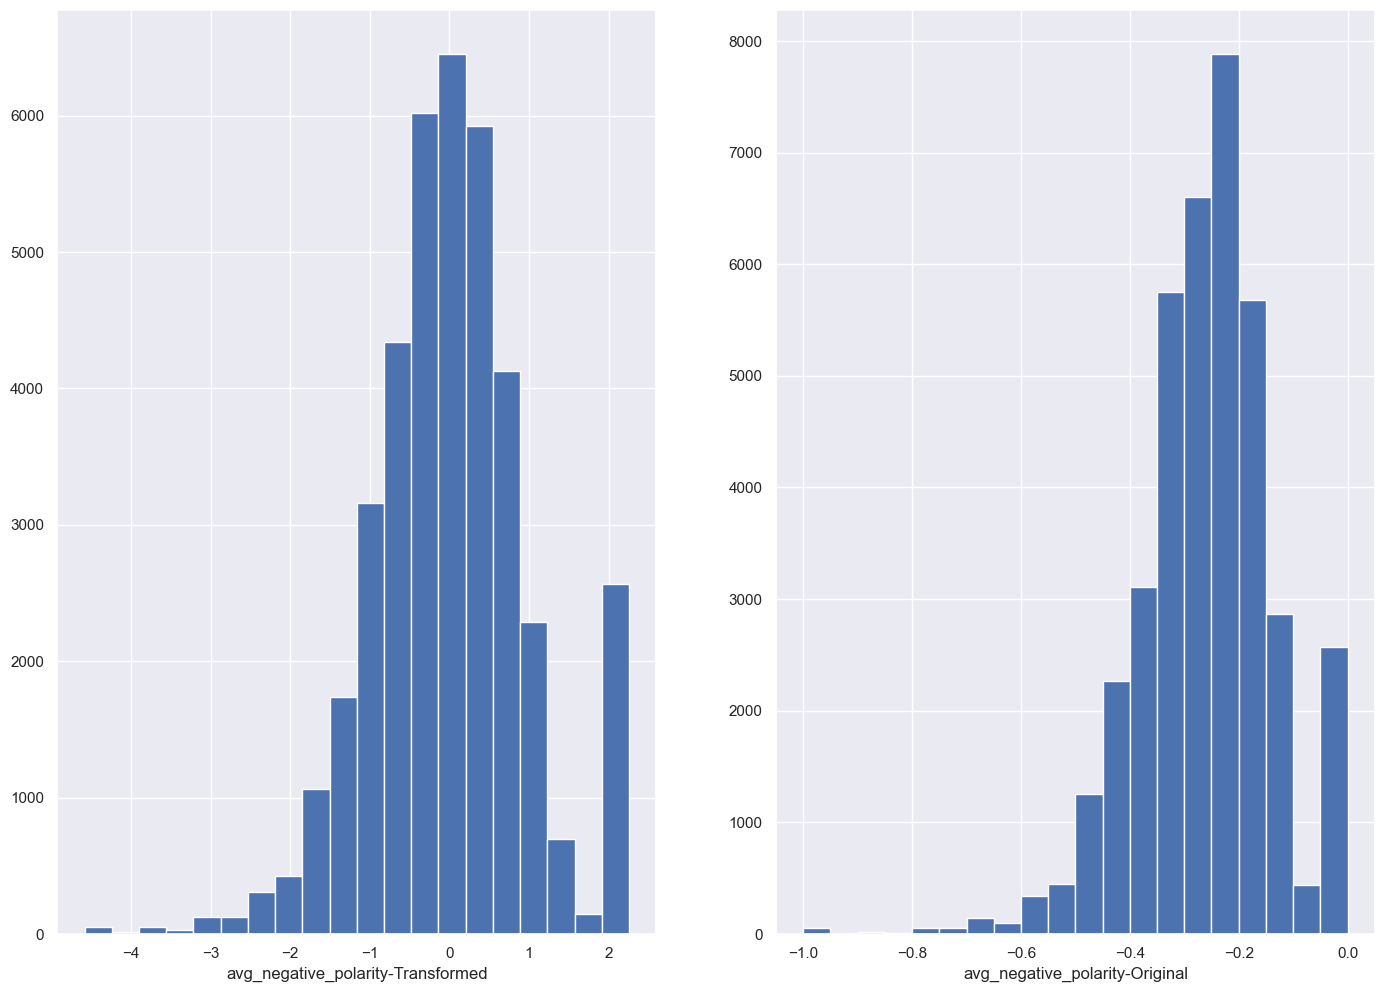

.                                                                                            [100%]
======================================== warnings summary =========================================
t_7c4356fa71084d429dad4eab33768fa0.py::test_scaler_preprocessing_brings_x_train_mean_near_zero
t_7c4356fa71084d429dad4eab33768fa0.py::test_scaler_preprocessing_brings_x_train_mean_near_zero
t_7c4356fa71084d429dad4eab33768fa0.py::test_scaler_preprocessing_brings_x_train_mean_near_zero
t_7c4356fa71084d429dad4eab33768fa0.py::test_scaler_preprocessing_brings_x_train_mean_near_zero
  C:\Users\balde\anaconda3\envs\tf_nowdays\Lib\site-packages\jupyter_client\session.py:201: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
    return datetime.utcnow().replace(tzinfo=utc)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
1 p

In [59]:
%%ipytest

def test_scaler_preprocessing_brings_x_train_mean_near_zero(pipelines):
    model, X_train_scaled = pipelines

    original_mean = model.X_train.stack().mean()
    
    
    assert original_mean > X_train_scaled.mean()
    assert np.isclose(X_train_scaled.mean(), 0.0, atol=1e-3)
